# Интенсив: обработка данных на примере авторынка Казахстана

**Описание будет дополнено**

## Цель работы:

Определить рыночные сегменты Меркур Авто и разработать маркетинговый план.

## Задачи:

- Предобработка данных;
- Исследовательский анализ данных;
- Анализ рынка автомобилей Казахстана;
- Анализ позиции Меркур Авто: внутренная и внешняя среда.

**Анализ рынка:**
- Емкость рынка автомобилей: в денежном и количественном выражении;
- *Марки лидеры на рынке автомобилей;*
- *Динамика рынка: общая, по сегментам;*
- RFM-анализ моделей авто (показатели Frequency и Monetary);
- Продажи автомобилей в разрезе бренд / сегмент;
- *Продажи по маркам;
- Продажи по регионам;
- Проверить гипотезу: стоимость автомобиля зависит от уровня развития региона (средней заработной платы по региону);
- *Продажи автоцентров;*
- *Модели-лидеры на рынке.*

**Анализ положения Меркур Авто:**
- Выручка: общая, по маркам, средняя, ежемесячная, ежемесячная по маркам;
- Продажи по регионам: общие, по маркам;
- Конкурентный анализ;
- BCG анализ (анализ продаж по моделям).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

import math as mth
import scipy.stats as stats
from IPython.display import display, HTML
import time
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score

In [2]:
start_time = time.time()

In [3]:
# зададим общий стиль визуализаций
plt.style.use('bmh')
# общий стиль форматирования чисел
pd.set_option('display.float_format', '{:.2f}'.format)
# сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', 50)
# сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
# сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', 1000)
# сброс ограничений на количество элементов в списке
pd.set_option('display.max_seq_items', 100)

warnings.filterwarnings('ignore')

# 1 Загрузка и предварительные выводы

In [4]:
df = pd.read_csv('C:/Users/Asus/Яндекс_практикум/Мастерская 3 Казавто/auto_kz_2019_датасет.csv', sep=';')
df_original = df.copy(deep=True)

In [5]:
# общая информация о датасете
print('Красавец датасет')
display(df.sample(5).T)
print('='*40)
print('\nОбщая информация о датасете, пропусках и типа данных')
display(df.info())
print('='*40)
print('\nКоличество полных дубликатов', df.duplicated().sum())

Красавец датасет


33544  \
Год                                                2019   
Месяц                                           Февраль   
Компания                        Toyota Motor Kazakhstan   
Бренд                                            Toyota   
Модель                                         LC Prado   
Модификация                                          54   
Год выпуска                                        2018   
Страна-производитель                             Япония   
Вид топлива                                      Бензин   
Объём двиг, л,                                      2,7   
Коробка передач                                      AT   
Тип привода                                         4WD   
Сегмент                            Среднеразмерные SUV    
Регион                                       Нур-Султан   
Наименование дилерского центра       Toyota City Астана   
Тип клиента                                   Физ. Лицо   
Форма расчета                                       NaN   
Количество                                         1.00   
Цена, USD                                   42316,46043   
Продажа, USD                                42316,46043   
Область                                    г.Нур-Султан   
Сегментация 2013                           Внедорожники   
Класс 2013                          Среднеразмерные SUV   
Сегментация Eng                                      K2   
Локализация производства                         Импорт   

                                                         5309   \
Год                                                       2019   
Месяц                                                   Апрель   
Компания                                         Astana Motors   
Бренд                                                  Hyundai   
Модель                                                   Creta   
Модификация                     Travel & Light & Advanced Pack   
Год выпуска                                               2019   
Страна-производитель                      Республика Казахстан   
Вид топлива                                             Бензин   
Объём двиг, л,                                             1,6   
Коробка передач                                            6AT   
Тип привода                                                2WD   
Сегмент                                                  B-SUV   
Регион                                                  Алматы   
Наименование дилерского центра             Hyundai Auto Almaty   
Тип клиента                                          Физ. Лицо   
Форма расчета                                              NaN   
Количество                                                1.00   
Цена, USD                                          19997,52336   
Продажа, USD                                       19997,52336   
Область                                               г.Алматы   
Сегментация 2013                                  Внедорожники   
Класс 2013                                   Субкомпактные SUV   
Сегментация Eng                                             K1   
Локализация производства                Локальное производство   

                                                  36813  \
Год                                                2019   
Месяц                                          Сентябрь   
Компания                        Toyota Motor Kazakhstan   
Бренд                                            Toyota   
Модель                                             RAV4   
Модификация                                          Z4   
Год выпуска                                        2019   
Страна-производитель               Российская Федерация   
Вид топлива                                      Бензин   
Объём двиг, л,                                      2.0   
Коробка передач                          CVT (вариатор)   
Тип привода                                         AWD   
Сегмент                        


Общая информация о датасете, пропусках и типа данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Год                             39966 non-null  int64  
 1   Месяц                           39966 non-null  object 
 2   Компания                        39966 non-null  object 
 3   Бренд                           39966 non-null  object 
 4   Модель                          39966 non-null  object 
 5   Модификация                     36375 non-null  object 
 6   Год выпуска                     39465 non-null  object 
 7   Страна-производитель            39966 non-null  object 
 8   Вид топлива                     36826 non-null  object 
 9   Объём двиг, л,                  35708 non-null  object 
 10  Коробка передач                 36711 non-null  object 
 11  Тип привода                     35677 n

None


Количество полных дубликатов 18698


Подозрительное значение кол-ва полных дубликатов, но это объясняется тем, что данные были деперсонализированы и отсутствуют уникальные ижентификаторы сделок. 

Рассмотрим отдельно пропуски и уникальные значения. Рассчитаем долю пропусков, кол-во уникальных значений и т.п.

In [6]:
# создадим пустые списки
columns = [] # наименования атрибутов
type_list = [] # типы данных
null_ratio = [] # доля пропусков
unique_cnt = [] # количество уникальных значений
unique_names = [] # уникальные значения

# циклом добавим значения в пустые списки
for i in df.columns:
    columns.append(i) 
    type_list.append(df[i].dtypes)
    null_ratio.append(f'{(100 * df[i].isnull().sum()/len(df[i])):.2f}' + '%')
    unique_cnt.append(df[i].nunique())
    unique_names.append(df[i].unique())
    
# или в виде List Comprehensions, меньше строк
# columns = [col for col in df.columns]
# type_list = [df[col].dtypes for col in df.columns]
# null_ratio = [f'{(100 * df[col].isnull().sum() / len(df[col])):.2f}%' for col in df.columns]
# unique_cnt = [df[col].nunique() for col in df.columns]
# unique_names = [df[col].unique() for col in df.columns]
    
# сохраним в датафрейм
unique_df = pd.DataFrame({'column_name' : columns,
                          'column_type' : type_list,
                          'null_ratio' : null_ratio,
                          'unique_cnt' : unique_cnt,
                          'unique_names' : unique_names})

# найти код для полного отображения ячеек только для конкретного датафрейма  
unique_df

column_name column_type null_ratio  unique_cnt  \
0                              Год       int64      0.00%           1   
1                            Месяц      object      0.00%           9   
2                         Компания      object      0.00%          40   
3                            Бренд      object      0.00%          46   
4                           Модель      object      0.00%         273   
5                      Модификация      object      8.99%        1383   
6                      Год выпуска      object      1.25%           9   
7             Страна-производитель      object      0.00%          19   
8                      Вид топлива      object      7.86%          10   
9                   Объём двиг, л,      object     10.65%         114   
10                 Коробка передач      object      8.14%          83   
11                     Тип привода      object     10.73%          26   
12                         Сегмент      object     16.92%         119   
13                          Регион      object      0.00%          26   
14  Наименование дилерского центра      object      0.00%         205   
15                     Тип клиента      object     17.63%           9   
16                   Форма расчета      object     64.88%          21   
17                      Количество     float64      0.02%          56   
18                       Цена, USD      object      0.00%        3510   
19                    Продажа, USD      object      0.00%        4183   
20                         Область      object      0.00%          18   
21                Сегментация 2013      object      0.00%           5   
22                      Класс 2013      object      0.00%          21   
23                 Сегментация Eng      object      0.00%          16   
24        Локализация производства      object      0.00%           2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               unique_names  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    [2019]  
1                                                                                                               

Как видно из таблицы с уникальными значениями атрибутов требуется замена значений, преобразование типов и замена пропусков. Рассмотрим отдельно:

- 'Год' не требует предобработки
- 'Месяц' не требует предобработки, но возможна замена на datatime 01.01.2019 и т.д.
- **'Компания' требует предобработки и замены неявных дубликатов, которые написаны или разными языками или с ошибками в отдельных символах, например две разных Astana Motors, Astana Motors, или  Равон Моторс Казахстан, Ravon Motors Kazakstan, или  Хино Моторс Казахстан, Hino Motors**
- 'Бренд' не требует обработки, но отдельно рассмотрим
- 'Модель' не требует обработки, но отдельно рассмотрим
- *'Модификация' кандидат на удаление*
- **'Год выпуска' необходима замена значений, удаление лишних символов и пропусков**
- **'Страна-производитель' можно заменить UK на Великобританию или заменить наименования всех стран на код ОКСМ**
- **'Вид топлива' необхоима замена значений, регистров, замена пропусков** 
- **'Объём двиг, л,' необходимо удаление лишних символов, замена размерностей, приведение к одному типу, замена пропусков**
- **'Коробка передач'необходима замена значений на 2 типа** 
- **'Тип привода' необходима замена значений на 4 типа**
- *'Сегмент' 199 уникальных значений, 16% пропусков, можно удалить*
- 'Регион' не требует обработки
- 'Наименование дилерского центра' не требует обработки, но отдельно рассмотрим
- **'Тип клиента' требуется замна на 2 типа, например, ЮЛ, ФЛ. Корп. клиент - ЮЛ**
- *'Форма расчета' предполагается удаление атрибута, но попробуем МЛ*
- **'Количество' единственный атрибут совпадающий по типу. Требуется замена пропусков и значения -1**
- **'Цена, USD' возможно в атрибуте есть str, необходимо приведение к типу float, замена запятой на точку**
- **'Продажа, USD'аналогично**
- 'Область' обработка не требуется
- 'Сегментация 2013' обработка не требуется
- 'Класс 2013' обработка не требуется 
- *'Сегментация Eng' обработка не требуется, предполагается удаление атрибута*
- 'Локализация производства' обработка не требуется

# 2 Предобработка

## 2.1 Общая предобработка

Предварительно переименуем столбцы датафрейма, удалим лишние пробелы в значениях

In [7]:
# переименуем столбцы

df = df.rename(columns={'Год' : 'report_year', 
                        'Месяц' : 'report_month', 
                        'Компания': 'dealer', 
                        'Бренд' : 'brand', 
                        'Модель' : 'model', 
                        'Модификация' : 'mod',
                        'Год выпуска' : 'year', 
                        'Страна-производитель' : 'country', 
                        'Вид топлива' : 'fuel', 
                        'Объём двиг, л,' : 'drive_volume',
                        'Коробка передач' : 'transmission', 
                        'Тип привода' : 'drive', 
                        'Сегмент' : 'segment', 
                        'Регион' : 'sub_region',
                        'Наименование дилерского центра' : 'dealer_centre', 
                        'Тип клиента' : 'client_type', 
                        'Форма расчета' : 'account_type',
                        'Количество' : 'quant', 
                        'Цена, USD' : 'price', 
                        'Продажа, USD' : 'selling_price', 
                        'Область' : 'region',
                        'Сегментация 2013' : 'segment_2013', 
                        'Класс 2013' : 'class_2013', 
                        'Сегментация Eng' : 'segment_eng',
                        'Локализация производства' : 'localisation'})

In [8]:
# переименуем столбцы

df_original = df_original.rename(columns={'Год' : 'report_year', 
                        'Месяц' : 'report_month', 
                        'Компания': 'dealer', 
                        'Бренд' : 'brand', 
                        'Модель' : 'model', 
                        'Модификация' : 'mod',
                        'Год выпуска' : 'year', 
                        'Страна-производитель' : 'country', 
                        'Вид топлива' : 'fuel', 
                        'Объём двиг, л,' : 'drive_volume',
                        'Коробка передач' : 'transmission', 
                        'Тип привода' : 'drive', 
                        'Сегмент' : 'segment', 
                        'Регион' : 'sub_region',
                        'Наименование дилерского центра' : 'dealer_centre', 
                        'Тип клиента' : 'client_type', 
                        'Форма расчета' : 'account_type',
                        'Количество' : 'quant', 
                        'Цена, USD' : 'price', 
                        'Продажа, USD' : 'selling_price', 
                        'Область' : 'region',
                        'Сегментация 2013' : 'segment_2013', 
                        'Класс 2013' : 'class_2013', 
                        'Сегментация Eng' : 'segment_eng',
                        'Локализация производства' : 'localisation'})

In [9]:
# удалим лишние пробелы и двойные пробелы (если есть)
for i in df.columns:
    df[i] = df[i].astype(str).str.strip()
    df[i] = df[i].str.replace('  ', '')

In [10]:
# заменим запятые на точки
df = df.replace(',', '.', regex=True)
# преобразуем заведомо числовые значения в числа
quant_list = ['quant', 'price', 'selling_price']
for column in quant_list:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# предыдущие замены превратили все сущестующие Nan (Not-a-number) в строки 'nan'
# для дальнейшего верного подсчета вернем Nan
df = df.replace('nan', np.nan)

## 2.2 Обработка значений

В рамках обработки значений будут применяться следующие подходы:
1) Поиск недостающих сведений в интеренете
2) Замена неверных/некорректных значений по словарю
3) Замена пропусков в соответствии с референсами-аналогами, которые есть в датасете. Например, у в строке о продаже автомобиля бренда А, модели Б, модификации С отсутствует значение типа привода. Данные пропуск будет заменен на самое популярное (мода) или единственное  значение типа привода, характерное для данного бренда/модели/модификации. Если референсное значение отсутсвует, замена производится на значение, характерное для бренда/модели. В случае количественных данных замена производится по аналогичному алгоритму на среднее (далее будет показано, что среднее значение количественных значений практически совпадает с медианным)
4) В случае отсутсвия референсных значений, замена пропусков будет проводится в соовтетствии со значениями, характерными для класса/сегмента/бренда автомобиля

### 2.2.1 Месяц

Добавим дополнительный столбец с численными значениями месяца в году

In [11]:
# создадим словарь
month_to_date = {
    'Январь': '01.01.2019',
    'Февраль': '01.02.2019',
    'Март': '01.03.2019',
    'Апрель': '01.04.2019',
    'Май': '01.05.2019',
    'Июнь': '01.06.2019',
    'Июль': '01.07.2019',
    'Август': '01.08.2019',
    'Сентябрь': '01.09.2019',
    'Октябрь': '01.10.2019',
    'Ноябрь': '01.11.2019',
    'Декабрь': '01.12.2019'
}
# создадим новый столбец
df['year_month'] = df['report_month'].map(month_to_date)
# преобразуем в datetime
df['year_month'] = pd.to_datetime(df['year_month'], format="%d.%m.%Y").dt.date

### 2.2.2 Наименования компаний

В атрибуте есть разные наименования возможно одних и тех же компаний-дилеров. Довольно распространенная проблема создания похожих по названию мелких компаний на крупные бренды. Или же это обособленные филиалы/подразделения созданные как отдельные юридические лица.
Похожие названия:
- 'Autokapital', 'Автокапитал'
- 'Caspian Motors', 'Каспиан Моторс'
- 'Равон Моторс Казахстан', 'Ravon Motors Kazakstan'
- 'ММС Рус', 'MMC RUS'
- 'Mercur Auto', 'Mercur Autos'. В соответствии с выдачей гугла в Казахстане есть 2 разные компании, при этом Mercur Auto в настоящий момент - Автомир и возможно принадлежит Orbis Group. Т.к. дополнительными точными знаниями мы не обладаем, то будем считать, что компания одна - Mercur Auto. Тем более у Mercur Autos всего 4 модели в датасете
- 'Хино Моторс Казахстан', 'Hino Motors' полное наименование HINO Motors Kazakhstan
- 'Eurasia Motor Premium', 'ТОО "Eurasia Motor Zhaik". В Казахстане есть достаточно крупная компания Eurasia Motor, в структуру которой не входят Premium и Zhaik. В соответствии с записями в госреестре - это 2 разных юрлица с похожими названиями. 

Заменим соответствующие значения. Посмотрим также на встречаемость наименований дилеров

In [12]:
df.groupby('dealer')['model'].count().reset_index().sort_values(by='model', ascending=False).head(10)

dealer  model
20   Toyota Motor Kazakhstan  11951
2              Astana Motors  10169
27                БИПЭК АВТО   3624
28                     Вираж   2909
0                 Allur Auto   2526
15            Renault Россия   1796
13  Nissan Manufacturing RUS   1149
32    Равон Моторс Казахстан    947
35                  ТК КАМАЗ    893
11               Mercur Auto    639

Скорее всего Mercur Auto и Mercur Autos это одна компания, т.к. в датасете всего 4 записи о Mercur Autos

In [13]:
df.query('dealer == "Mercur Auto" or dealer == "Mercur Autos"').groupby('dealer')['model'].count()

dealer
Mercur Auto     639
Mercur Autos      4
Name: model, dtype: int64

In [14]:
# зададим словарь для замены
dealer_dict = {'Автокапитал':'Autokapital',
                'Каспиан Моторс' : 'Caspian Motors',
                'Равон Моторс Казахстан' : 'Ravon Motors Kazakstan',
                'ММС Рус' : 'MMC RUS', 
                'Mercur Autos' : 'Mercur Auto',
                'Хино Моторс Казахстан': 'Hino Motors Kazakhstan',
                'Hino Motors' : 'Hino Motors Kazakhstan',
                'ТОО "Eurasia Motor Zhaik"' : 'Eurasia Motor Zhaik'}

In [15]:
# замена значений
df['dealer'] = df['dealer'].replace(dealer_dict)

### 2.2.3 Наименования брендов

Наименования брендов - уникальные, но есть отдельные под-бренды крупных брендов, которые выпускают специализированные ТС, например Mercedes-Benz Trucks и  Hyundai Truck & Bus. По идее, оба подбренда принадлежат одним компаниям, но выпускает крупные ТС. С другой стороны Vito, выпускаемая Mercedes-Benz Trucks - 8-ми местный околомикроавтобус, который сложно назвать крупным автомобилем (фура, зил, богдан, автобус).

Заменим данные наименования на укрупненные

In [16]:
df.query('brand == "Mercedes-Benz Trucks"').groupby(['brand', 'model'])['mod'].count()

brand                 model   
Mercedes-Benz Trucks  Actros      8
                      Setra       1
                      Sprinter    8
                      Tourismo    2
                      V-Class     1
                      Vito        4
Name: mod, dtype: int64

In [17]:
# задаим словарь
brand_dict = {'Mercedes-Benz Trucks' : 'Mercedes-Benz', 'Hyundai Truck & Bus' : 'Hyundai'}
# заменим значения по словарю
df['brand'] = df['brand'].replace(brand_dict)

**Задача на будущее**: Дополнительно можно для каждого бренда выделить концерн и добавить данные значения с названием концерна в дополнительный столбец, для более укрупненной "аналитики"

### 2.2.4 Наименования моделей

В атрибуте с наименованиями моделей могут быть неявные дубликаты. Т.е. наименования моделей могут совпадать с "не"точностью до 1-2 символов. Например, Sonata и Sanata. Скорее всего такая проблема может быть у брендов с большим кол-вом моделей и модификаций. Выборочно проверим.

В результате узнаем, что в таблице у Камаза есть модель 4311 и 43118, а в соответствии с оф. сайтом только модель 43118 различных модификаций. Аналогично с моделью 65206 и семейством 6520. У Mercedes-Benz есть модели GLS-Class и GLS Coupe (и похожие), но судя по дополнительной информации это разные модели (автомобили), к которых есть отличия

Будем считать, что в наименованиях (нумерации) моделей разных брендов нет ошибок.

Ниже в примере рассмотрем случай сравнения характеристик разных моделей Камаза с похожими номерами моделей. Выявлено, что большая часть тех.характеристик отсутсвует, а сравнить и выявить различия мы можем только на основании этих тех. характеристик.  

In [18]:
# подсчет уникальных значений моделей и вывод этих значений в датафрейме
df.groupby('brand').agg({'model' : ['nunique', 'unique'], 'mod' : 'nunique'}).reset_index().sort_values(by=[('model','nunique')], ascending=False)

brand   model  \
                  nunique   
17          KAMAZ      24   
25  Mercedes-Benz      19   
11        Hyundai      17   
2             BMW      14   
40     Volkswagen      13   
39            UAZ      10   
1            Audi       9   
18            Kia       9   
15            Jac       9   
9             GAZ       9   
21          Lexus       8   
33        Renault       8   
38         Toyota       8   
16         Jaguar       7   
4       Chevrolet       7   
19           Lada       7   
29         Nissan       6   
13          Isuzu       6   
20     Land Rover       6   
22          Lifan       6   
27     Mitsubishi       5   
41          Volvo       5   
43           Урал       5   
14          Iveco       5   
0           ANKAI       4   
36          Skoda       4   
12       Infiniti       4   
5          Daewoo       4   
31        Porsche       4   
37         Subaru       4   
24          Mazda       4   
34         Scania       4   
26           Mini       3   
3        Cadillac       2   
7            Ford       2   
8           Foton       2   
32          Ravon       2   
30        Peugeot       2   
10           Hino       2   
35        Shacman       1   
6       Dong Feng       1   
28          Nefaz       1   
42         Yutong       1   
23            MAN       1   

                                                                                                                                                                                             \
                                                                                                                                                                                     unique   
17                     [4308, 4311, 43118, 43253, 43502, 44108, 45142, 45143, 53215, 53504, 53605, 54115, 5490, 65111, 65115, 65116, 65117, 6520, 65206, 65225, 66052, 6606, 45141, 58815Z]   
25  [A-Class, C-Class, CLA-Class, CLS-Class, E-Class, G-Class, GLA-Class, GLC-Class, GLE-Class, GLS-Class, S-Class, Actros, Sprinter, Tourismo, V-Class, Vito, GLC Coupe, GLE Coupe, Setra]   
11                                                    [Accent, Creta, Elantra, Santa Fe, Sonata, TQ-1/H-1, County, H350, HD 160, HD 170, HD 65, HD 78, Universe, Tucson, HD 35, HD 79, EX8]   
2                                                                                                         [3 серия, 5 серия, 6 серия, 7 серия, X1, X3, X4, X5, X6, X7, Z4, X2, i8, 8 серия]   
40                                [Amarok, Caddy Kasten, Caddy Maxi Kombi, Caravelle, Jetta, Multivan, Polo, Tiguan, Touareg, Transporter, Transporter Kasten, Teramont, Transporter Kombi]   
39                                                                                                               [2206, 3151, 3303, 3309, 3741, 3909, 3962, Cargo, Patriot, Patriot Pickup]   
1                                                                                                                                                     [A3, A4, A6, A7, A8, Q5, Q7, Q8, RS5]   
18                                                                                                                 [Cerato, Optima, Picanto, Quoris, Rio, Sorento, Soul, Sportage, Stinger]   
15                                                                                                                                              [S3, S5, X200, N120, N75, T6, iev, N56, S7]   
9                                                                                                                                    [2217, 2310, 2705, 2752, 3221, 3302, 3308, 3309, Next]   
21                                                                                                                                                        [ES, GX, LS, LX, NX, RX, RXH, UX]   
33                                                                                                                         [Duster, Kaptur, Koleos, Logan, Master, Sandero, Dokker, Arkana]   
38 

In [19]:
# количество модификаций моделей отдельных брендов
display(df.query('brand =="KAMAZ"').groupby(['brand', 'model'])['mod'].count().reset_index())
display(df.query('brand =="UAZ"').groupby(['brand', 'model'])['mod'].count().reset_index())
display(df.query('brand =="Mercedes-Benz"').groupby(['brand', 'model'])['mod'].count().reset_index())

brand   model  mod
0   KAMAZ    4308    2
1   KAMAZ    4311    1
2   KAMAZ   43118  188
3   KAMAZ   43253   27
4   KAMAZ   43502    6
5   KAMAZ   44108   45
6   KAMAZ   45141    3
7   KAMAZ   45142   19
8   KAMAZ   45143   62
9   KAMAZ   53215   26
10  KAMAZ   53504    7
11  KAMAZ   53605    4
12  KAMAZ   54115   17
13  KAMAZ    5490   32
14  KAMAZ  58815Z   15
15  KAMAZ   65111   12
16  KAMAZ   65115  259
17  KAMAZ   65116   53
18  KAMAZ   65117   29
19  KAMAZ    6520   74
20  KAMAZ   65206    4
21  KAMAZ   65225    3
22  KAMAZ   66052    2
23  KAMAZ    6606    2

brand           model  mod
0   UAZ            2206   56
1   UAZ            3151   25
2   UAZ            3303   35
3   UAZ            3309    1
4   UAZ            3741   37
5   UAZ            3909  172
6   UAZ            3962    1
7   UAZ           Cargo   23
8   UAZ         Patriot  153
9   UAZ  Patriot Pickup   58

brand      model  mod
0   Mercedes-Benz    A-Class    3
1   Mercedes-Benz     Actros    8
2   Mercedes-Benz    C-Class    2
3   Mercedes-Benz  CLA-Class    1
4   Mercedes-Benz  CLS-Class    2
5   Mercedes-Benz    E-Class   15
6   Mercedes-Benz    G-Class   31
7   Mercedes-Benz  GLA-Class    1
8   Mercedes-Benz  GLC Coupe    3
9   Mercedes-Benz  GLC-Class    3
10  Mercedes-Benz  GLE Coupe    9
11  Mercedes-Benz  GLE-Class    6
12  Mercedes-Benz  GLS-Class    9
13  Mercedes-Benz    S-Class    4
14  Mercedes-Benz      Setra    1
15  Mercedes-Benz   Sprinter    8
16  Mercedes-Benz   Tourismo    2
17  Mercedes-Benz    V-Class    6
18  Mercedes-Benz       Vito    4

In [20]:
# отсутствующие значения
(df.query('brand =="KAMAZ" and ((model == "4311") or (model == "43118"))')
     [['model', 'mod', 'fuel', 'drive', 'drive_volume', 'transmission']].info()
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 15049 to 15237
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   model         189 non-null    object
 1   mod           189 non-null    object
 2   fuel          189 non-null    object
 3   drive         0 non-null      object
 4   drive_volume  0 non-null      object
 5   transmission  189 non-null    object
dtypes: object(6)
memory usage: 10.3+ KB


In [21]:
# отсутствующие значения
(df.query('brand =="KAMAZ" and ((model == "6520") or (model == "65206"))')
     [['model', 'mod', 'fuel', 'drive', 'drive_volume', 'transmission']]
)

model          mod    fuel drive drive_volume transmission
15836   6520         6520  Дизель   NaN          NaN           MT
15837   6520         6520  Дизель   NaN          NaN           MT
15838   6520         6520  Дизель   NaN          NaN           MT
15839   6520         6520  Дизель   NaN          NaN           MT
15840   6520         6520  Дизель   NaN          NaN           MT
...      ...          ...     ...   ...          ...          ...
15909   6520   KAMAZ 6520  Дизель   NaN          NaN           MT
15910  65206        65206  Дизель   NaN          NaN           MT
15911  65206  KAMAZ 65206  Дизель   NaN          NaN           MT
15912  65206  KAMAZ 65206  Дизель   NaN          NaN           MT
15913  65206  KAMAZ 65206  Дизель   NaN          NaN           MT

[78 rows x 6 columns]

Т.е. из примера выше видно, что у модели 6520/4311 и 65206/43118 одинаковые типы двигателя и трансмиссии, но про объем и тип привода ничего не известно, поэтому различить эти модели или утверждать, что они одинаковые пока на данном этапе нельзя.

Поэтому оставим как есть

### 2.2.5 Модификация

Данный атрибут - кандидат на удаление из датасета, содержит более 1300 уникальных значений, 9% значений пропущены. Но для полноты картины оставим данный столбец без изменений. Предположительно из сведений о модификациях можно выделить другие значени, которые могут отсутствовать в других атрибутах, например объем двигателя, тип привода и пр.

Например, некоторые автопроизводители кодируют в модификациях данные признаки. 

### 2.2.6 Год выпуска

В значениях года выпуска есть ошибки в написании года '2\xa0018' и '2\xa0019'. Также есть пропущенные значения (всего 501), которые можно заменить на среднее/минимальное/максимальное существующих значений года выпуска для бренда/модели/модификации

In [22]:
#замена некорректных значений
df['year'] = df['year'].replace('2\xa0018','2018')
df['year'] = df['year'].replace('2\xa0019','2019')
# преобразуем строчные значение в float для расчета среднего
df['year'] = df['year'].astype(float)

In [23]:
# для каждого уникального наименования модели
for i in df['model'].unique():
# посчитаем среднее значение года выпуска    
    year_avg = df.loc[df['model'] == i, 'year'].mean()
# заменим пропущенное значение на среднее
    df.loc[(df['year'].isna()) & (df['model'] == i), 'year'] = year_avg

Осталось 6 строк, в которых неудалось подставить значение. Заменим пропуск на среднее по "больнице", что будет примерно равно 2019 (2018,75) 

In [24]:
# замена оставшихся пропусков
df['year'] = df['year'].fillna(round(df['year'].mean()))
# преобразование в int
df['year'] = df['year'].astype(int)

### 2.2.7 Страна-производитель

Воспользуемся официальным классификатором стран мира ([ОКСМ](https://classifikators.ru/oksm), Общероссийский классификатор стран мира) и добавим дополнительный столбец с кодовым обозначением страны. В целом особой предобработки данный атрибут не требует, т.к. идентифицируются однозначно, но споры по поводу точного полного наименования могут возникнуть. Например, полное наименование UK - не Великобритания, а Соединенное королевство Великобридании и Северной Ирландии, а Австрии - Австрийская Республика, Белоруссия - [Беларусь](https://russia.mfa.gov.by/ru/)

In [25]:
df['country'].unique()

array(['Германия', 'США', 'Австрия', 'Республика Казахстан',
       'Российская Федерация', 'Корея', 'Япония', 'Таиланд', 'Китай',
       'UK', 'Узбекистан', 'Венгрия', 'Турция', 'Испания', 'Нидерланды',
       'Польша', 'Швеция', 'Белоруссия', 'Бельгия'], dtype=object)

In [26]:
country_dict = {'Германия' : 'GER', 
                'США' : 'USA', 
                'Австрия' : 'AUT', 
                'Республика Казахстан' : 'KAZ',
                'Российская Федерация' : 'RUS', 
                'Корея' : 'KOR', 
                'Япония' : 'JPN', 
                'Таиланд' : 'THA', 
                'Китай' : 'CHN',
                'UK' : 'GBR', 
                'Узбекистан' : 'UZB', 
                'Венгрия' : 'HUN', 
                'Турция' : 'TUR', 
                'Испания' : 'ESP', 
                'Нидерланды' : 'NLD',
                'Польша' : 'POL', 
                'Швеция' : 'SWE', 
                'Белоруссия' : 'BLR', 
                'Бельгия' : 'BEL'}
df['country_code'] = df['country'].replace(country_dict)

### 2.2.8 Вид топлива (оценка масштаба трагедии)

Кроме различных наименований одного и того же типа топлива встречаются численные значения 1.6, 2. При подробном рассмотрении можно заметить, что данные загружены в датасет неверно, т.к. вместо значений типа двигателя стоят скорее всего значения объема, тип привода и тип коробки передач совпадают, занчения сегмента отсутсвуют. И все это касается одинаковых автомобилей (бренд/модель). 

В целом, на данном этапе можно было бы уже обработать неверные значения в других атрибутах, но остановимся на обработке вида топлива и будем выполнять действия последовательно.

In [27]:
# произведем однозначную замену
fuel_dict = {'Бензин' : 'бензин', 
             'Дизель' : 'дизель', 
             'дизель' : 'дизель' , 
             'бензин' : 'бензин', 
             'гибрид' : 'гибрид', 
             'Электро'  : 'электро', 
             'Электричество' : 'электро'}
df['fuel'] = df['fuel'].replace(fuel_dict)

In [28]:
# пример
df.query('fuel == "1.6"').sample(10).T.head(14)

24997                 23764  \
report_year                   2019                  2019   
report_month                Январь                Январь   
dealer              Renault Россия        Renault Россия   
brand                      Renault               Renault   
model                      Sandero                Duster   
mod                     SXP16PA5RB               E1FB4JA   
year                          2018                  2018   
country       Российская Федерация  Российская Федерация   
fuel                           1.6                   1.6   
drive_volume                     0                    MT   
transmission                     0                   4WD   
drive                            0                   4WD   
segment                          0                     0   
sub_region                  Атырау         Петропавловск   

                             23754                 25002  \
report_year                   2019                  2019   
report_month                Январь                Январь   
dealer              Renault Россия        Renault Россия   
brand                      Renault               Renault   
model                       Duster               Sandero   
mod                        E1FB4JA            SUT16PA5RB   
year                          2018                  2018   
country       Российская Федерация  Российская Федерация   
fuel                           1.6                   1.6   
drive_volume                    MT                     0   
transmission                   4WD                     0   
drive                          4WD                     0   
segment                          0                     0   
sub_region                  Алматы                Атырау   

                             23734                 23728  \
report_year                   2019                  2019   
report_month                Январь                Январь   
dealer              Renault Россия        Renault Россия   
brand                      Renault               Renault   
model                       Duster                Duster   
mod                        E0DB2JA               E1FB4JA   
year                          2018                  2018   
country       Российская Федерация  Российская Федерация   
fuel                           1.6                   1.6   
drive_volume                    AT                    MT   
transmission              Передний                   4WD   
drive                     Передний                   4WD   
segment                          0                     0   
sub_region               Караганда             Караганда   

                             24998                 23763  \
report_year                   2019                  2019   
report_month                Январь                Январь   
dealer              Renault Россия        Renault Россия   
brand                      Renault               Renault   
model                      Sandero                Duster   
mod                      SXP16K5RB               E1FB4JA   
year                          2018                  2018   
country       Российская Федерация  Российская Федерация   
fuel                           1.6                   1.6   
drive_volume                    MT                    MT   
transmission              Передний                   4WD   
drive                     Передний                   4WD   
segment                          0                     0   
sub_region                 Уральск            Нур-Султан   

                             25023                 23735  
report_year                   2019                  2019  
report_month                Январь                Январь  
dealer              Renault Россия        Renault Россия  
brand                      Renault               Renault  
model                      Sandero                Duster  
mod                     SXP16PA5RB               E0DB2JA  
year        

In [29]:
df.query('fuel == "2"').sample(10).T.head(10)

23760                 23727  \
report_year                   2019                  2019   
report_month                Январь                Январь   
dealer              Renault Россия        Renault Россия   
brand                      Renault               Renault   
model                       Duster                Duster   
mod                       E2GB4AGA               E2GB4AG   
year                          2018                  2018   
country       Российская Федерация  Российская Федерация   
fuel                             2                     2   
drive_volume                    AT                    MT   

                             23753                 23750  \
report_year                   2019                  2019   
report_month                Январь                Январь   
dealer              Renault Россия        Renault Россия   
brand                      Renault               Renault   
model                       Duster                Duster   
mod                       E2GB4AGA              E1FB4AGA   
year                          2018                  2018   
country       Российская Федерация  Российская Федерация   
fuel                             2                     2   
drive_volume                    AT                    AT   

                             23726                 23765  \
report_year                   2019                  2019   
report_month                Январь                Январь   
dealer              Renault Россия        Renault Россия   
brand                      Renault               Renault   
model                       Duster                Duster   
mod                       E2GB4AGA               E1FB4AG   
year                          2018                  2018   
country       Российская Федерация  Российская Федерация   
fuel                             2                     2   
drive_volume                    AT                    MT   

                             23730                 23731  \
report_year                   2019                  2019   
report_month                Январь                Январь   
dealer              Renault Россия        Renault Россия   
brand                      Renault               Renault   
model                       Duster                Duster   
mod                       E1FB4AGA               E1FB4AG   
year                          2018                  2018   
country       Российская Федерация  Российская Федерация   
fuel                             2                     2   
drive_volume                    AT                    MT   

                             23752                 23758  
report_year                   2019                  2019  
report_month                Январь                Январь  
dealer              Renault Россия        Renault Россия  
brand                      Renault               Renault  
model                       Duster                Duster  
mod                      E2PGB4AGA             E2PGB4AGA  
year                          2018                  2018  
country       Российская Федерация  Российская Федерация  
fuel                             2                     2  
drive_volume                    AT                    AT

### 2.2.9  Тип привода

В целом среди уникальных значений все типы привода можно распознать и классифицировать на 4 заданных класса RWD, FWD, 4WD или AWD, кроме 3-х значений - "Астана", "#Н\Д" и "0". В первых двух случаях - ошибка переноса данных, точно определить тип привода можно по данным из спецификаций или по аналогичным значениям из датасета. И таких ошибок крайне мало 2 и 4 случая соответственно. Значение 0 - характерно для импортированных моделей Renault - которое также можно заменить по аналогичным значениям из исходного датасета.

#### 2.2.9.1 Частные случаи
**1) Астана** 

In [30]:
display(df.query('drive == "Астана"').T.head(12))
display(df.query('brand == "KAMAZ" and (model == "65116" or model == "45141")').groupby(['model', 'drive'])['year'].count())
print('Кол-во записей', df.query('drive == "Астана"').shape[0])

15771                 39549
report_year                   2019                  2019
report_month                   Май                   Май
dealer                    ТК КАМАЗ              ТК КАМАЗ
brand                        KAMAZ                 KAMAZ
model                        65116                 45141
mod                    KAMAZ 65116           KAMAZ 45141
year                          2019                  2019
country       Республика Казахстан  Республика Казахстан
fuel                        дизель                дизель
drive_volume                   NaN                   NaN
transmission                    MT                    MT
drive                       Астана                Астана

model  drive 
45141  Астана    1
65116  Астана    1
Name: year, dtype: int64

Кол-во записей 2


In [31]:
df.query('brand == "KAMAZ"')['drive'].unique() #.groupby('drive')['year'].count().reset_index()

array([nan, 'Астана'], dtype=object)

Аналогичных значений в датасете нет. Вообще выясняется, что данное значение для ТС KAMAZ в 99% случаев содержит в себе пропуски. [В соответствии с сайтом производителя](https://kamaz.ru/production/serial/) Камаз выпускает различные виды автомобилей с разными типами привода от 2 до 6. Поэтому на данном этапе можно сразу заполнить пропуски для моделей Камаза.

Чтобы корректно заполнить тип привода для всех Камазов, "спарсим" данные.

Первоначально предполагалось использовать библиотеку BeautifulSoup, но, т.к. на сайте производителя данные представлены в табличном формате, то для сокращения действий целесообразно применить метод выделения датафреймов из табличных данных на страницах html

In [32]:
kamaz = pd.concat([pd.read_html('https://kamaz.ru/production/serial/', header=1)[0],
                   pd.read_html('https://kamaz.ru/production/serial/', header=1)[1],
                   pd.read_html('https://kamaz.ru/production/serial/', header=1)[2],
                   pd.read_html('https://kamaz.ru/production/serial/', header=1)[3],
                   pd.read_html('https://kamaz.ru/production/serial/', header=1)[4]]).reset_index()

In [33]:
kamaz[['камаз', 'model', 'spec']] = kamaz['Модель'].str.split('-', 2, expand=True)
kamaz = kamaz[['model', 'Колесная формула']]
kamaz = kamaz.rename(columns={'Колесная формула':'drive'})
kamaz = kamaz.drop_duplicates(subset='model')
kamaz

model drive
0                    4308   4x2
2                   43118   6х6
3                   43253   4x2
5                   65117   6х4
7                   43502   4х4
8                    5350   6х6
10                  54901   4x2
11                  53504   6х6
13                  65116   6х4
16                  65221   6х6
17                  65225   6х6
18                  43255   4x2
19                  45143   6х4
20                  53605   4x2
21                  65111   6х6
23                  65115   6х4
26                   6520   6х4
31                  65201   8х4
34                   6522   6х6
35                  65222   6х6
37     150 на шасси KAMAZ   6х4
39  II TOP на шасси KAMAZ   6х4
40          65117 (659000   6х4
42          65115 (659000   6х4
49          43118 (659100   6х6
57                   5308   4x2
63                  63501   8х8
77                  65224   6х6
78                   6540   8х4
79                   6560   8х8

Т.о. получили датафрейм со списком моделей Камаза и сведениями о типе привода, значениями которых можно заменить пропуски в исходных данных. Воспользуемся циклом, который использовали для замены Nan на средние значенияю. Если mean() - возвращает число из набора значений, то нам также будет необходимо число, однако фильтрайия возвратит нам серию, поэтому необходимо взять первый элемент этой серии

In [34]:
# список уникальных значений моделей 
kamaz_list = kamaz['model'].unique()

for i in kamaz['model'].unique():
    # выберем значение  
    drive = kamaz.loc[kamaz['model'] == i, 'drive'].iloc[0] # создается объект Series, состоящий из одного элемета, поэтому берем его первое значение
    # заменим пропущенное значение на  перове значение
    df.loc[(df['drive'].isna()) & (df['model'] == i), 'drive'] = drive

Т.о. после выполнения замены, нам удалось запонить 727 из 892 пустых значений. И в основной своей массе большинство моделей Камаза имеют все-таки тип привода 4х4 и более. Поэтому заменим оставшиеся пропуски на 4х4

In [35]:
df.query('brand == "KAMAZ"')['drive'].info()

<class 'pandas.core.series.Series'>
Int64Index: 892 entries, 15047 to 39965
Series name: drive
Non-Null Count  Dtype 
--------------  ----- 
727 non-null    object
dtypes: object(1)
memory usage: 13.9+ KB


In [36]:
df.query('brand == "KAMAZ"').groupby('drive')['year'].count()

drive
4x2        33
4х4         6
6х4       476
6х6       210
Астана      2
Name: year, dtype: int64

In [37]:
df.loc[(df['drive'].isna()) & (df['brand'] == "KAMAZ"), 'drive'] = '4x4'

Осталось заменить значения "Астана" для двух моделей. В таблице спецификаций модель 65116 имеет привод 6х4, про модель 45141 нет данных, поэтому заменим оба значения на 4х4 на этапе массовой замены непустых значений по словарю (см. ниже)

**2) #Н/Д**

Всего записей с Н/Д - 4, все относятся к моделям бренда Toyota. Анализ показывает, что некоторые одинаковые модели в зависимсоти от спецификации имеют разный тип привода, но в основном модели Toyota Corolla и Hilux имеют привод 4х4.

При этом, возможно нами была допущена ошибка. В таблице ниже год производства модели Toyota Corolla 7  - 2019, однако реальный период производства автомобилей данной модели - не позже 2002 года. Проверим.

In [38]:
display(df.query('drive == "#Н/Д"').T.head(12))
display(df.query('model == "Corolla" or model == "HILUX DC" ').groupby(['model', 'drive'])['year'].count())
print('Кол-во записей', df.query('drive == "#Н/Д"').shape[0])

31148                    31149  \
report_year                      2019                     2019   
report_month                  Февраль                  Февраль   
dealer        Toyota Motor Kazakhstan  Toyota Motor Kazakhstan   
brand                          Toyota                   Toyota   
model                         Corolla                  Corolla   
mod                                 7                        7   
year                             2019                     2019   
country                        Турция                   Турция   
fuel                           бензин                   бензин   
drive_volume                     #Н/Д                     #Н/Д   
transmission                     #Н/Д                     #Н/Д   
drive                            #Н/Д                     #Н/Д   

                                32670                    33070  
report_year                      2019                     2019  
report_month                   Апрель                     Июль  
dealer        Toyota Motor Kazakhstan  Toyota Motor Kazakhstan  
brand                          Toyota                   Toyota  
model                        HILUX DC                 HILUX DC  
mod                                JT                       NX  
year                             2019                     2019  
country                       Таиланд                  Таиланд  
fuel                           бензин                   бензин  
drive_volume                     #Н/Д                     #Н/Д  
transmission                     #Н/Д                     #Н/Д  
drive                            #Н/Д                     #Н/Д

model     drive
Corolla   #Н/Д       2
          2WD       17
          4WD      890
          FWD      180
HILUX DC  #Н/Д       2
          4WD      825
Name: year, dtype: int64

Кол-во записей 4


In [39]:
df.query('model == "Corolla" and mod == "7"').groupby('year')['report_year'].count()

year
2019    83
Name: report_year, dtype: int64

Всеже это не ошибка обработки, в оригинальном необработанном наборе данных дейстительно указан 2019 год, как год производства данной модели. Возможно значение 7 - это не "7-е поколение", а нечто другое, известное только заполнителю исходной таблицы, т.к. автомобили данной марки и модели после 2018 года относятся к модификации 12-го поколения, а тип привода у них - передний.

Определим тип привода у модели Hilux. В соответствии с техническими характеристиками, приведенными на сайте производителя все модели и комплектации имеют тип привода 4х4. Аналогичная информация содержится в исходных данных

In [40]:
df.query('brand == "Toyota" and model == "HILUX DC"').groupby('drive')['year'].count().reset_index()

drive  year
0  #Н/Д     2
1   4WD   825

**3) 0**

Значение 0 в типе привода характерно для моделей марки Renault. Проверим, какие типы привода вообще существуют у моделей этой марки

In [41]:
display(df.query('drive == "0"').T.head(12))
display(df.query('drive == "0"').groupby(['brand', 'model','drive'])['year'].count().reset_index())
print('Кол-во записей', df.query('drive == "0"').shape[0])

23737                 23738  \
report_year                   2019                  2019   
report_month                Январь                Январь   
dealer              Renault Россия        Renault Россия   
brand                      Renault               Renault   
model                       Duster                Duster   
mod                       DKGB4AGA              DKGB4AGA   
year                          2018                  2018   
country       Российская Федерация  Российская Федерация   
fuel                           NaN                   NaN   
drive_volume                   NaN                   NaN   
transmission                   NaN                   NaN   
drive                            0                     0   

                             23739                 23740  \
report_year                   2019                  2019   
report_month                Январь                Январь   
dealer              Renault Россия        Renault Россия   
brand                      Renault               Renault   
model                       Duster                Duster   
mod                       DKGB4AGA              DKGB4AGA   
year                          2018                  2018   
country       Российская Федерация  Российская Федерация   
fuel                           NaN                   NaN   
drive_volume                   NaN                   NaN   
transmission                   NaN                   NaN   
drive                            0                     0   

                             23741                 23742  \
report_year                   2019                  2019   
report_month                Январь                Январь   
dealer              Renault Россия        Renault Россия   
brand                      Renault               Renault   
model                       Duster                Duster   
mod                       DKGB4AGA              DKGB4AGA   
year                          2018                  2018   
country       Российская Федерация  Российская Федерация   
fuel                           NaN                   NaN   
drive_volume                   NaN                   NaN   
transmission                   NaN                   NaN   
drive                            0                     0   

                             23743                 23744  \
report_year                   2019                  2019   
report_month                Январь                Январь   
dealer              Renault Россия        Renault Россия   
brand                      Renault               Renault   
model                       Duster                Duster   
mod                       DKGB4AGA              DKGB4AGA   
year                          2018                  2018   
country       Российская Федерация  Российская Федерация   
fuel                           NaN                   NaN   
drive_volume                   NaN                   NaN   
transmission                   NaN                   NaN   
drive                            0                     0   

                             23745                 23756  \
report_year                   2019                  2019   
report_month                Январь                Январь   
dealer              Renault Россия        Renault Россия   
brand                      Renault               Renault   
model                       Duster                Duster   
mod                        DKGB4AG              DKGB4AGA   
year                          2018                  2018   
country       Российская Федерация  Российская Федерация   
fuel                           NaN                   NaN   
drive_volume                   NaN                   NaN   
transmission                   NaN                   NaN   
drive                            0                     0   

                             23757                 23766  \
report_year                   2019                  2019   
repo

brand    model drive  year
0  Renault   Duster     0    12
1  Renault   Kaptur     0    48
2  Renault    Logan     0    14
3  Renault  Sandero     0    42

Кол-во записей 116


In [42]:
for i in ['Duster', 'Kaptur', 'Logan', 'Sandero']:
    display(df.query('model == @i').groupby(['model', 'mod', 'drive'])['year'].count().reset_index())

model        mod     drive  year
0   Duster    DKGB4AG         0     1
1   Duster   DKGB4AGA         0    10
2   Duster    DKGB4JA         0     1
3   Duster    E0DB2JA  Передний     4
4   Duster    E0DB4JA  Передний     2
5   Duster    E1FB2JA       4WD     3
6   Duster    E1FB4AG       4WD     8
7   Duster   E1FB4AGA       4WD     9
8   Duster    E1FB4JA       4WD     5
9   Duster    E2GB4AG       4WD     7
10  Duster   E2GB4AGA       4WD    11
11  Duster    E2GB4JA       4WD     1
12  Duster  E2PGB4AGA       4WD     7

model        mod drive  year
0   Kaptur   EXT4AA5C     0     1
1   Kaptur  EXT4AAA5C     0     5
2   Kaptur  PLY4AAA5C     0     1
3   Kaptur   SLB4AA5C     0     3
4   Kaptur   ZB12JA5C     0     3
5   Kaptur  ZB12JAX5C     0     4
6   Kaptur   ZB22JA5C     0     2
7   Kaptur  ZB22JAX5C     0     3
8   Kaptur   ZB24AA5C     0     4
9   Kaptur  ZB24AAA5C     0     2
10  Kaptur  ZB32JAX5C     0     2
11  Kaptur  ZB34AAA5C     0    18

model          mod drive  year
0  Logan   ACCA16K5RB     0     6
1  Logan  AUTA16PA5RB     0     2
2  Logan   EXPA16K5RB     0     1
3  Logan  EXPA16PA5RB     0     2
4  Logan   SXPA16M5RB     0     1
5  Logan  SXPA16PA5RB     0     2

model          mod     drive  year
0   Sandero   ACCA16K5RB         0     2
1   Sandero   AUTA16K5RB         0     1
2   Sandero   STW16PA5RB         0    10
3   Sandero    SUT16M5RB         0     1
4   Sandero   SUT16PA5RB         0     1
5   Sandero   SUTA16K5RB         0     3
6   Sandero   SUTA16M5RB         0     2
7   Sandero  SUTA16PA5RB         0    10
8   Sandero    SXP16K5RB  Передний     3
9   Sandero   SXP16PA5RB         0     2
10  Sandero  SXPA16PA5RB         0    10

Можно заключить, что только у модели Duster скорее всего полный привод. Цифровая кодификация данных моделей в данном случа ничего не говорит, т.к. цифры 2 и 4 в коде могут быть как у полноприводных, так и переднеприводных модификаций.
В соответвствии с данными официального производителя модели марки Renault имеют следующий тип привода (в основном):
Duster - полный
Kaptur - передний
Logan - передний
Sandero - передний

#### 2.2.9.2 Замена непустых значений

Заменим те значения, котоыре были выявлены, как неопределенные выше, остальное заменим с помощью словаря

In [43]:
# замена неоднозначных значений для конкретных моделей
df.loc[df['drive'] == "Астана", 'drive'] = '4x4'
df.loc[(df['model'] == 'HILUX DC') &(df['drive'] == "#Н/Д"), 'drive'] = '4x4'
df.loc[(df['model'] == 'Duster') & (df['drive'] == "0"), 'drive'] = '4x4'
df.loc[(df['model'] == 'Corolla') & (df['drive'] == "#Н/Д"), 'drive'] = '4x2'
df.loc[(df['model'] == 'Kaptur') & (df['drive'] == "0"), 'drive'] = '4x2'
df.loc[(df['model'] == 'Logan') & (df['drive'] == "0"), 'drive'] = '4x2'
df.loc[(df['model'] == 'Sandero') & (df['drive'] == "0"), 'drive'] = '4x2'


In [44]:
df['drive'].unique()

array(['передний', 'FWD', 'quattro', 'Задний', 'Полный', 'AWD',
       'Передний', '4WD', '4х2.2', nan, 'RWD', '2 WD', '2WD', '4 WD',
       '4X4', '4х4', '4x4', '4x2', '4х2', '4X2', '6х6', '6х4',
       'Передний (FF)', 'FF', 'полный', '4Motion'], dtype=object)

In [45]:
drive_dict = {'передний' : 'FWD', 
              'FWD' : 'FWD', 
              'quattro' : '4WD', 
              'Задний' : 'RWD', 
              'Полный' : '4WD', 
              'AWD' : '2WD',
              'Передний': 'FWD', 
              '4WD' : '4WD', 
              '4х2.2' : '2WD', 
              'RWD' : 'RWD', 
              '2 WD' : '2WD', 
              '2WD' : '2WD', 
              '4 WD' : '4WD',
              '4X4' : '4WD', 
              '4х4' : '4WD', 
              '4x4' : '4WD', 
              '4x2' : '2WD', 
              '4х2' : '2WD', 
              '4X2' : '2WD', 
              '6х6' : '4WD', 
              '6х4' : '4WD',
              'Передний (FF)' : 'FWD', 
              'FF' : 'FWD', 
              'полный' : '4WD', 
              '4Motion' : '4WD'}
df['drive'] = df['drive'].replace(drive_dict)

In [46]:
df['drive'].unique()

array(['FWD', '4WD', 'RWD', '2WD', nan], dtype=object)

#### 2.2.9.3 Замена пустых значений

Замены проведены, остались только пропуски, которые необходимо заполнить в соответствии с самым распространенным значением для каждой модели. Например, если у марки А и её модели Б значения для типа привода расперделены как 100 FWD, 20 RWD и 10 4WD, то если есть пропуск для данной модели и марки, то заменим данный пропуск на то значение, которое максимально для данной модели и марки, т.е. 100.

Для этого воспользуемся циклом подставновки значений вместо пустых, который использовался выше, но модифицируем его.

1) Решение первое (циклы):

In [47]:
start_time_1 = time.time()
for i in df['brand'].unique(): # для конкретной марки А
    for j in df.query('brand == @i')['model'].unique(): # для конкретной модели Б этой марки А
        # составим перечень типов привода и отсортируем его по убыванию
        drive_group = df.query('brand == @i and model == @j').groupby('drive')['year'].count().reset_index().sort_values(by='year', ascending=False)
        if not drive_group.empty: # если таблица с перечнем типов не пустая
            drive = drive_group.iloc[0, 0] # выберем максимальное значение
            # произведем замену соответствующих пустых значений
            df.loc[(df['drive'].isna()) & (df['brand'] == i) & (df['model'] == j), 'drive'] = drive
            


Однако, произведена замена не всех пустых значений. 373 пустых значения не заполнены предыдущим циклом, т.к. для части моделей в исходном датафрейме нет "референса", либо вообще для для данных моеделей есть только 1-2 пустых записи.

Например, для Мазды 3 в исходном датасете отсутсвует информация о типе привода, в т.ч. и для других характеристик. По данным производителя данные модели выпускаются в 2-х вариантах - полноприводные и переднеприводные. Т.о. однозначным образом определить, какой тип привода у данной модели невозможно.

Т.к. оставщихся пропусков не так много, то за верное значение примем то значение, которое характерно для данного класса/автомобилей

In [48]:
# кол-во пропусков
# df.query('drive.isnull()').shape[0]

In [49]:
# пример 5-ти записей о модели Мазда 3 в исходном датафрейме
# df_original.query('brand == "Mazda" & model == "3"')

In [50]:
# полный список моделей с пропусками в типе привода
#df.query('drive.isnull()').groupby(['brand', 'model']) ['year'].count().reset_index().sort_values(by='year', ascending=False)

In [51]:
for i in df.query('drive.isna()')['class_2013'].unique():
    drive = df.query('class_2013 == @i').groupby('drive')['year'].count().reset_index().sort_values(by='year', ascending=False).iloc[0,0]
    df.loc[(df['drive'].isna()) & (df['class_2013'] == i), 'drive'] = drive
end_time_1 = time.time()

In [52]:
df['drive'].unique()

array(['FWD', '4WD', 'RWD', '2WD'], dtype=object)

В дальнейшем при замене пропусков в других атрибутах, будет использован аналогичный алгоритм замены. Целесообразно создать функцию

In [53]:
def nan_changer_moda(df, atr1, atr2, atr3, atr_to_change):
    '''
    Функция для замны пустых значений в atr_to_change на основании значений моды atr_to_change для пары atr1-atr2 из датафрейма df. 
    Вслучае отсутсвия соответствующих значений пустые значения заполняются модой atr_to_change для atr3
    '''
    
    # для каждого уникального значения atr1
    for i in df[atr1].unique():
        # для каждого уникального значения atr2 соответствующего atr1
        for j in df.query(f'{atr1} == @i')[atr2].unique():
            # найдем самые повторяющиеся значения  
            atr_group = df.query(f'{atr1} == @i and {atr2} == @j').groupby(atr_to_change).size().reset_index().sort_values(by=0, ascending=False)
            # если значения не "пусто"
            if not atr_group.empty:
                # выберем первое значение
                atr_value = atr_group.iloc[0,0]
                #заменим пустые значения
                df.loc[(df[atr_to_change].isna()) & (df[atr1] == i) & (df[atr2] == j), atr_to_change] = atr_value
    # если остались пропуски
    if df[atr_to_change].isna().any():
        # для каждого уникального значения atr3
        for k in df.query(f'{atr_to_change}.isna()')[atr3].unique():
            # найдем самое повторяющееся значение
            atr = df.query(f'{atr3} == @k').groupby(atr_to_change).size().reset_index().sort_values(by=0, ascending=False).iloc[0,0]
            # замена пустых значений
            df.loc[(df[atr_to_change].isna()) & (df[atr3] == k), atr_to_change] = atr

Проверим её работоспособность на тестовом датафрейме, корректность замен и рассчитаем время выполнения

In [54]:
df_test = df.copy(deep=True)

In [55]:
start_time_2 = time.time()
nan_changer_moda(df_test, 'brand', 'model', 'class_2013', 'drive')
end_time_2 = time.time()

In [56]:
df.groupby('drive')['year'].count()

drive
2WD    12913
4WD    15880
FWD     9460
RWD     1713
Name: year, dtype: int64

In [57]:
df_test.groupby('drive')['year'].count()

drive
2WD    12913
4WD    15880
FWD     9460
RWD     1713
Name: year, dtype: int64

In [58]:
print('Время выполнения циклов', end_time_1 - start_time_1)
print('Время выполнения функции', end_time_2 - start_time_2)

Время выполнения циклов 5.116197109222412
Время выполнения функции 5.045993328094482


В целом, количество замен совпадает, цикл работает немного быстрее, но использование функции сократит размер кода.

### 2.2.10 Коробка передач

Заменим значения в соответствии со заданным словарем по ТЗ и примем решение о замене пропусков,  определим к какому типу трансмиссии могут относится некорректно заполненные значения "Передний", "0", "#Н/Д"

Значение "Передний" встречается у нескольких записей для моделей Duster и Sandero, при этом ошибочно в атрибуте drive_volume указан тип коробки передач. Заменим вручную на правильное значение. Значение 0 также характерно для моделей Sandero - заменим данное значение на МТ. Также для данных моделей выявлена ошибка значений типа коробки - 4WD. Заменим данные значения на соответствующие значения, обнаруженные у аналогичных моделей.

Значение "Н/Д" встерчается у 4-х записей, по 2 записи на модели Toyota Cololla 7 и Toyota HILLUX DC. По даннм с сайта производителя модель Corola 7-го поколения имела механическую, роботизированную и др. типы коробки передач, аналогично в случае с моделью HILLUX. Проверим по другим записям в датасете.

*В датасете есть 14 записей со значением 2WD для коробки передач - у модели самосвала Foton  и Renault Arkana, при этом аналогичных правильных значений датасет не содержит. В соответствии с данными автопроизводителей, модель Фотон имеет механическую коробку передач, Аркана - механическую для дивгателя 1,6, вариатор для двигателя 1,3. Информация об объеме двигателя отсутствуют. Примем, что датасет содержит данные о модели с вариатором.* удалить!



In [59]:
df.transmission.unique()

array(['S-tronic', 'S-Tronic', 'Tiptronic', 'АКПП', 'АКП', 'Steptronic',
       'AT', '6 АТ', '5 МТ', '6АТ', 'MT', '8AT', '5МТ', 'Powershift S6',
       '6AT', nan, 'Мех.', '6 AT', '6 MT', '6MT', '5 AT', '5AT', 'МКПП',
       '7 DCT', '7DCT', '8 AT', 'МТ', 'CVT', 'DCT', '4 АТ', '6 МТ', '6МТ',
       '4АТ', '4AT', '8АТ', '8 АТ', '5MT', 'AMT', 'CVT (вариатор)',
       'CVT (вариATор)', 'CVT(вAриATор)', '7G-TRONIC', '9G-TRONIC',
       '12AT', '12АТ', '5АТ', '7АТ', '7AT', '6M/T', 'PDK', '8-ступ АКПП',
       '8', '8АКПП', '8 АКПП Tiptronic S', '7 АКПП (PDK)', '7 АКПП PDK',
       '8 АКПП (PDK)', 'АТ', 'АT', 'МT', '4WD', 'Передний', '0', '7 DSG',
       '7DSG', '6 DSG', '6DSG', '#Н/Д', 'DSG', '6A', '6А', '5M', 'A/T',
       'M/T', 'МКП', '5М', 'М/T', '7 АКП', '7АКП', 'А/T', '8A', 'TDI',
       '9AT', 'РЕДУКТОР'], dtype=object)

In [60]:
# записи, содержащие неверное значение "Передний" в transmission
df.query('transmission == "Передний"').T.head(11)

23734                 23735  \
report_year                   2019                  2019   
report_month                Январь                Январь   
dealer              Renault Россия        Renault Россия   
brand                      Renault               Renault   
model                       Duster                Duster   
mod                        E0DB2JA               E0DB2JA   
year                          2018                  2018   
country       Российская Федерация  Российская Федерация   
fuel                           1.6                   1.6   
drive_volume                    AT                    AT   
transmission              Передний              Передний   

                             23736                 23751  \
report_year                   2019                  2019   
report_month                Январь                Январь   
dealer              Renault Россия        Renault Россия   
brand                      Renault               Renault   
model                       Duster                Duster   
mod                        E0DB2JA               E0DB2JA   
year                          2018                  2018   
country       Российская Федерация  Российская Федерация   
fuel                           1.6                   1.6   
drive_volume                    AT                    AT   
transmission              Передний              Передний   

                             24998                 24999  
report_year                   2019                  2019  
report_month                Январь                Январь  
dealer              Renault Россия        Renault Россия  
brand                      Renault               Renault  
model                      Sandero               Sandero  
mod                      SXP16K5RB             SXP16K5RB  
year                          2018                  2018  
country       Российская Федерация  Российская Федерация  
fuel                           1.6                   1.6  
drive_volume                    MT                    MT  
transmission              Передний              Передний

In [61]:
# записи, содержащие неверное значение "0" в transmission
df.query('transmission == "0"').T

24997                 25002  \
report_year                    2019                  2019   
report_month                 Январь                Январь   
dealer               Renault Россия        Renault Россия   
brand                       Renault               Renault   
model                       Sandero               Sandero   
mod                      SXP16PA5RB            SUT16PA5RB   
year                           2018                  2018   
country        Российская Федерация  Российская Федерация   
fuel                            1.6                   1.6   
drive_volume                      0                     0   
transmission                      0                     0   
drive                           2WD                   2WD   
segment                           0                     0   
sub_region                   Атырау                Атырау   
dealer_centre        Урал-Кров Авто        Урал-Кров Авто   
client_type                     NaN                   NaN   
account_type                    NaN                   NaN   
quant                          1.00                  1.00   
price                      12476.90              12476.90   
selling_price              12476.90              12476.90   
region           Атырауская область    Атырауская область   
segment_2013    Легковые автомобили   Легковые автомобили   
class_2013                  B класс               B класс   
segment_eng                       B                     B   
localisation                 Импорт                Импорт   
year_month               2019-01-01            2019-01-01   
country_code                    RUS                   RUS   

                              25023  
report_year                    2019  
report_month                 Январь  
dealer               Renault Россия  
brand                       Renault  
model                       Sandero  
mod                      SXP16PA5RB  
year                           2018  
country        Российская Федерация  
fuel                            1.6  
drive_volume                      0  
transmission                      0  
drive                           2WD  
segment                           0  
sub_region               Нур-Султан  
dealer_centre       Автоцентр Астэк  
client_type                     NaN  
account_type                    NaN  
quant                          1.00  
price                      12476.90  
selling_price              12476.90  
region                 г.Нур-Султан  
segment_2013    Легковые автомобили  
class_2013                  B класс  
segment_eng                       B  
localisation                 Импорт  
year_month               2019-01-01  
country_code                    RUS

In [62]:
# записи, содержащие неверное значение "Н/Д" в transmission
df.query('transmission == "#Н/Д"').T

31148                    31149  \
report_year                       2019                     2019   
report_month                   Февраль                  Февраль   
dealer         Toyota Motor Kazakhstan  Toyota Motor Kazakhstan   
brand                           Toyota                   Toyota   
model                          Corolla                  Corolla   
mod                                  7                        7   
year                              2019                     2019   
country                         Турция                   Турция   
fuel                            бензин                   бензин   
drive_volume                      #Н/Д                     #Н/Д   
transmission                      #Н/Д                     #Н/Д   
drive                              2WD                      2WD   
segment                        C класс                  C класс   
sub_region                  Нур-Султан               Нур-Султан   
dealer_centre      Тойота Центр Астана      Тойота Центр Астана   
client_type                  Физ. Лицо                Физ. Лицо   
account_type                       NaN                      NaN   
quant                             1.00                     1.00   
price                         42316.46                 42316.46   
selling_price                 42316.46                 42316.46   
region                    г.Нур-Султан             г.Нур-Султан   
segment_2013       Легковые автомобили      Легковые автомобили   
class_2013                     C класс                  C класс   
segment_eng                          C                        C   
localisation                    Импорт                   Импорт   
year_month                  2019-02-01               2019-02-01   
country_code                       TUR                      TUR   

                                 32670                    33070  
report_year                       2019                     2019  
report_month                    Апрель                     Июль  
dealer         Toyota Motor Kazakhstan  Toyota Motor Kazakhstan  
brand                           Toyota                   Toyota  
model                         HILUX DC                 HILUX DC  
mod                                 JT                       NX  
year                              2019                     2019  
country                        Таиланд                  Таиланд  
fuel                            бензин                   бензин  
drive_volume                      #Н/Д                     #Н/Д  
transmission                      #Н/Д                     #Н/Д  
drive                              4WD                      4WD  
segment                         Пикапы                   Пикапы  
sub_region                      Алматы                   Атырау  
dealer_centre              Toyota City      Тойота Центр Атырау  
client_type                   Юр. Лицо                Физ. Лицо  
account_type                       NaN                      NaN  
quant                             1.00                     1.00  
price                         30870.28                 27012.46  
selling_price                 30870.28                 27012.46  
region                        г.Алматы       Атырауская область  
segment_2013                    Пикапы                   Пикапы  
class_2013                    Pick-ups                 Pick-ups  
segment_eng                         K4                       K4  
localisation                    Импорт                   Импорт  
year_month                  2019-04-01               2019-07-01  
country_code                       THA                      THA

In [63]:
df.query('transmission == "4WD"').T.head(14)

23723                 23724  \
report_year                   2019                  2019   
report_month                Январь                Январь   
dealer              Renault Россия        Renault Россия   
brand                      Renault               Renault   
model                       Duster                Duster   
mod                        E2GB4AG              E2GB4AGA   
year                          2019                  2018   
country       Российская Федерация  Российская Федерация   
fuel                             2                     2   
drive_volume                    MT                    AT   
transmission                   4WD                   4WD   
drive                          4WD                   4WD   
segment                          0                     0   
sub_region                 Уральск            Нур-Султан   

                             23725                 23726  \
report_year                   2019                  2019   
report_month                Январь                Январь   
dealer              Renault Россия        Renault Россия   
brand                      Renault               Renault   
model                       Duster                Duster   
mod                       E2GB4AGA              E2GB4AGA   
year                          2018                  2018   
country       Российская Федерация  Российская Федерация   
fuel                             2                     2   
drive_volume                    AT                    AT   
transmission                   4WD                   4WD   
drive                          4WD                   4WD   
segment                          0                     0   
sub_region              Нур-Султан             Кызылорда   

                             23727                 23728  \
report_year                   2019                  2019   
report_month                Январь                Январь   
dealer              Renault Россия        Renault Россия   
brand                      Renault               Renault   
model                       Duster                Duster   
mod                        E2GB4AG               E1FB4JA   
year                          2018                  2018   
country       Российская Федерация  Российская Федерация   
fuel                             2                   1.6   
drive_volume                    MT                    MT   
transmission                   4WD                   4WD   
drive                          4WD                   4WD   
segment                          0                     0   
sub_region               Караганда             Караганда   

                             23729                 23730  \
report_year                   2019                  2019   
report_month                Январь                Январь   
dealer              Renault Россия        Renault Россия   
brand                      Renault               Renault   
model                       Duster                Duster   
mod                       E1FB4AGA              E1FB4AGA   
year                          2018                  2018   
country       Российская Федерация  Российская Федерация   
fuel                             2                     2   
drive_volume                    AT                    AT   
transmission                   4WD                   4WD   
drive                          4WD                   4WD   
segment                          0                     0   
sub_region               Караганда             Караганда   

                             23731                 23732  \
report_year                   2019                  2019   
report_month                Январь                Январь   
dealer              Renault Россия        Renault Россия   
brand                      Renault               Renault   
model                       Duster                Duster   
mod                        E1FB4AG               E1FB4AG   
year 

In [64]:
# замена неверных значений transmission
df.loc[(df['model'] == "Duster") & (df['transmission'] == "Передний"), 'transmission'] = 'AT'
df.loc[(df['model'] == "Sandero") & (df['transmission'] == "Передний"), 'transmission'] = 'MT'
df.loc[(df['model'] == "Sandero") & (df['transmission'] == "0"), 'transmission'] = 'MT'

df.loc[(df['model'] == "Duster") & 
        (df['transmission'] == "4WD") & 
        (df['drive_volume'] == 'MT'), 'transmission'] = df.loc[(df['model'] == "Duster") & 
                                                               (df['transmission'] == "4WD") & 
                                                               (df['drive_volume'] == 'MT'), 'drive_volume']

df.loc[(df['model'] == "Duster") & 
       (df['transmission'] == "4WD") & 
       (df['drive_volume'] == 'AT'), 'transmission'] = df.loc[(df['model'] == "Duster") & 
                                                              (df['transmission'] == "4WD") & 
                                                              (df['drive_volume'] == 'AT'), 'drive_volume']

#df.loc[(df['brand'] == "Foton") & (df['transmission'] == "2WD"), 'transmission'] = 'MT'
#df.loc[(df['model'] == "Arkana") & (df['transmission'] == "2WD"), 'transmission'] = 'CVT'


По данным из исходного датасета для моделей Corolla и Hilux характерны коробки автомат и механика соответственно, поэтому заменим вручную

In [65]:
# количество типов коробок для 2-х моделей
df.query('model == "Corolla" | model == "HILUX DC"').groupby(['model', 'transmission'])['year'].count()

model     transmission  
Corolla   #Н/Д                2
          6MT                66
          AT                890
          CVT (вариATор)      3
          CVT (вариатор)    113
          CVT(вAриATор)       8
          MT                  7
HILUX DC  #Н/Д                2
          5MT               370
          6MT               298
          AT                157
Name: year, dtype: int64

In [66]:
df.loc[(df['model'] == "Corolla") & (df['transmission'] == "#Н/Д"), 'transmission'] = 'AT'
df.loc[(df['model'] == "HILUX DC") & (df['transmission'] == "#Н/Д"), 'transmission'] = 'MT'

В соответствии с техническим заданием прдложено разделить тип коробки передач на 2 класса - автомат и механика. Однако в обсуждениях в социальных сетях, обзорах автопрома, экспертных интервью распростарнено мнение, что в странах СНГ с "подозрением" относятся к коробкам передач типа "вариатор". Поэтому на данном этапе предлагается выделить 3 класса - механика, автомат и вариатор. В дальнейшем проверим гипотезу о непопулярности данной коробки передач 

In [67]:
# уникальные значения для словаря
df['transmission'].unique()

array(['S-tronic', 'S-Tronic', 'Tiptronic', 'АКПП', 'АКП', 'Steptronic',
       'AT', '6 АТ', '5 МТ', '6АТ', 'MT', '8AT', '5МТ', 'Powershift S6',
       '6AT', nan, 'Мех.', '6 AT', '6 MT', '6MT', '5 AT', '5AT', 'МКПП',
       '7 DCT', '7DCT', '8 AT', 'МТ', 'CVT', 'DCT', '4 АТ', '6 МТ', '6МТ',
       '4АТ', '4AT', '8АТ', '8 АТ', '5MT', 'AMT', 'CVT (вариатор)',
       'CVT (вариATор)', 'CVT(вAриATор)', '7G-TRONIC', '9G-TRONIC',
       '12AT', '12АТ', '5АТ', '7АТ', '7AT', '6M/T', 'PDK', '8-ступ АКПП',
       '8', '8АКПП', '8 АКПП Tiptronic S', '7 АКПП (PDK)', '7 АКПП PDK',
       '8 АКПП (PDK)', 'АТ', 'АT', 'МT', '7 DSG', '7DSG', '6 DSG', '6DSG',
       'DSG', '6A', '6А', '5M', 'A/T', 'M/T', 'МКП', '5М', 'М/T', '7 АКП',
       '7АКП', 'А/T', '8A', 'TDI', '9AT', 'РЕДУКТОР'], dtype=object)

In [68]:
transmission_dict = {'S-tronic' : 'AT', 'S-Tronic' : 'AT', 'Tiptronic' : 'AT', 'АКПП' : 'AT', 'АКП' : 'AT', 'Steptronic' : 'AT',
                     'AT' : 'AT', '6 АТ' : 'AT', '5 МТ' : 'MT', '6АТ' : 'AT', 'MT' : 'MT', '8AT' : 'AT', '5МТ' : 'MT', 'Powershift S6' : 'AT',
                     '6AT' : 'AT', 'Мех.' : 'MT', '6 AT' : 'AT', '6 MT' : 'MT', '6MT' : 'MT', '5 AT' : 'AT', '5AT' : 'AT', 'МКПП' : 'MT',
                     '7 DCT' : 'AT', '7DCT' : 'AT', '8 AT' : 'AT', 'МТ' : 'MT', 'CVT' : 'CVT', 'DCT' : 'AT', '4 АТ' : 'AT', '6 МТ' : 'MT', '6МТ' : 'MT',
                     '4АТ' : 'AT', '4AT' : 'AT', '8АТ' : 'AT', '8 АТ' : 'AT', '5MT' : 'MT', 'AMT' : 'AT', 'CVT (вариатор)' : 'CVT',
                     'CVT (вариATор)' : 'CVT', 'CVT(вAриATор)' : 'CVT', '7G-TRONIC' : 'AT', '9G-TRONIC' : 'AT',
                     '12AT' : 'AT', '12АТ' : 'AT', '5АТ' : 'AT', '7АТ' : 'AT', '7AT' : 'AT', '6M/T' : 'MT', 'PDK' : 'AT',
                     '8-ступ АКПП' : 'AT', '8' : 'AT', '8АКПП' : 'AT', '8 АКПП Tiptronic S'  : 'AT', 
                     '7 АКПП (PDK)' : 'AT', '7 АКПП PDK' : 'AT',
                     '8 АКПП (PDK)' : 'AT', 'АТ' : 'AT', 'АT' : 'AT', 'МT' : 'MT', '7 DSG' : 'AT', '7DSG' : 'AT', '6 DSG' : 'AT',
                     '6DSG' : 'AT', 'DSG' : 'AT', '6A' : 'AT', '6А' : 'AT', '5M' : 'MT', 'A/T' : 'AT', 'M/T' : 'MT', 'МКП' : 'MT', '5М' : 'MT', 'М/T' : 'MT',
                     '7 АКП' : 'AT', '7АКП' : 'AT', 'А/T' : 'AT', '8A' : 'AT', 'TDI' : 'AT', '9AT' : 'AT', 'РЕДУКТОР' : 'AT'} 

In [69]:
df['transmission'] = df['transmission'].replace(transmission_dict) 

In [70]:
# уникальные значения для словаря
df['transmission'].unique()

array(['AT', 'MT', nan, 'CVT'], dtype=object)

Произведем замену пустых значений. Воспользуемся функцией nan_changer_moda

In [71]:
# пустые значения
df.query('transmission.isnull()').groupby(['brand', 'model'])['year'].count().reset_index()

brand           model  year
0       ANKAI         HF-D105    30
1       ANKAI   HFF6124G03EV3    10
2       ANKAI        HFF6850G    54
3   Dong Feng      BWC6665GA5    10
4       Foton  BJ1069VDJEA-F1    19
..        ...             ...   ...
72       Урал           32551     1
73       Урал            4320     7
74       Урал    4320-1951-40     1
75       Урал    4320-1951-60     1
76       Урал            5557     2

[77 rows x 3 columns]

In [72]:
'''
# цикл замены на референсы
for i in df['brand'].unique(): # для конкретной марки А
    for j in df.query('brand == @i')['model'].unique(): # для конкретной модели Б этой марки А
        # составим перечень типов коробки и отсортируем его по убыванию
        transmission_group = df.query('brand == @i and model == @j').groupby('transmission')['year'].count().reset_index().sort_values(by='year', ascending=False)
        if not transmission_group.empty: # если таблица с перечнем типов не пустая
            transmission = transmission_group.iloc[0, 0] # выберем максимальное значение
            # произведем замену соответствующих пустых значений
            df.loc[(df['transmission'].isna()) & (df['brand'] == i) & (df['model'] == j), 'transmission'] = transmission
# цикл замены по значениям из классификации 
for i in df.query('transmission.isna()')['class_2013'].unique():
    transmission = df.query('class_2013 == @i').groupby('transmission')['year'].count().reset_index().sort_values(by='year', ascending=False).iloc[0,0]
    df.loc[(df['transmission'].isna()) & (df['class_2013'] == i), 'transmission'] = transmission
'''

"\n# цикл замены на референсы\nfor i in df['brand'].unique(): # для конкретной марки А\n    for j in df.query('brand == @i')['model'].unique(): # для конкретной модели Б этой марки А\n        # составим перечень типов коробки и отсортируем его по убыванию\n        transmission_group = df.query('brand == @i and model == @j').groupby('transmission')['year'].count().reset_index().sort_values(by='year', ascending=False)\n        if not transmission_group.empty: # если таблица с перечнем типов не пустая\n            transmission = transmission_group.iloc[0, 0] # выберем максимальное значение\n            # произведем замену соответствующих пустых значений\n            df.loc[(df['transmission'].isna()) & (df['brand'] == i) & (df['model'] == j), 'transmission'] = transmission\n# цикл замены по значениям из классификации \nfor i in df.query('transmission.isna()')['class_2013'].unique():\n    transmission = df.query('class_2013 == @i').groupby('transmission')['year'].count().reset_index().sort

In [73]:
nan_changer_moda(df, 'brand', 'model', 'class_2013', 'transmission')

In [74]:
# уникальные значения для словаря
df['transmission'].unique()

array(['AT', 'MT', 'CVT'], dtype=object)

**Замена значений коробки передач произведена**

### 2.2.11 Вид топлива (продолжение)

In [75]:
df.fuel.unique()

array(['бензин', 'дизель', nan, 'гибрид', '2', '1.6', '0', 'электро'],
      dtype=object)

In [76]:
df.query('fuel == "2"')['model'].unique()

array(['Duster'], dtype=object)

In [77]:
df.query('model == "Duster"').groupby('fuel')['year'].count()

fuel
1.6        9
2         23
бензин    25
Name: year, dtype: int64

In [78]:
df.query('fuel == "1.6"')['model'].unique()

array(['Duster', 'Sandero'], dtype=object)

In [79]:
df.query('model == "Duster" or model == "Sandero"').groupby('fuel')['year'].count()

fuel
1.6       14
2         23
бензин    26
Name: year, dtype: int64

In [80]:
df.query('fuel == "0"') #['model'].unique()

report_year report_month      dealer brand model   mod  year  \
37121        2019       Январь  БИПЭК АВТО   UAZ  3741  3741  2018   
37122        2019       Январь  БИПЭК АВТО   UAZ  3741  3741  2018   
37123        2019       Январь  БИПЭК АВТО   UAZ  3741  3741  2018   

                    country fuel drive_volume transmission drive  \
37121  Республика Казахстан    0        2.693           MT   4WD   
37122  Республика Казахстан    0        2.693           MT   4WD   
37123  Республика Казахстан    0        2.693           MT   4WD   

                    segment   sub_region           dealer_centre client_type  \
37121  Развозные автомобили  Талдыкорган  БИПЭК АВТО Талдыкорган         NaN   
37122  Развозные автомобили       Актобе       БИПЭК АВТО Актобе         NaN   
37123  Развозные автомобили        Актау        БИПЭК АВТО Актау         NaN   

      account_type  quant    price  selling_price                 region  \
37121          NaN   1.00 14200.00       14200.00    Алматинская область   
37122          NaN   3.00 14200.00       42600.00    Актюбинская область   
37123          NaN   2.00 14200.00       28400.00  Мангистауская область   

                  segment_2013               class_2013 segment_eng  \
37121  Коммерческие автомобили  Малотоннажные грузовики           N   
37122  Коммерческие автомобили  Малотоннажные грузовики           N   
37123  Коммерческие автомобили  Малотоннажные грузовики           N   

                 localisation  year_month country_code  
37121  Локальное производство  2019-01-01          KAZ  
37122  Локальное производство  2019-01-01          KAZ  
37123  Локальное производство  2019-01-01          KAZ

In [81]:
df.query('model == "3741"')['drive_volume'].unique()

array(['2.693', '2.7'], dtype=object)

In [82]:
df.loc[df['fuel'] == "2", 'fuel'] = "бензин"
df.loc[df['fuel'] == "1.6", 'fuel'] = "бензин"
df.loc[df['fuel'] == "0", 'fuel'] = "бензин"

In [83]:
df.query('fuel.isnull()').groupby(['brand', 'model'])['year'].count().reset_index()

brand           model  year
0       ANKAI         HF-D105    30
1       ANKAI        HFF6850G    73
2   Dong Feng      BWC6665GA5    10
3       Foton  BJ1069VDJEA-F1    19
4       Foton  BJ3253DMPKB-AD     9
..        ...             ...   ...
68       Урал           32551     1
69       Урал            4320     7
70       Урал    4320-1951-40     1
71       Урал    4320-1951-60     1
72       Урал            5557     2

[73 rows x 3 columns]

In [84]:
'''
# цикл замены на рефернсы
for i in df['brand'].unique(): # для конкретной марки А
    for j in df.query('brand == @i')['model'].unique(): # для конкретной модели Б этой марки А
        # составим перечень типов коробки и отсортируем его по убыванию
        fuel_group = df.query('brand == @i and model == @j').groupby('fuel')['year'].count().reset_index().sort_values(by='year', ascending=False)
        if not fuel_group.empty: # если таблица с перечнем типов не пустая
            fuel = fuel_group.iloc[0, 0] # выберем максимальное значение
            # произведем замену соответствующих пустых значений
            df.loc[(df['fuel'].isna()) & (df['brand'] == i) & (df['model'] == j), 'fuel'] = fuel
# цикл замены по классификации
for i in df.query('fuel.isna()')['class_2013'].unique():
    fuel = df.query('class_2013 == @i').groupby('fuel')['year'].count().reset_index().sort_values(by='year', ascending=False).iloc[0,0]
    df.loc[(df['fuel'].isna()) & (df['class_2013'] == i), 'fuel'] = fuel
'''

"\n# цикл замены на рефернсы\nfor i in df['brand'].unique(): # для конкретной марки А\n    for j in df.query('brand == @i')['model'].unique(): # для конкретной модели Б этой марки А\n        # составим перечень типов коробки и отсортируем его по убыванию\n        fuel_group = df.query('brand == @i and model == @j').groupby('fuel')['year'].count().reset_index().sort_values(by='year', ascending=False)\n        if not fuel_group.empty: # если таблица с перечнем типов не пустая\n            fuel = fuel_group.iloc[0, 0] # выберем максимальное значение\n            # произведем замену соответствующих пустых значений\n            df.loc[(df['fuel'].isna()) & (df['brand'] == i) & (df['model'] == j), 'fuel'] = fuel\n# цикл замены по классификации\nfor i in df.query('fuel.isna()')['class_2013'].unique():\n    fuel = df.query('class_2013 == @i').groupby('fuel')['year'].count().reset_index().sort_values(by='year', ascending=False).iloc[0,0]\n    df.loc[(df['fuel'].isna()) & (df['class_2013'] == i)

In [85]:
nan_changer_moda(df, 'brand', 'model', 'class_2013', 'fuel')

In [86]:
df.fuel.unique()

array(['бензин', 'дизель', 'гибрид', 'электро'], dtype=object)

### 2.2.12 Тип клиента

Произведем замену наименований типов клиентов по словарю
Т.к. отсутствует явная характеристика, которая позволит определить тип покупателя, то предположим, что все покупки, в которых отсутствует значение типа клиента, но количество проданных автомобилей менее 3, относятся к покупкам физических лиц, в т.ч. и автомобилей относящизся к комерческому транспорту.

In [87]:
df.client_type.unique()

array(['Физ. Лицо', 'Юр. Лицо', nan, 'Юр.Лицо', 'физ.лицо', 'юридическое',
       'физическое', 'ФизЛицо', 'ЮрЛицо', 'Корп. клиент'], dtype=object)

In [88]:
client_dict = {'Физ. Лицо' : 'ФЛ', 
               'Юр. Лицо' : 'ЮЛ',
               'Юр.Лицо' : 'ЮЛ', 
               'физ.лицо' : 'ФЛ', 
               'юридическое' : 'ЮЛ',
               'физическое' : 'ФЛ', 
               'ФизЛицо' : 'ФЛ', 
               'ЮрЛицо' : 'ЮЛ', 
               'Корп. клиент' : 'ЮЛ'}
df['client_type'] = df['client_type'].replace(client_dict)

In [89]:

for i in df['quant'].unique():
    if i == 1 or i == 2:
        df.loc[(df['client_type'].isna()) & (df['quant'] == i), 'client_type'] = 'ФЛ'
    else:
        df.loc[(df['client_type'].isna()), 'client_type'] = 'ЮЛ'

In [90]:
df.groupby('client_type')['year'].count()

client_type
ФЛ    30062
ЮЛ     9904
Name: year, dtype: int64

### 2.2.13 Объем двигателя

В основной массе значения объемов двигатея - вещественные числа, либо значения из которых явным образом модно выделить объем двигателя в литрах, например - 1.4 Турбо = 1,4 литра. Подобные неверные значения заменим с помощью словаря.

Часть значений - МТ, АТ, Н/Д - знакомые ошибки в атрибутах для моделей Duster, Sandero, Corolla, Hilux. Такие значения заменим вручную.

2 значения 400 Л.С. и 88 кВт, являются значениями мощности двигателя и указаны для 2-х моделей с электрическим двигателем. Если сравнивать аналогичные модели от производителей, то можно заменить 400 лс на 2 литра, 88 кВт на 7,1 л.

In [91]:
df.drive_volume.unique()

array(['1.4', '2', '3', '4.4', '6.6', '1.5', '1.596', '2.4', '1.7',
       '26.7', '25.7', '24.7', '23.7', '22.7', '21.7', '20.7', '19.7',
       '18.7', '17.7', '16.7', '15.7', '14.7', '13.7', '12.7', '11.7',
       '10.7', '9.7', '8.7', '7.7', '6.7', '5.7', '4.7', '3.7', '2.7',
       '6.2', '1.4 Turbo', '2.5', '1.6', nan, '2.8', '4.3', '4.3.',
       '1.6 MPI', '2.0 MPI', '2.4 GDI', '2.4 MPI', '2.5 CRDI VGT',
       '2.5 CRDI WGT', '3.9', '7.5', '12.3', '1.6 T-GDI', '2.0 CRDI',
       '2.0', '3.5', '5.6', '5.2', '3.0 L', '5', '1.598', '1.248',
       '1.998', '2.359', '1.999', '3.342', '1.591', '3.47', '1.69',
       '1.774', '4.6', '1.8', '10.5', '4', '5.5', '12', '12.8', '11',
       '2.2', '1.2', '1.485', 'MT', 'AT', '0', '13', '1.33', '#Н/Д',
       '4.0', '2.4G', '2.693', '3.8', '1.2T', '3.6', '7.6', '4.9', '2.0h',
       '2.9', '400 Л.С.', '4.98 L.', '4.98', '88 KWH', '8.4 L.', '6.7L',
       '6.5'], dtype=object)

In [92]:
#df.query('model == "Corolla" and mod == "7"')
#df.query('model == "HILUX DC"')
#df.query('model == "Duster"')
#df.query('model == "Sandero"')
#df.query('drive_volume == "#Н/Д"')
#df.query('drive_volume == "400 Л.С." or drive_volume == "88 KWH"')

In [93]:
drive_volume_dict = {'1.4 Turbo' : '1.4', '1.6 MPI' : '1.6', '2.0 MPI' : '2', '2.4 GDI' : '2.4',
                     '2.4 MPI' : '2.4', '2.5 CRDI VGT' : '2.5', '2.5 CRDI WGT' : '2.5', '1.6 T-GDI'  : '1.6', 
                     '2.0 CRDI'  : '2', '2.4G' : '2.4', '1.2T'  : '1.2', '2.0h' : '2', '4.98 L.'  : '4.98',
                     '8.4 L.' : '8.4', '6.7L' : '6.7', '3.0 L' : '3', '4.3.' : '4.3'}
df['drive_volume'] = df['drive_volume'].replace(drive_volume_dict)

In [94]:
df.loc[(df['model'] == "Duster") & (df['drive_volume'] == "AT"), 'drive_volume'] = "2"
df.loc[(df['model'] == "Duster") & (df['drive_volume'] == "MT"), 'drive_volume'] = "2"
df.loc[(df['model'] == "Sandero") & (df['drive_volume'] == "MT"), 'drive_volume'] = "1.6"
df.loc[(df['model'] == "Sandero") & (df['drive_volume'] == "0"), 'drive_volume'] = "1.6"
df.loc[(df['model'] == "Corolla") & (df['drive_volume'] == "#Н/Д"), 'drive_volume'] = "1.6"
df.loc[(df['model'] == "HILUX DC") & (df['drive_volume'] == "#Н/Д"), 'drive_volume'] = "2.7"
df.loc[(df['drive_volume'] == "400 Л.С."), 'drive_volume'] = "2"
df.loc[(df['drive_volume'] == "88 KWH"), 'drive_volume'] = "7.1"

In [95]:
df['drive_volume'] = round(df['drive_volume'].astype(float), 1).replace('nan', np.nan)

In [96]:
'''
for i in df['brand'].unique(): # для конкретной марки А
    for j in df.query('brand == @i')['model'].unique(): # для конкретной модели Б этой марки А
        # составим перечень типов коробки и отсортируем его по убыванию
        drive_volume_group = df.query('brand == @i and model == @j').groupby('drive_volume')['year'].mean().reset_index().sort_values(by='year', ascending=False)
        if not drive_volume_group.empty: # если таблица с перечнем типов не пустая
            drive_volume = drive_volume_group.iloc[0, 0] # выберем максимальное значение
            # произведем замену соответствующих пустых значений
            df.loc[(df['drive_volume'].isna()) & (df['brand'] == i) & (df['model'] == j), 'drive_volume'] = drive_volume
            
for i in df.query('drive_volume.isna()')['class_2013'].unique():
    drive_volume = df.query('class_2013 == @i').groupby('drive_volume')['year'].count().reset_index().sort_values(by='year', ascending=False).iloc[0,0]
    df.loc[(df['drive_volume'].isna()) & (df['class_2013'] == i), 'drive_volume'] = drive_volume
'''

"\nfor i in df['brand'].unique(): # для конкретной марки А\n    for j in df.query('brand == @i')['model'].unique(): # для конкретной модели Б этой марки А\n        # составим перечень типов коробки и отсортируем его по убыванию\n        drive_volume_group = df.query('brand == @i and model == @j').groupby('drive_volume')['year'].mean().reset_index().sort_values(by='year', ascending=False)\n        if not drive_volume_group.empty: # если таблица с перечнем типов не пустая\n            drive_volume = drive_volume_group.iloc[0, 0] # выберем максимальное значение\n            # произведем замену соответствующих пустых значений\n            df.loc[(df['drive_volume'].isna()) & (df['brand'] == i) & (df['model'] == j), 'drive_volume'] = drive_volume\n            \nfor i in df.query('drive_volume.isna()')['class_2013'].unique():\n    drive_volume = df.query('class_2013 == @i').groupby('drive_volume')['year'].count().reset_index().sort_values(by='year', ascending=False).iloc[0,0]\n    df.loc[(df

Для замены пустых значений видоизменим функцию nan_changer_moda

In [97]:
def nan_changer_mean(df, atr1, atr2, atr3, atr_to_change):
    '''
    Функция для замены пустых значений в atr_to_change на основании значений среднего atr_to_change для пары atr1-atr2 из датафрейма df. 
    В случае отсутствия соответствующих значений пустые значения заполняются средним atr_to_change для atr3
    '''
    
    for i in df[atr1].unique():
        for j in df.query(f'{atr1} == @i')[atr2].unique():
            atr = df.query(f'{atr1} == @i and {atr2} == @j')[atr_to_change].mean()
            df.loc[(df[atr_to_change].isna()) & (df[atr1] == i) & (df[atr2] == j), atr_to_change] = atr
            
    if df[atr_to_change].isna().any():
        for k in df.query(f'{atr_to_change}.isna()')[atr3].unique():
            atr = df.query(f'{atr3} == @k')[atr_to_change].mean()
            df.loc[(df[atr_to_change].isna()) & (df[atr3] == k), atr_to_change] = atr

In [98]:
# применим функцию
nan_changer_mean(df, 'brand', 'model', 'class_2013', 'drive_volume')

In [99]:
# рассчет среднего по всему датафрейму
df.drive_volume.mean()

2.363839563889887

### 2.3.14 Удаление лишних значений

В дальнейшем для анализа нам не потребуются столбцы с модификациями, сегментами, и типами плательщиков. 
Также удалим строку, содержащую сведения о возврате автомобиля. И зададим дополнительную классификацию по объему двигателя

In [100]:
df.drop(['segment', 'account_type', 'mod'], axis=1, inplace=True)

In [101]:
df.query('quant == -1')

report_year report_month      dealer  brand   model  year  \
25728        2019       Август  БИПЭК АВТО  Skoda  Superb  2019   

                    country    fuel  drive_volume transmission drive  \
25728  Республика Казахстан  бензин          2.00           AT   4WD   

      sub_region     dealer_centre client_type  quant    price  selling_price  \
25728      Тараз  БИПЭК АВТО Тараз          ЮЛ  -1.00 35588.25      -35588.25   

                   region         segment_2013 class_2013 segment_eng  \
25728  Жамбылская область  Легковые автомобили    D класс           D   

                 localisation  year_month country_code  
25728  Локальное производство  2019-08-01          KAZ

In [102]:
# 
df.drop(25728, inplace=True)

Классифицируем автомобили по объему двигателя в соответствии с данной [информацией](https://nou-kalina.ru/pages/klassifikaciya-legkovih-avtomobilei-po-tipu-i-rabochemu-obemu-dvigatelya-91)

In [103]:
def drive_volume_type(cell):
    ''' 
    Функция принимает на вход значение объема двигателя (float) и возвращает тип двигателя в соответствии с описанием
    '''
    
    if cell <= 1.2:
        return 'особо малый'
    elif 1.2 < cell <= 1.8:
        return 'малый'
    elif 1.8 < cell <= 3.5:
        return 'средний'
    elif 3.5 < cell <= 6:
        return 'большой'
    elif cell > 6:
        return 'очень большой'
# применим функцию        
df['drive_volume_type'] = df['drive_volume'].apply(drive_volume_type)

## 2.3 Проверка на аномалии

Добавим дополнительные расчетные столбцы. Проверим, соответствует ли итоговая цена продажи количеству проданных автомобилей и их начальным ценам. 

Анализ показывает, что особых расхождений между значениями кол-во автомобилей, цена автомобиля, цена продажи нет. Т.е. данные соответствуют друг другу.

Дополнительно проверим сделки свыше 1 млн долл. США - никаких аномальных или несоответствующих значений нет.

In [104]:
# добавим расчетный столбец
df['delta'] = (df['selling_price']/df['quant']) - df['price']
# посмотрим на статистики
df['delta'].describe()

count   39959.00
mean       -0.00
std         0.00
min        -0.00
25%         0.00
50%         0.00
75%         0.00
max         0.00
Name: delta, dtype: float64

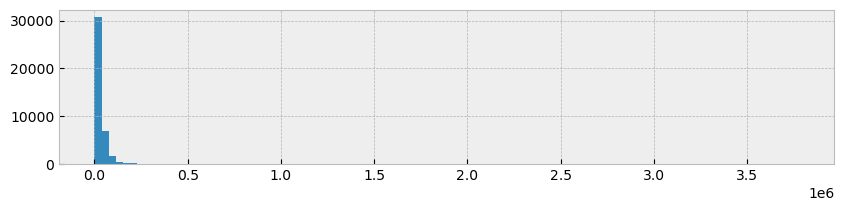

In [105]:
# гистограмма для цены продажи
df['selling_price'].hist(bins=100, figsize=(10,2));

In [106]:
# продажи свыше 1 млн долл. США
df.query('selling_price >= 1000000')[['brand', 'model', 'quant', 'price', 'selling_price', 'delta']].T

13699      16885      20214      20218      20222  \
brand                Jac       Lada        MAN        MAN        MAN   
model                 S3        4x4         TG         TG         TG   
quant              70.00     115.00      10.00      20.00      14.00   
price           15613.95    9000.00  147701.64  100216.63  100056.48   
selling_price 1092976.75 1035000.00 1477016.35 2004332.63 1400790.77   
delta              -0.00       0.00       0.00       0.00       0.00   

                       20349          20358      25555       38408      38710  \
brand          Mercedes-Benz  Mercedes-Benz      Skoda  Volkswagen     Daewoo   
model                G-Class        G-Class    Octavia        Polo   BS 106 D   
quant                   7.00           7.00     100.00       79.00      16.00   
price              165224.10      163222.68   18700.00    15967.85   74986.11   
selling_price     1156568.72     1142558.75 1870000.00  1261459.99 1199777.77   
delta                  -0.00          -0.00       0.00        0.00       0.00   

                   39553      39560      39561  
brand             Daewoo     Daewoo     Daewoo  
model          BC 211 MA     BC 095     BC 095  
quant              30.00      30.00      50.00  
price          105260.39   75912.26   75564.13  
selling_price 3157811.64 2277367.68 3778206.26  
delta               0.00       0.00       0.00

In [107]:
# удалим лишний столбец
df.drop(['delta'], axis=1, inplace=True)

Отдадим должное составителям таблицы, потому что они не ошиблись при заполнении ценовых характеристик.

## 2.4 Итог предобработки

В рамках предобработки проведена замена некорректных и неверных значений на основании данных, содержащихся в открытых источниках, аналогинчых значениях из исходного датафрейма. Также произведена замена пропущенных значений.

Предложена функция для замены пустых значений, применимая для любого датафрейма, имеющего схожую структуру и схожие типы данных.

# 3 Анализ рынка продаж транспортных средств в Казахстане в период январь-сентябрь 2019 г.
## 3.1 Общие характеристики

In [108]:
print('Общая сумма продаж за 9 месяцев 2019 года составляет: {:.2f} млн долл. США'.format(df.selling_price.sum()/1000000))

Общая сумма продаж за 9 месяцев 2019 года составляет: 1349.19 млн долл. США


In [109]:
print(f'Количество проданных автомобилей за 9 месяцев 2019 года: {int(df.quant.sum())} шт.')

Количество проданных автомобилей за 9 месяцев 2019 года: 53875 шт.


Проверим основные статистики количественных значений. В среднем за 9 месяцев за 1 продажу продавали 1,4 автомобиля, т.е. все-таки в основном за раз покупают по 1 автомобилю. Средний объем двигателя авто составляет 2,28 литра, что характерно для автомобилей с малым объемом двигателя - классические городские автомобили.

Средняя цена автомобиля составляет 28 тыс. долл. США, а средняя цена "продажи/сделки" - 33,7 тыс. долл. США

В основном в 2019 году продавались автомобили 2019 года выпуска 

In [110]:
df.describe()

year  drive_volume    quant     price  selling_price
count 39965.00      39965.00 39959.00  39965.00       39965.00
mean   2018.74          2.36     1.35  28249.97       33759.40
std       0.47          1.09     2.37  20005.97       50701.90
min    2011.00          1.20     1.00   7100.00           0.00
25%    2019.00          1.60     1.00  15518.50       16601.93
50%    2019.00          2.00     1.00  24282.27       26248.96
75%    2019.00          2.70     1.00  32505.66       35000.00
max    2019.00         26.70   115.00 328510.97     3778206.26

Рассмотрим графическое представление распределений количественных значений. Как было показано выше, каких-либо аномалий в данных нет. В основном значения сосредоточены "вокруг среднего". Длиннные "хвосты" - наличие нескольких крупных сделок. 

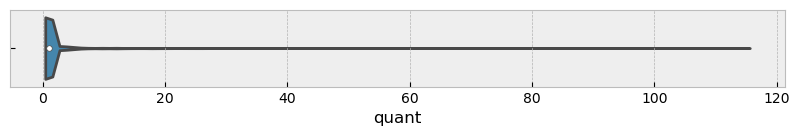

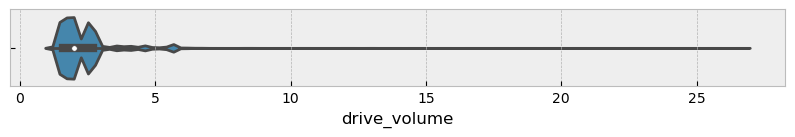

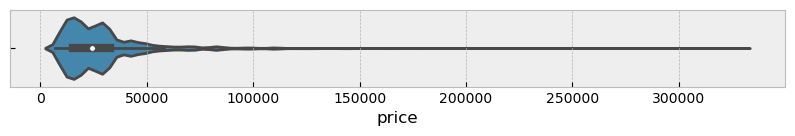

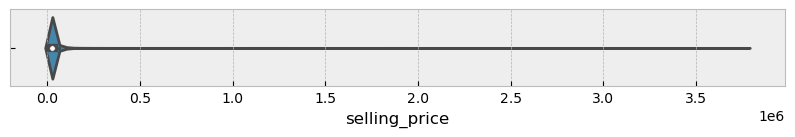

In [111]:
quant_char = ['quant','drive_volume', 'price', 'selling_price']
for i in quant_char:
    plt.figure(figsize=(10,1))
    sns.violinplot(df, x=i)
    plt.show()

Проверим корреляции. Относительно сильно коррелируют значения объема двигателя и цены автомобиля. В целом это объяснимо. В различных источниках встерчается упоминание о том, что в ценобразовании автомобиля существенную роль играет объем двигателя, который влияет на мощность, стоимость таможенных пошлин, налогов. Например, [тут](https://www.linkedin.com/pulse/%D1%87%D1%82%D0%BE-%D0%B1%D0%BE%D0%BB%D1%8C%D1%88%D0%B5-%D0%B2%D1%81%D0%B5%D0%B3%D0%BE-%D0%B2%D0%BB%D0%B8%D1%8F%D0%B5%D1%82-%D0%BD%D0%B0-%D1%86%D0%B5%D0%BD%D1%83-%D0%B0%D0%B2%D1%82%D0%BE%D0%BC%D0%BE%D0%B1%D0%B8%D0%BB%D1%8F-%D0%BF%D1%80%D0%B8-%D0%BA%D0%BE%D0%BD%D1%81%D1%82%D0%B0%D0%BD%D1%82%D0%B8%D0%BD-%D0%BC%D0%B5%D0%BB%D1%8C%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2/?trk=public_profile_article_view) приводятся данные о том, что корреляция между ценой автомобиля и объемом двигателя составляет 0.88. В нашем случае корреляция меньше - 0.7

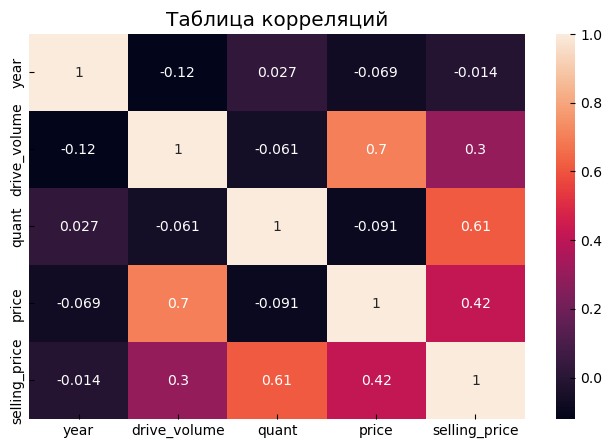

In [112]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True)
plt.title('Таблица корреляций')
plt.show()

## 3.2 Продажи в отдельных разрезах
Отобразим на диаграммах продажи автомобилей (количество проданных автомобилей) в различных разрезах: 
- диллеров
- стран производителей
- марок
- технических характеристик
- регионов продаж
- типов классификаций

In [113]:
# сформируем 3 списка для отрисовки диаграмм
category = ['dealer', 'country_code', 'brand', 'fuel', 
            'transmission', 'drive', 'drive_volume_type','sub_region', 'region', 'segment_2013', 'class_2013', 'segment_eng',
            'localisation']
category_names_1 = ['Диллер', 'Страна производитель', 'Сарка автомобиля', 
                  'Тип топлива', 'Тип коробки передач', 'Тип привода', 'Тип объема двиигателя', 'Регион', 'Область', 
                  'Сегмент', 'Класс', 'Сегмент (евро)', 'Локализация']
category_names_2 = ['диллера', 'страны производителя', 'марки автомобиля', 
                  'типа топлива', 'типа коробки передач', 'типа привода', 'типа объема двиигателя', 'региона', 'области', 
                  'сегмента', 'класса', 'сегмента (евро)', 'локализации']

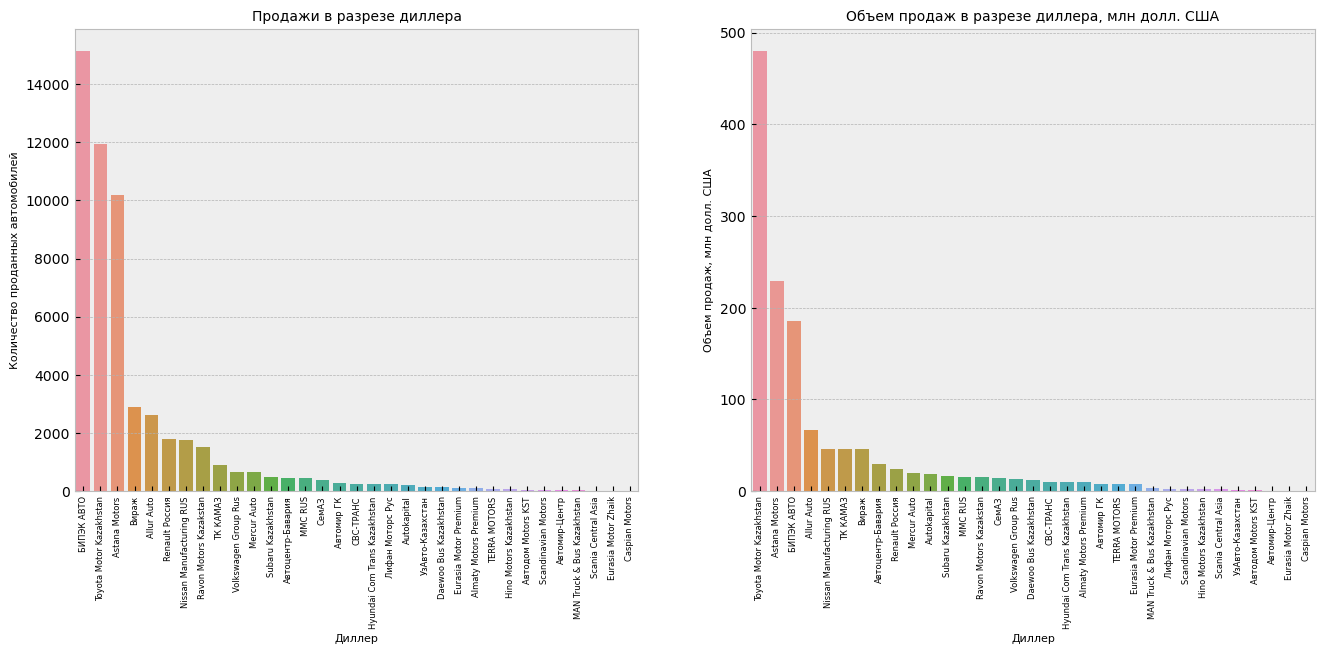

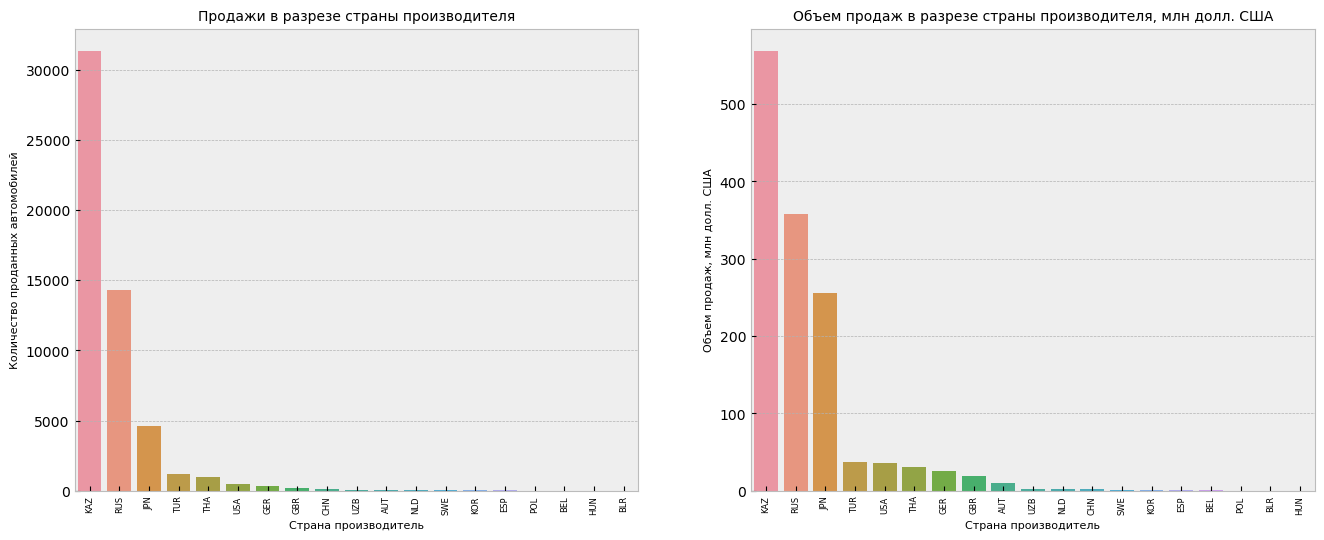

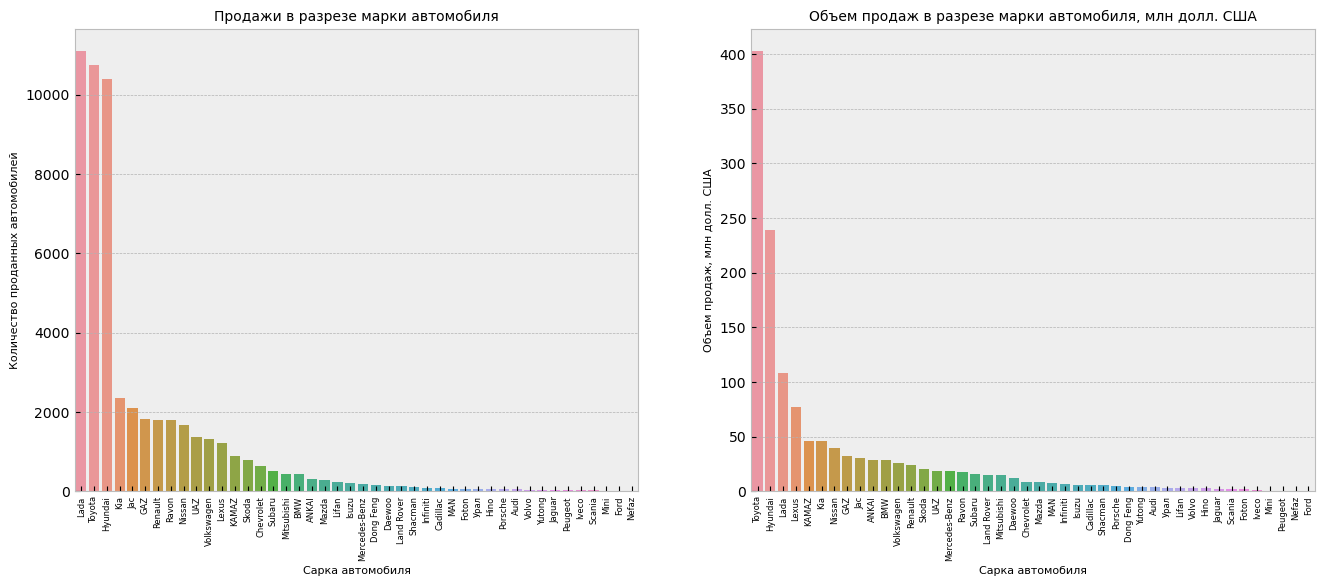

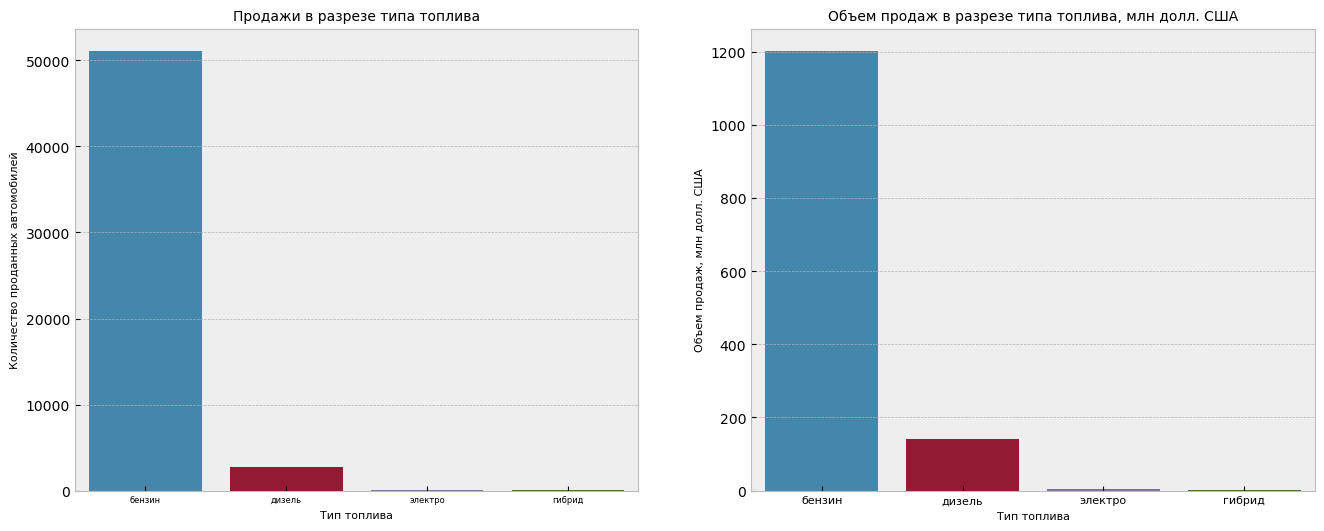

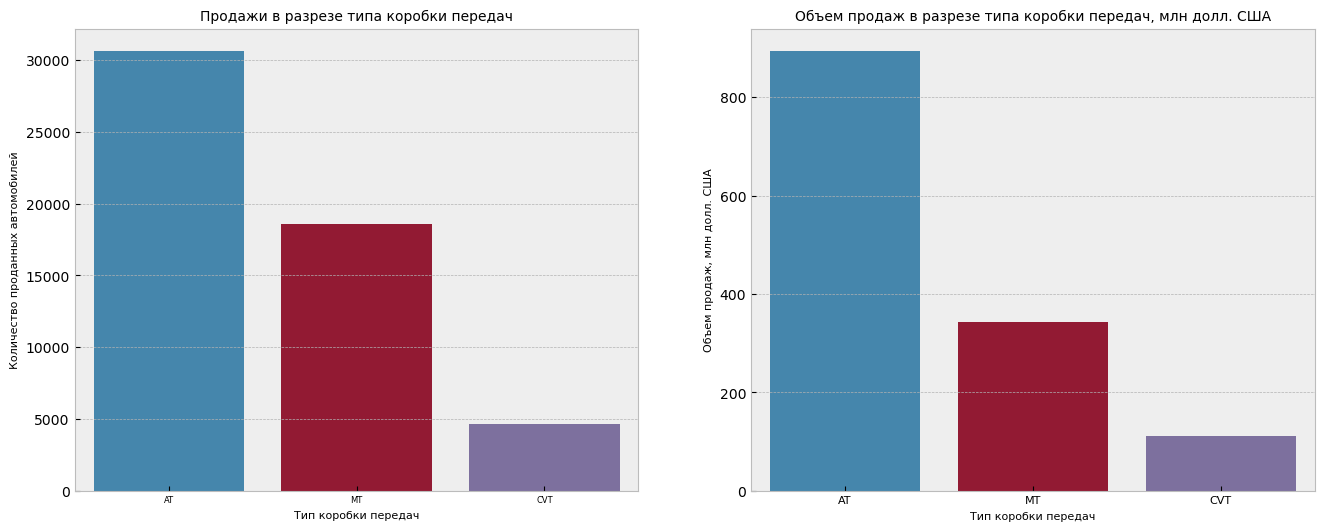

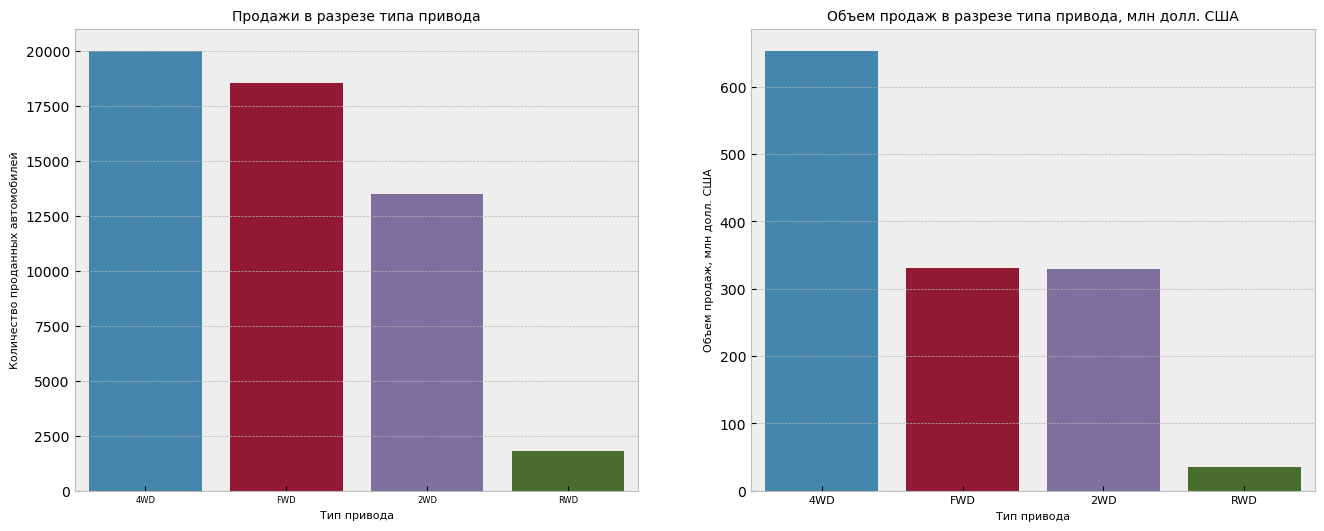

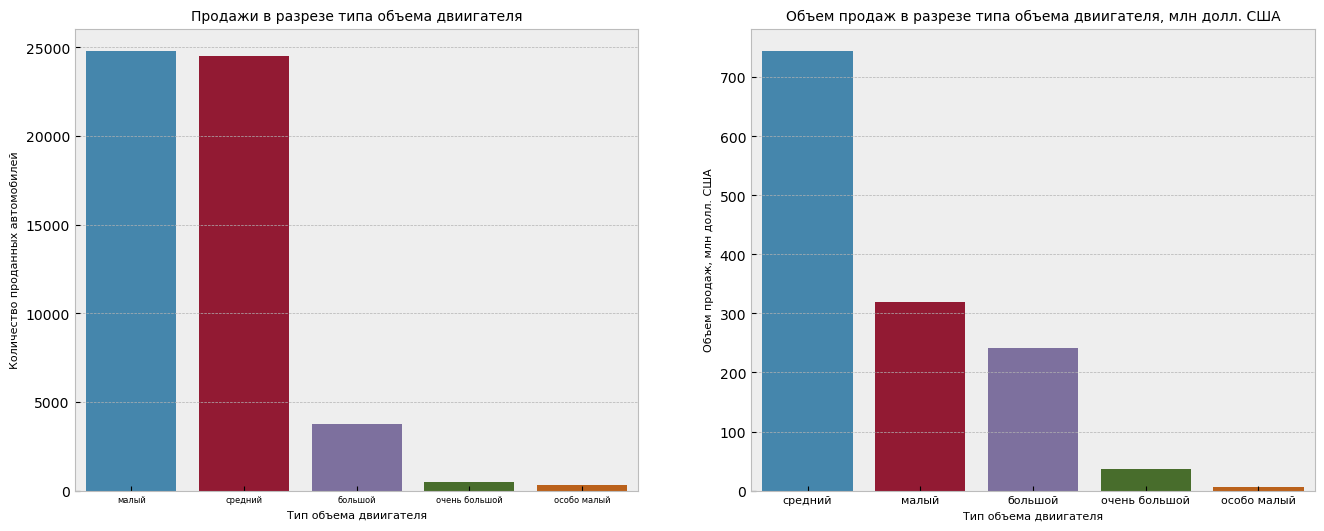

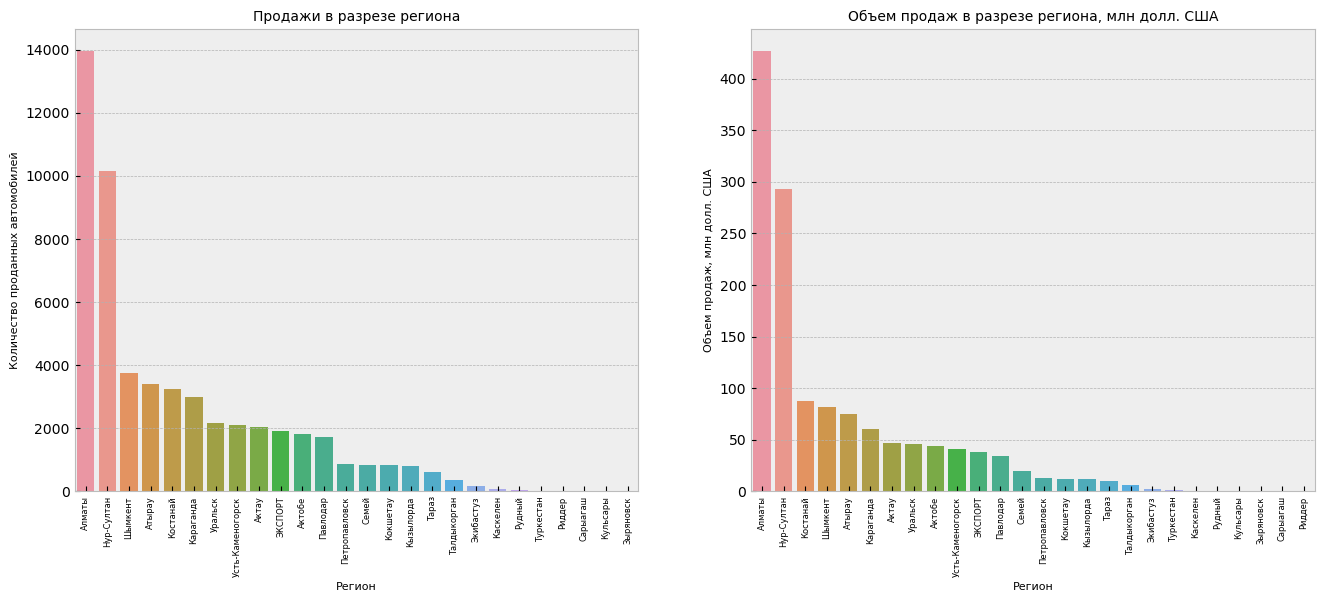

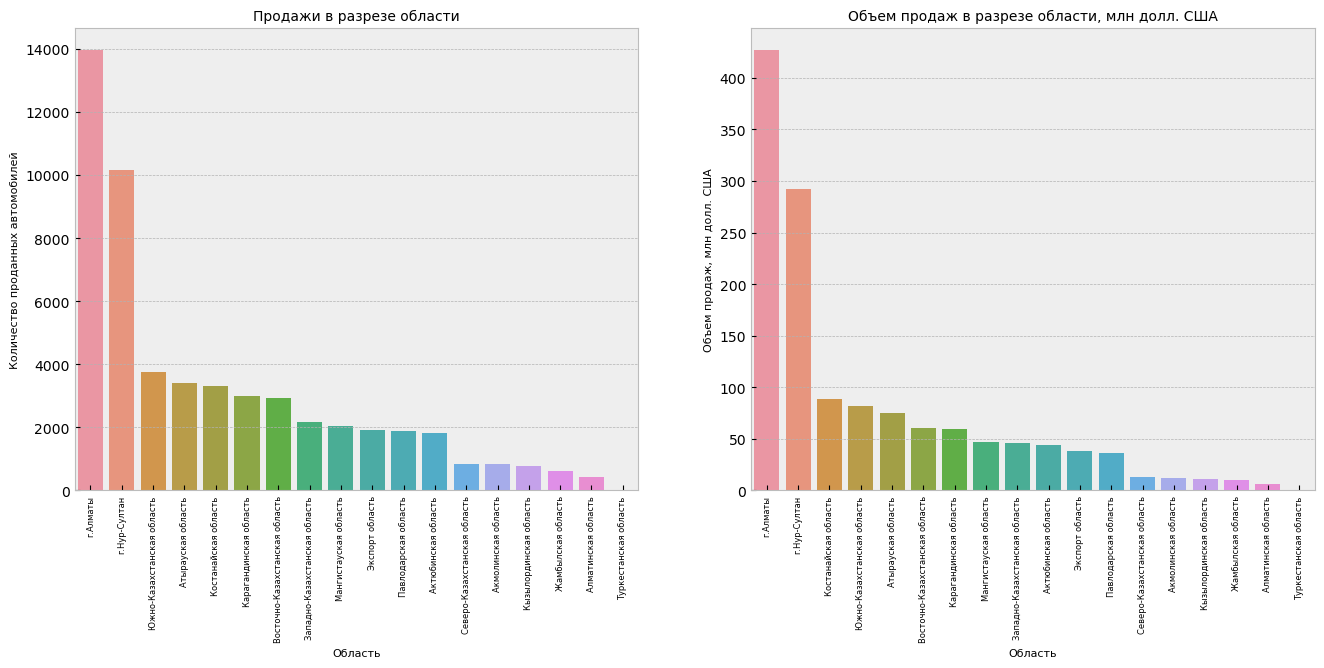

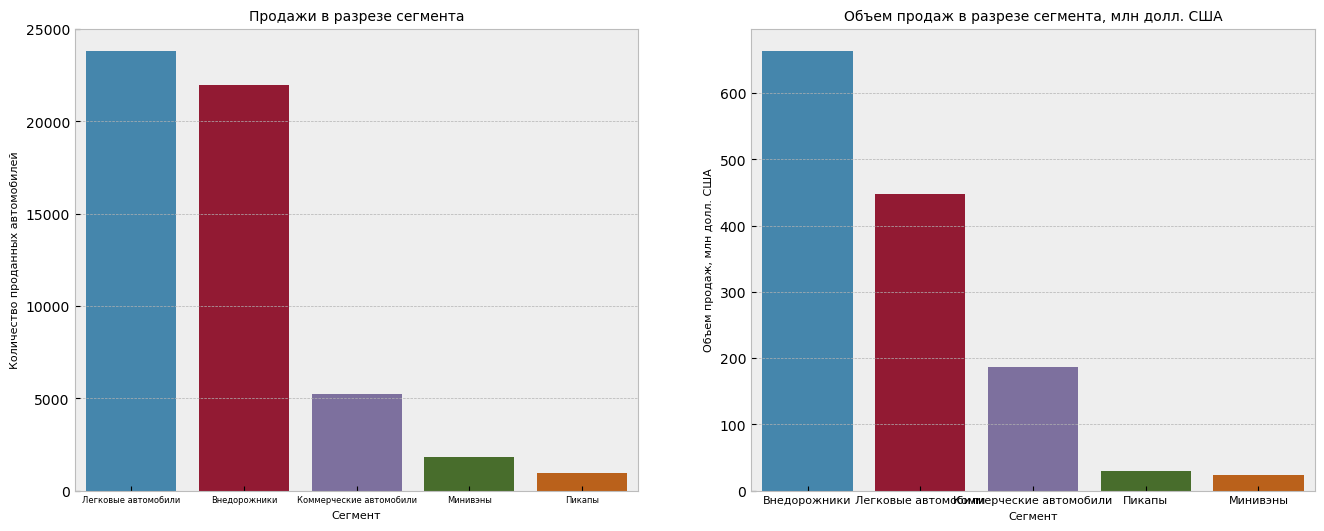

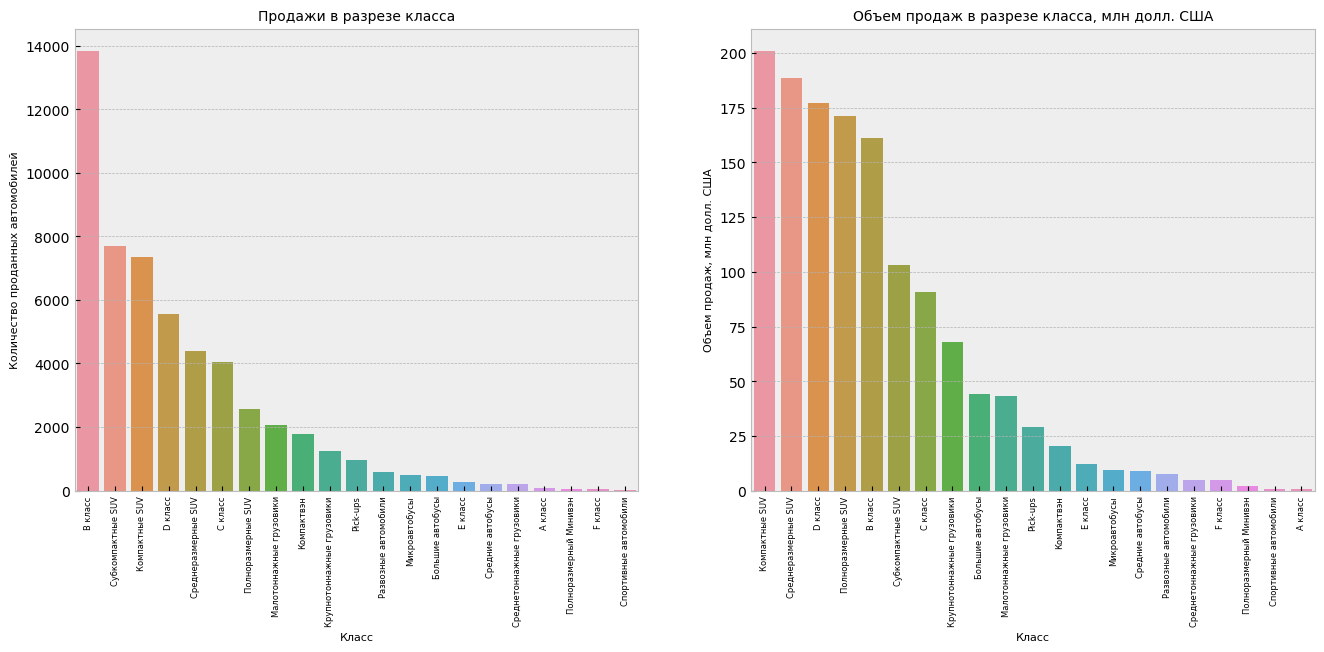

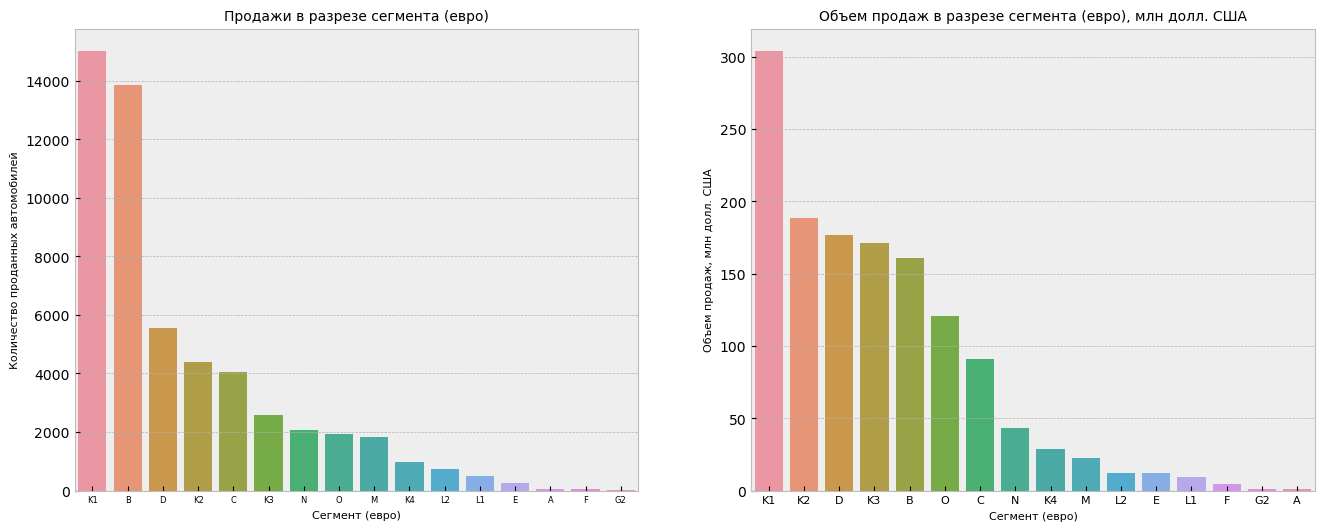

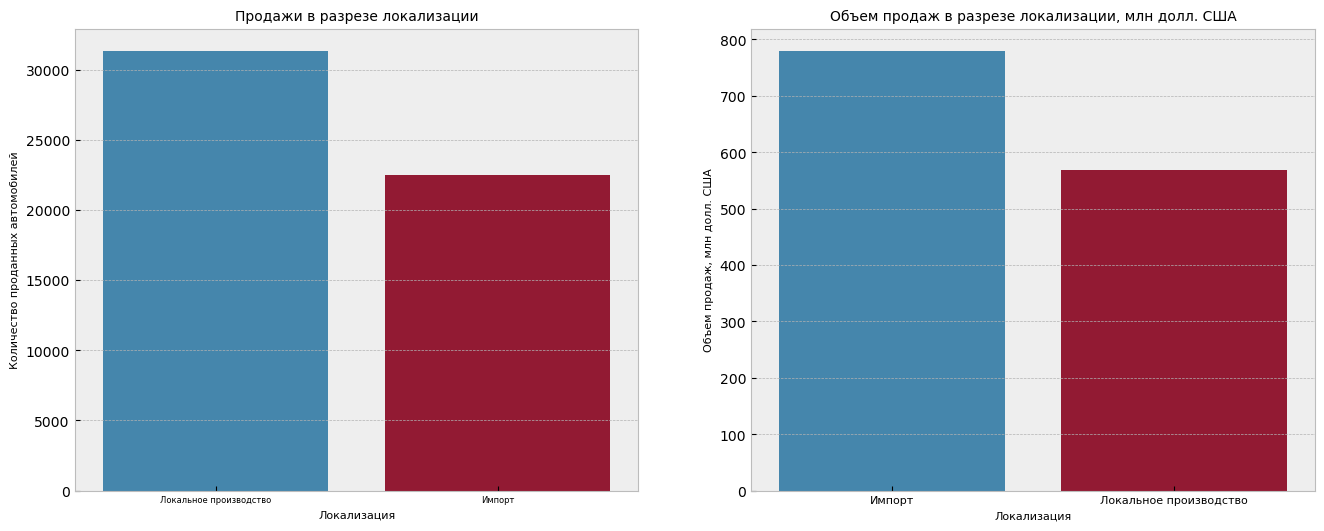

In [114]:
# циклом отобразим 13 диаграм
for i,j,k in zip(category, category_names_1, category_names_2): # проитерируем по 3-м спискам
    #сформируем сводные таблицы для каждого разреза
    data_cnt = df.groupby(i)['quant'].sum().reset_index().sort_values(by='quant', ascending=False) 
    data_price = df.groupby(i)['selling_price'].sum().reset_index().sort_values(by='selling_price', ascending=False)
    data_price['selling_price'] = data_price['selling_price']/1000000
    # отрисовка графиков
    
    plt.figure(figsize=(16,6))
    
    ax1 = plt.subplot(1, 2, 1)
    sns.barplot(data_cnt, x=i, y='quant')
    plt.title(f'Продажи в разрезе {k}', fontsize=10)
    plt.ylabel('Количество проданных автомобилей', fontsize=8)
    plt.xlabel(f'{j}', fontsize=8)
    if len(df[i].unique()) <= 6 or i=='segment_eng': # подбор ориентации подписей оси
        plt.xticks(fontsize=6)
    else:
        plt.xticks(rotation=90, fontsize=6)
        
        
    ax2 = plt.subplot(1, 2, 2)
    sns.barplot(data_price, x=i, y='selling_price')
    plt.title(f'Объем продаж в разрезе {k}, млн долл. США', fontsize=10)
    plt.ylabel('Объем продаж, млн долл. США', fontsize=8)
    plt.xlabel(f'{j}', fontsize=8)
    if len(df[i].unique()) <= 6 or i=='segment_eng':
        plt.xticks(fontsize=8)
    else:
        plt.xticks(rotation=90, fontsize=6)   
    
    plt.show()

Выведем аналогичную информацию в табличном виде. Сформируем таблицы с топ-5 значений в каждом разрезе по 2 таблицы в ряд

In [115]:

# создадим пустой список для датафреймов
categorical_df =[]

# сформируем агрегирвоанные таблицы с топ-5 значений в каждом разрезе (кол-венные и денежные в 1 таблице) и запишем в список
for i,j  in zip(category, category_names_1):
    data_cnt = df.groupby(i)['quant'].sum().reset_index().sort_values(by='quant', ascending=False)
    data_price = df.groupby(i)['selling_price'].sum().reset_index().sort_values(by='selling_price', ascending=False)
    #перевод цены в млн
    data_price['selling_price'] = data_price['selling_price']/1000000
    data_price['ratio'] = 100 * data_price['selling_price']/ data_price['selling_price'].sum()
    data_cnt['ratio'] = 100 * data_cnt['quant']/ data_cnt['quant'].sum()
    # переименовывание столбцов
    data_cnt = data_cnt.rename(columns={i : j, 'quant':'Кол-во', 'ratio' : 'Доля по кол-ву'})
    data_price = data_price.rename(columns={i : j, 'selling_price':'млн долл. США', 'ratio' : 'Доля по продажам'})
    #объединение 2-х таблицы в одну с выводом топ-5
    data = pd.concat([data_cnt.head().reset_index(), data_price.head().reset_index()], axis=1) #сбрасываем индекс, чтобы правильно склеилось
    data.drop('index', axis=1, inplace=True) #удаление лишних индексов
    # добавляем в список датафреймов
    categorical_df.append(data.head())

# воспользуемся помощью высшего разума
# создаем HTML строку для вывода
html_str = ''

for i in range(0, len(categorical_df), 2): # перебор индексов из списка датафремов с шагом 2 для отбора таблиц по 2 шт.
    html_row = '' # создаем строку для вывода 2-х таблиц
    for j in range(2): # перебор таблиц в ряду
        if i + j < len(categorical_df): # если еще не вышли за пределы списка
            # добавим 2 таблицы в строку
            html_row += f'<div style="float: left; width: 50%; padding: 10px;">{categorical_df[i + j].to_html()}</div>'
    # добавляем строку в строку
    html_str += f'<div style="display: flex; flex-wrap: wrap;">{html_row}</div>'

display(HTML(html_str))
                                                                  

## 3.3 Количественные и денежные параметры рынка

**Общая сумма продаж за 9 месяцев 2019 года составляет: 1349.19 млн долл. США**

**Количество проданных автомобилей за 9 месяцев 2019 года: 53875 шт.**

1) Наибольшие продажи в количественном выражении 5 автодиллеров - Бипек Авто, Тойота Моторс, Астана моторс (более 10 тыс. проданных авто), Вираж и Аллюр Авто (примерно по 3 тыс. проданных авто), при этом по объему продаж лидируют Тойота и Астана Моторс - 479 и 229 млн долл США или 35% и 17% рынка соответственно. Лидер по количеству продаж Бипек только на третьем месте по объему продаж - 186 млн (13,7% рынка)
2) В основном проданные автомобили произведены (собраны) в Казахстане и России (58% и 26% от общего количества), поэтому и в разрезе стран-производитлей по объему продаж лидируют именно эти страны - 568 и 357 млн долл. США. При этом, по количеству проданных автомобилей на третьем месте автомобили из Японии (8%), однако в денежном выраженнии - 255 млн или 19% рынка.
3) Примерно 60% проданных автомобилей выпускаются под марками Lada, Toyota, Hyundai (по 19-20% на бренд в порядке убывания), в тоже время автомобили Toyota, Hyundai имеют более высокую цену, чем Lada,  поэтому автомобили данной марки хотя и продаются больше всех, занимают всего 7% в денежном выражении, против 30% и 18% (или 402 и 239 млн долл. США) у Toyota и Hyundai соответственно. Всего 5 брендов автомобилей было продано более 2000 за 9 месяцев - Lada, Toyota, Hyundai, Kia, Jac
4) Наиболее распространенными автомобилями, который покупали в 2019 году являются полноприводные и переднеприводные бензиновые автомобили малого и среднего объема двигателя (от 1,2 до 3,5 л) с автоматической коробкой передач

In [116]:
df.groupby(['fuel', 'drive_volume_type', 
            'drive', 'transmission'])['year'].count().reset_index().sort_values(by='year', ascending=False).head(4)

fuel drive_volume_type drive transmission  year
25  бензин           средний   4WD           AT  8363
5   бензин             малый   2WD           AT  6832
28  бензин           средний   FWD           AT  5294
26  бензин           средний   4WD          CVT  1853

5) За 9 месяцев 2019 года продано 51 тыс. авто с бензиновым двигателем на сумму 1,2 трлн долл (90% рынка в денежном выражении и 96% в количественном)
6) 90% рынка в количественном выражении - автомобили малого и среднего объема двигателя. При этом 60% всех продаж - автомобили среднего объема, 24% - малого или 790 и 327 млн долл. США соответственно. В данные категории в основном попадают все автомобили в сегментах "Легковые" и "Внедоронжники", продажи которых распределены следующим образом:
- легковые, продано 28 тыс на сумму 447 млн долл. США
- внедорожники, продано 22 тыс на сумму 664 млн долл. США
7) 57% всех проданных автомобилей имеют автоматическую коробку передач, 34% - механическую, 8,6% - вариатор. Из-за того, что средняя цена на автомобили с автоматической коробкой и вариатором выше автомобилей с механической в денежном выражении авто на автомате и вариатора занимают 66% и 8% рынка соовтетсвенно, что составляет 894 и 111 млн долл. США
8) В основном продажи сосредоточены в 2-х крупнейших городах Казахстана - Алматы и Нур-Султане, где продано более 53% авто в денежном выражении (или 45% в количественном). В остальных субъектах/регионах продажи менее 1-6%
9) Отдельно стоит отметить топ-5 сегментов/классов по количеству и объему продаж. Самыми популярными сегментами/классами автомобилей являются (в порядке убывания кол-ва проданных автомобилей):
- B класс	
- Субкомпактные SUV	
- Компактные SUV	
- D класс	
- Среднеразмерные SUV	

При этом основной доход диллерам приносят следующие классы:
- Компактные SUV	201.12	млн 
- Среднеразмерные SUV	188.52 млн 	
- D класс	177.01 млн 
- Полноразмерные SUV 171.21	млн 
- B класс	161.03	млн 

Т.е. хотя каждый 4-й проданный автомобиль -  В класс (25% от общего количества), общая доля рынка данного класса - 11% 
10) В разрезе европейской классификации самые популярные сегменты - К1, В, D, K2, C

11) Распределение типа производства автомобилей примерно 60/40 (локализация/импорт) в количественном выражении и 40/60 в денежном

## 3.4 Динамика продаж 

Рассмотрим динамику продаж в разрезе 9 месяцев 2019 года. Январь-февраль - "низкий сезон", в который совершается минимум покупок за год, после которого начинается плавный рост продаж с 110 до 165 млн долл США в месяц до июня 2019 года. В июле наблюдается резкий скачок продаж до 203 млн. В августе сентябре продажи возвращаются на уровень начала лета.

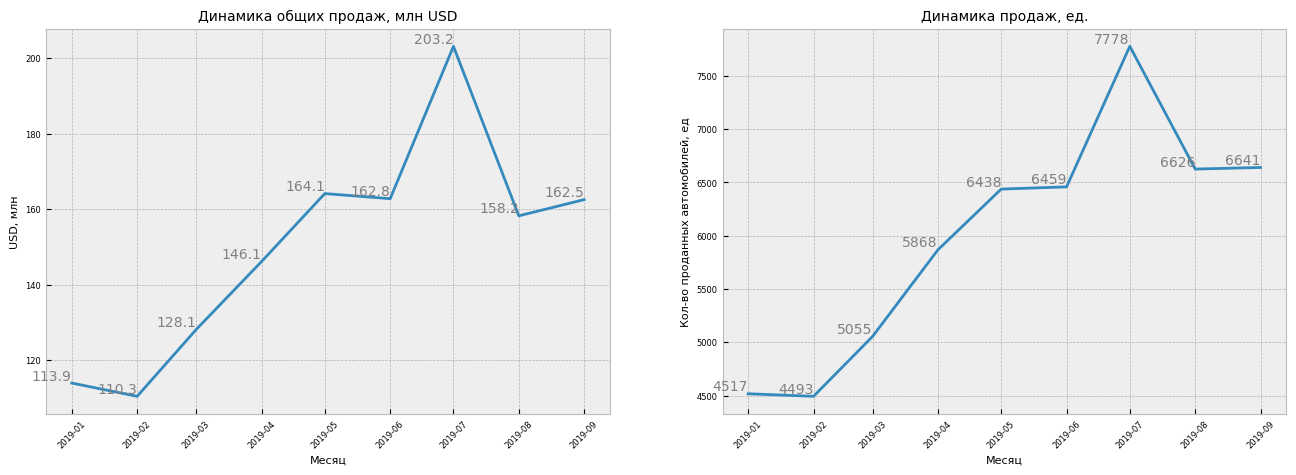

In [117]:
data_price = df.groupby('year_month')['selling_price'].sum().reset_index()
data_price['selling_price'] = data_price['selling_price'] / 1000000
data_cnt = df.groupby('year_month')['quant'].sum().reset_index()

plt.figure(figsize=(16,5))
ax1 = plt.subplot(1, 2, 1)
sns.lineplot(data_price, x='year_month', y='selling_price', markers=True)

for i, j in zip(data_price['year_month'], data_price['selling_price']):
    t = plt.text(i, j, round(j,1),
                 horizontalalignment='right',
                 rotation='horizontal',
                 verticalalignment='bottom',
                 fontdict={'color':'grey'})

plt.title('Динамика общих продаж, млн USD', fontsize=10)
plt.xlabel('Месяц', fontsize=8)
plt.ylabel('USD, млн', fontsize=8)
plt.xticks(rotation=45, fontsize=6)
plt.yticks(fontsize=6)

ax2 = plt.subplot(1, 2, 2)
sns.lineplot(data_cnt, x='year_month', y='quant', markers=True)

for i, j in zip(data_cnt['year_month'], data_cnt['quant']):
    t = plt.text(i, j, int(j),
                 horizontalalignment='right',
                 rotation='horizontal',
                 verticalalignment='bottom',
                 fontdict={'color':'grey'})

plt.title('Динамика продаж, ед.', fontsize=10)
plt.xlabel('Месяц', fontsize=8)
plt.ylabel('Кол-во проданных автомобилей, ед', fontsize=8)
plt.xticks(rotation=45, fontsize=6)
plt.yticks(fontsize=6)

plt.show()

### 3.4.1 Динамика продаж в разрезе тех. характеристик

Рассмотрим динамику продаж в разрезе отдельных категорий - технических характеристик автомобиля 

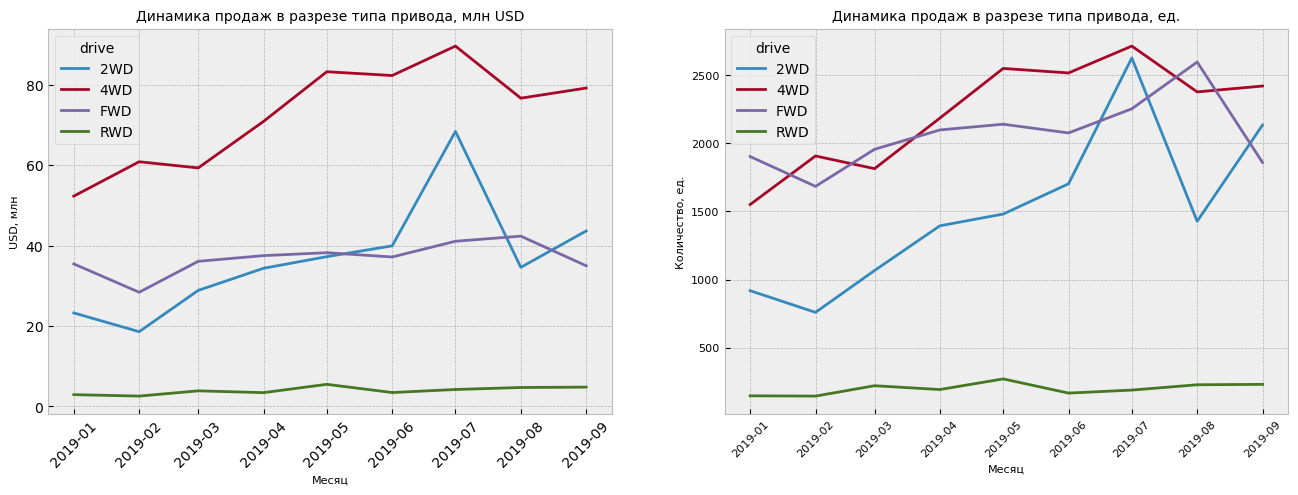

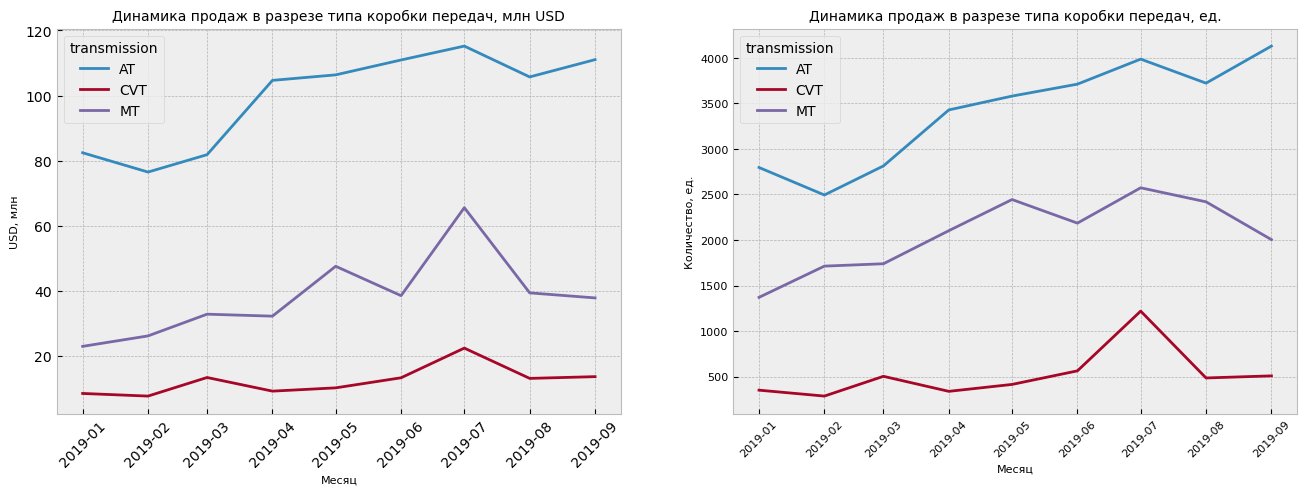

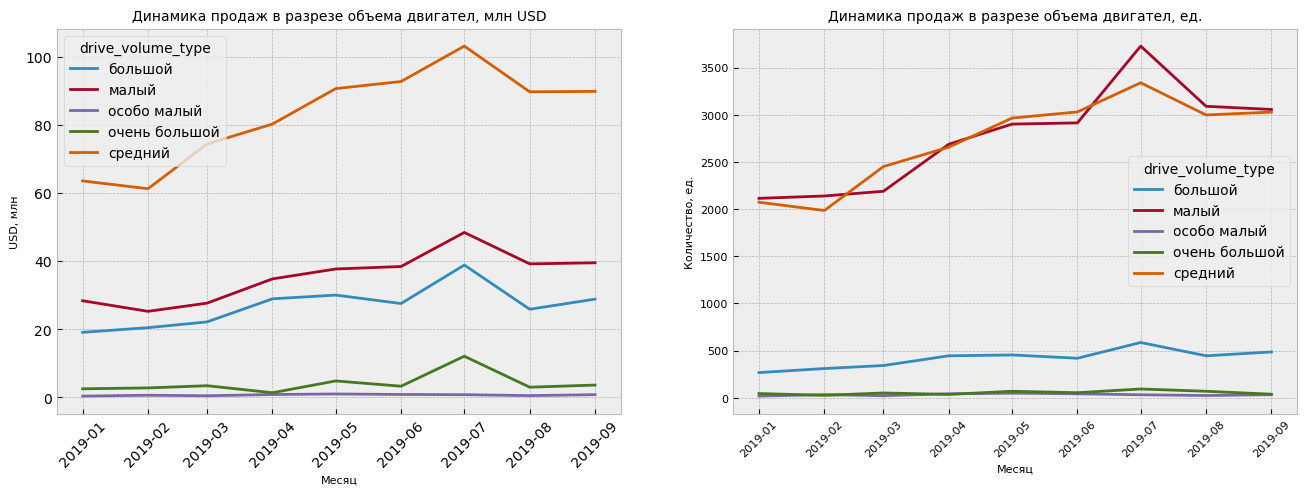

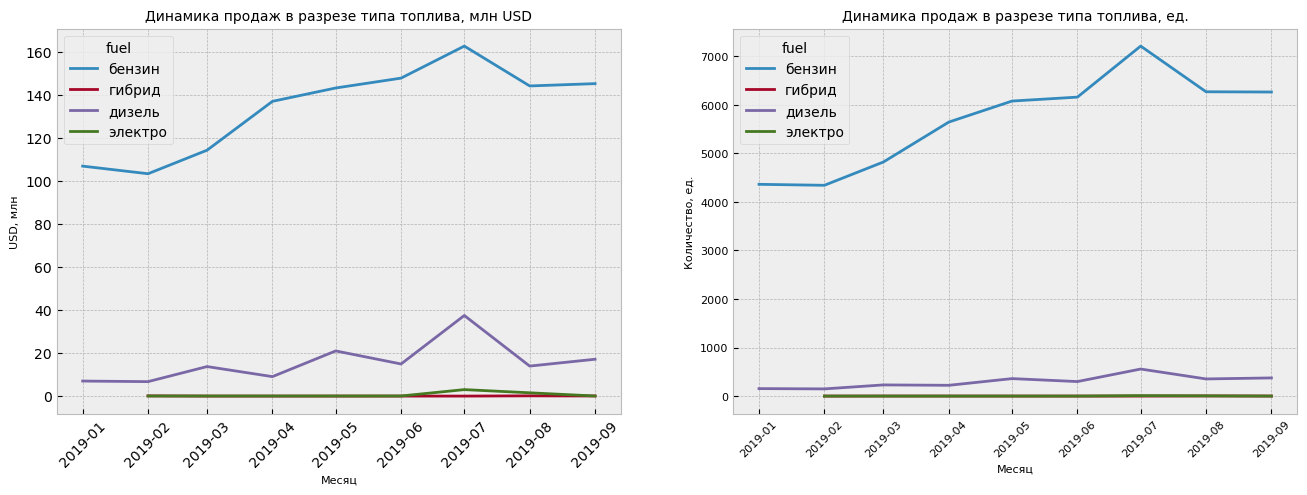

In [118]:
tech_category = ['drive', 'transmission', 'drive_volume_type', 'fuel']
tech_category_2 = ['типа привода', 'типа коробки передач', 'объема двигател' ,'типа топлива']

for i,j in zip(tech_category, tech_category_2):
    data_price = df.groupby([i,'year_month'])['selling_price'].sum().reset_index()
    data_price['selling_price'] = data_price['selling_price'] / 1000000
    data_cnt = df.groupby([i,'year_month'])['quant'].sum().reset_index()
    
    plt.figure(figsize=(16,5))
    ax1 = plt.subplot(1, 2, 1)
   
    sns.lineplot(data_price, x='year_month', y='selling_price', hue=i)
    plt.title(f'Динамика продаж в разрезе {j}, млн USD', fontsize=10)
    plt.xlabel('Месяц', fontsize=8)
    plt.ylabel('USD, млн', fontsize=8)
    plt.xticks(rotation=45)
    
    ax2 = plt.subplot(1, 2, 2)
    sns.lineplot(data_cnt, x='year_month', y='quant', hue=i)
    plt.title(f'Динамика продаж в разрезе {j}, ед.', fontsize=10)
    plt.xlabel('Месяц', fontsize=8 )
    plt.ylabel('Количество, ед.', fontsize=8)
    plt.xticks(fontsize=8, rotation=45)
    plt.yticks(fontsize=8)
    
    plt.show()

В целом общий профиль динамик продаж в разрезе тех. характеристик повторяет общий профиль динамики продаж. Также данная динамика соответствует результатам, полученным в предыдущем пункте. Т.е. на данных графиках явно видно, что продажи полноприводных автомобилей  - основной источник дохода диллеров, или то, что автомобили со средним и малым объемом двигателя самые продаваемые среди всех. 

Резкий рост продаж в июле 2019 года в основном произошел за счет продаж неполноприводных (2WD) механической коробкой передач. Возможно в данный период произошла массовая закупка коммерческого транспорта. Проверим, представим данные на линейном графике в разрезе сегментов

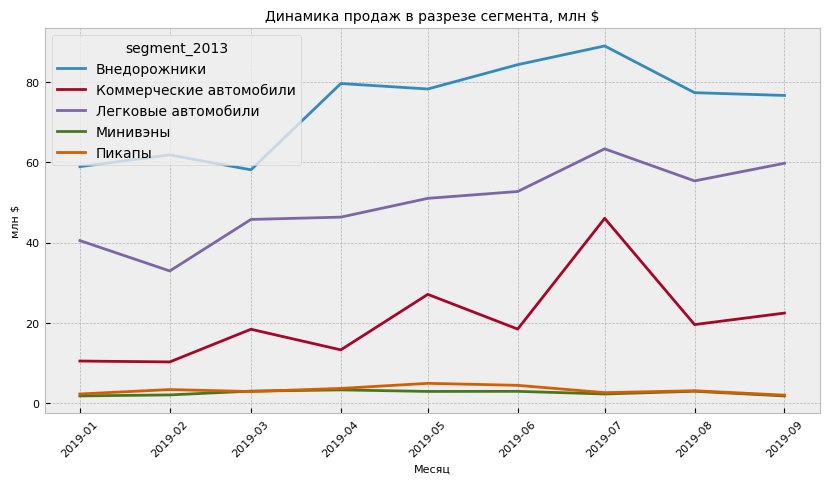

In [119]:
segment_df = df.groupby(['segment_2013','year_month'])['selling_price'].sum().reset_index()
segment_df['selling_price'] = segment_df['selling_price'] / 1000000
plt.figure(figsize=(10,5))
sns.lineplot(segment_df, 
            x='year_month', y='selling_price', hue='segment_2013')
plt.title(f'Динамика продаж в разрезе сегмента, млн $', fontsize=10)
plt.xlabel('Месяц', fontsize=8 )
plt.ylabel('млн $', fontsize=8)
plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=8)
plt.show()

Действительно, в июле 2019 года резко выросли продажи коммерческого транспорта, примерно на 28 млн долл. Продажи минивенов и пикапов наоборот - сократились. При этом количество проданных авто увеличилось не резко в рассматриваемый период. Скорее всего, рост общих продаж вызван ростом цен на коммерческие автомобили. Детальная информация в таблице ниже (кол-во проданных авто и объем продаж за 3 месяца)

In [120]:
(df.query('report_month == "Май" or report_month == "Июнь" or report_month == "Июль"').
          pivot_table(index='segment_2013', columns='year_month', 
                      values=['selling_price', 'quant'], aggfunc={'selling_price':'sum', 'quant':'sum'})
)

quant                       selling_price  \
year_month              2019-05-01 2019-06-01 2019-07-01    2019-05-01   
segment_2013                                                             
Внедорожники               2643.00    2753.00    3370.00   78252470.09   
Коммерческие автомобили     750.00     549.00     870.00   27076056.42   
Легковые автомобили        2642.00    2773.00    3274.00   51004315.36   
Минивэны                    237.00     239.00     174.00    2888234.61   
Пикапы                      166.00     145.00      90.00    4904435.37   

                                                 
year_month               2019-06-01  2019-07-01  
segment_2013                                     
Внедорожники            84311810.30 88977963.82  
Коммерческие автомобили 18424569.09 46020951.11  
Легковые автомобили     52709196.34 63340595.58  
Минивэны                 2909680.49  2254891.28  
Пикапы                   4408797.64  2585454.47

### 3.4.2 Динамика средней цены

Рассмотрим динамику средней цены на автомобили в разрезе технических характеристик

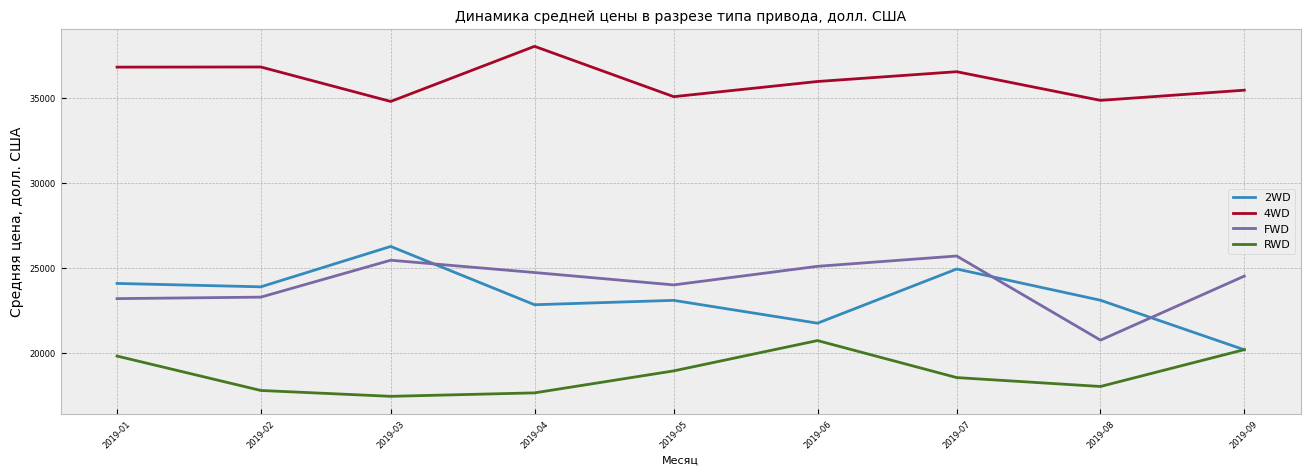

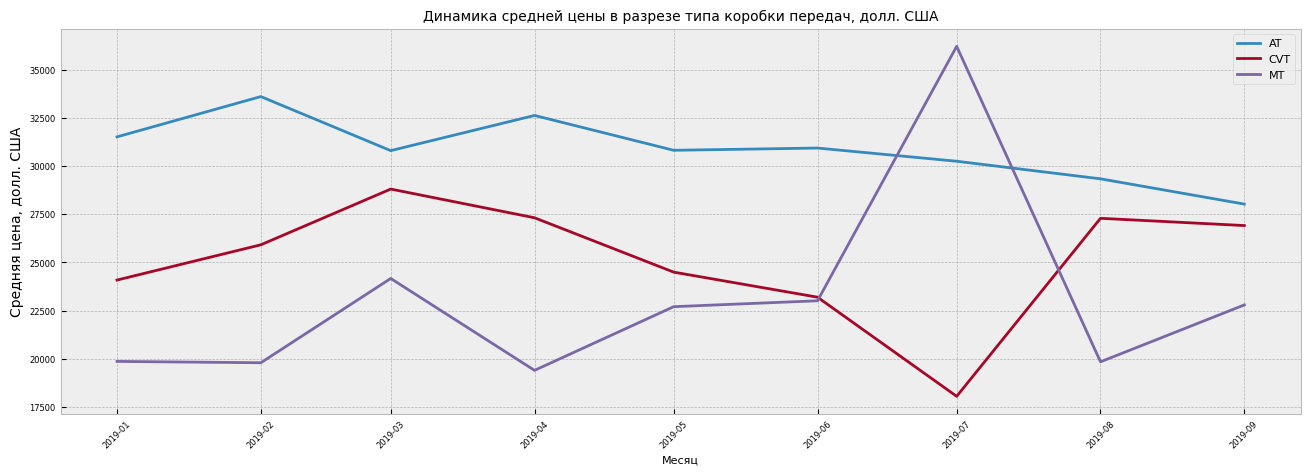

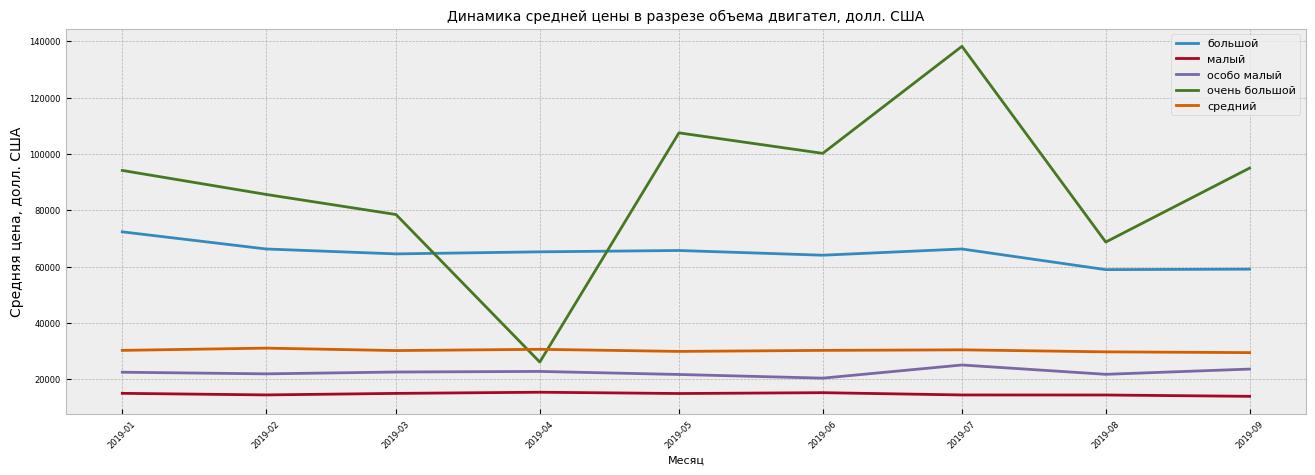

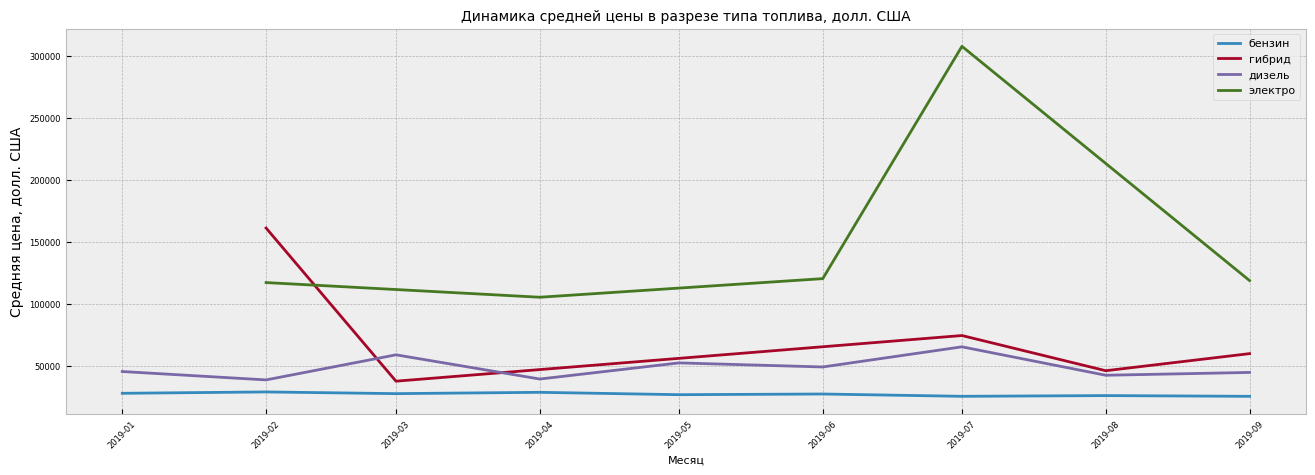

In [121]:
tech_category_3 = ['типа привода', 'типа коробки передач', 'объема двигател' ,'типа топлива']

for i,j in zip(tech_category, tech_category_3):
    plt.figure(figsize=(16,5))
    sns.lineplot(df.groupby([i,'year_month'])['price'].mean().reset_index(), 
                 x='year_month', y='price', hue=i)
    plt.title(f'Динамика средней цены в разрезе {j}, долл. США', fontsize=10)
    plt.xlabel('Месяц', fontsize=8)
    plt.ylabel('Средняя цена, долл. США', fontsize=10)
    plt.xticks(fontsize=6, rotation=45)
    plt.yticks(fontsize=6)
    plt.legend(fontsize=8)
    plt.show()

Как видно из представленной динамики в целом колебание средних цен от месяца к месяцу постоянно около усредненного значения (например в разрезе типа привода, топлива (кроме цены на электромобили), объема двигателя (кроме особо большого объема), однако есть некоторые выбросы, например в июле наблюдается резкий рост средней цены на автомобили с механической коробкой передач, что скорее всего связано с тем, что в июле была увеличена стоимость коммерческого транспорта. Проверим.

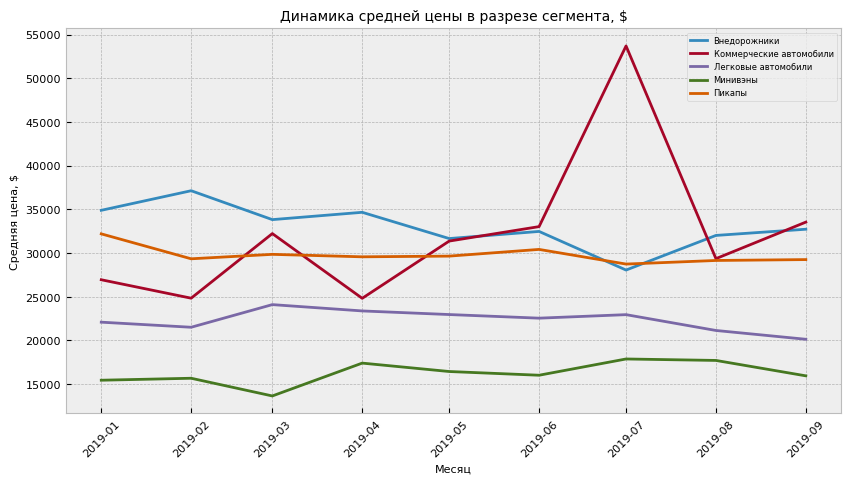

In [122]:
segment_mean_price = df.groupby(['segment_2013','year_month'])['price'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(segment_mean_price, x='year_month', y='price', hue='segment_2013')
plt.title(f'Динамика средней цены в разрезе сегмента, $', fontsize=10)
plt.xlabel('Месяц', fontsize=8 )
plt.ylabel('Средняя цена, $', fontsize=8)
plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=8)
plt.legend(fontsize=6)
plt.show()

Так и есть. Предположение подтвердилось. Общий рост объема продаж в июле в основном связан с тем, что в  июле были повышены цены на коммерческий транспорт, которые уже в августе опустились до своих обычных значений.  

**Возможно** в июле рядом диллеров был заключен "картельный сговор", т.к. появилась инсайдерская информация о том, что в июле будет совершена крупная закупка. Проверим, кто из диллеров повысил цены

In [123]:
dealer_price = df.query('(report_month == "Май" or report_month == "Июнь" or report_month == "Июль") and segment_2013 == "Коммерческие автомобили"')
dealer_price = dealer_price.pivot_table(index='dealer', columns='report_month', values=['price'], aggfunc='mean')
dealer_price['delta'] = dealer_price[('price', 'Июль')] - dealer_price[('price', 'Июнь')]
dealer_price['ratio'] = 100 * dealer_price['delta'] / dealer_price['price', 'Июль']
dealer_price

price                         delta  ratio
report_month                      Июль      Июнь       Май                 
dealer                                                                     
Allur Auto                    92866.16  56343.46  78900.89  36522.70  39.33
Autokapital                  131903.14 106733.12  97833.10  25170.02  19.08
Daewoo Bus Kazakhstan         75564.13  75912.26 105260.39   -348.13  -0.46
Hino Motors Kazakhstan        47885.78  78158.00  48912.57 -30272.22 -63.22
Hyundai Com Trans Kazakhstan  43471.58  45617.27  32638.71  -2145.69  -4.94
Scania Central Asia           99465.42 100780.68 101312.09  -1315.25  -1.32
Volkswagen Group Rus          25535.25       NaN       NaN       NaN    NaN
БИПЭК АВТО                    13523.81  12884.21  13560.98    639.60   4.73
Вираж                         16917.31  16298.41  16655.96    618.89   3.66
СВС-ТРАНС                     48361.80  33375.42  39794.32  14986.38  30.99
СемАЗ                         44986.76  48776.11  43798.75  -3789.35  -8.42
ТК КАМАЗ                      53636.37  50919.89  51636.59   2716.48   5.06

Как видно из приведенной таблицы, некоторые диллеры все же существенно подняли свои цены в июле - Allur Auto, СВС-ТРАНС и Autokapital - на 40, 30, 20% соответственно. Большая часть диллеров подняли цены в интервале 5%, а некоторые даже снизили, особенно Hino Motors - на 63%.

Проверим кол-во продаж. Оказывается, Allur Auto увеличил свои продажи в июле на 183 ед. с 40 до 223. При этом в мае было продано 57 ед. авто

In [124]:
dealer_cnt = df.query('(report_month == "Май" or report_month == "Июнь" or report_month == "Июль") and segment_2013 == "Коммерческие автомобили"')
dealer_cnt = dealer_cnt.pivot_table(index='dealer', columns='report_month', values=['quant'], aggfunc='sum')
dealer_cnt['delta'] = dealer_cnt[('quant', 'Июль')] - dealer_cnt[('quant', 'Июнь')]
dealer_price['ratio'] = 100 * dealer_cnt['delta'] / dealer_cnt['quant', 'Июль']
dealer_cnt

quant                delta
report_month                   Июль   Июнь    Май       
dealer                                                  
Allur Auto                   223.00  40.00  57.00 183.00
Autokapital                   12.00   4.00  12.00   8.00
Daewoo Bus Kazakhstan         50.00  30.00  30.00  20.00
Hino Motors Kazakhstan         3.00   2.00   7.00   1.00
Hyundai Com Trans Kazakhstan  35.00  30.00  25.00   5.00
Scania Central Asia            2.00   3.00   1.00  -1.00
Volkswagen Group Rus           3.00    NaN    NaN    NaN
БИПЭК АВТО                   101.00  85.00  83.00  16.00
Вираж                        184.00 187.00 332.00  -3.00
СВС-ТРАНС                     19.00  18.00  60.00   1.00
СемАЗ                         43.00  41.00  55.00   2.00
ТК КАМАЗ                     195.00 109.00  88.00  86.00

Рассмотрим отдельно продажи Allur Auto в июле

In [125]:
(df.query('dealer == "Allur Auto" and report_month == "Июль" and segment_2013 == "Коммерческие автомобили"')
     .groupby(['brand', 'model'])['quant'].sum().reset_index()
)

brand          model  quant
0   ANKAI  HFF6124G03EV3  10.00
1   ANKAI    HFF6127GZ-4  20.00
2   ANKAI       HFF6850G 138.00
3   Iveco          Daily   1.00
4     Jac           N120  14.00
5     Jac            N56   6.00
6     MAN             TG   3.00
7  Yutong      ZK6108HGH  31.00

In [126]:
strange_list = df.query('dealer == "Allur Auto" and report_month == "Июль" and segment_2013 == "Коммерческие автомобили"')['model'].unique()

dealer_price = df.query('dealer == "Allur Auto" and model in @strange_list and (report_month == "Июль" or report_month == "Июнь")')
dealer_price = dealer_price.pivot_table(index='model', columns='report_month', values=['price', 'quant'], aggfunc={'price':'mean', 'quant':'sum'})
dealer_price['delta'] = dealer_price[('price', 'Июль')] - dealer_price[('price', 'Июнь')]
dealer_price['ratio'] = 100 * dealer_price['delta'] / dealer_price['price', 'Июль']
dealer_price

price           quant          delta  ratio
report_month       Июль     Июнь   Июль  Июнь                
model                                                        
Daily          33091.60      NaN   1.00   NaN      NaN    NaN
HFF6124G03EV3 307986.36      NaN  10.00   NaN      NaN    NaN
HFF6127GZ-4   142788.94      NaN  20.00   NaN      NaN    NaN
HFF6850G       80905.05 84086.66 138.00 22.00 -3181.62  -3.93
N120           25924.52 20636.84  14.00 14.00  5287.68  20.40
N56            12711.10 19109.06   6.00  1.00 -6397.96 -50.33
TG             99232.35      NaN   3.00   NaN      NaN    NaN
ZK6108HGH      91979.01      NaN  31.00   NaN      NaN    NaN

Гипотеза не совсем подтвердилась. Сговора не было. Закрыть следствие. Рост средней цены продажи произошел за счет того, что в мае-июне некоторые модели не продавались, однако в июле Allur Auto продал более 100 автобусов модели HFF6850G	 по цене 80 тыс., при этом снизив на него цену на 4 тыс. а также 10-30 моделей других брендов по ценам 90, 142, 307 тыс. Что и привело в т.ч. к резкому скачку объемов продаж в июле 2019 года, аналогичная картина наблюдалась у некоторы других диллеров но не в таких объемах.


Выведем усредненную информацию о средних ценах для каждой технической характеристики. Для этого рассчитаем:
- среднее значение каждого типа технической характеристики
- максимальное и минимальное среднемесячные значения типов технической характеристики
- разницу минимального и минимально значения
- относительные изменение между минимальным и максимальным значением
Сводные таблицы представим в виде 2 рядов и 2 колонок

In [127]:
data_list = []
for i,j in zip(tech_category, tech_category_3):
    data = df.groupby([i,'year_month'])['price'].mean().reset_index()
    data = data.groupby(i).agg({'price' : ('min', 'max', 'mean')}).reset_index()
    data['delta'] = data['price','max'] - data['price', 'min']
    data['ratio'] = 100 * data['delta'] / data['price','min']
    data_list.append(data)

    # создаем HTML строку для вывода
html_str = ''

for i in range(0, len(data_list), 2): # перебор индексов из списка датафремов с шагом 2 для отбора таблиц по 2 шт.
    html_row = '' # создаем строку для вывода 2-х таблиц
    for j in range(2): # перебор таблиц в ряду
        if i + j < len(data_list): # если еще не вышли за пределы списка
            # добавим 2 таблицы в строку
            html_row += f'<div style="float: left; width: 50%; padding: 10px;">{data_list[i + j].to_html()}</div>'
    # добавляем строку в строку
    html_str += f'<div style="display: flex; flex-wrap: wrap;">{html_row}</div>'

display(HTML(html_str))


Из данных расперделений видно, что действительно в течении 9 месяцев для некоторых категорий автомобилей наблюдаются большие скачки средней цены, так на автомобили 2WD разнича между макисмально и минимальной ценой составляет 30% (6 тыс. долл. США), а между автомобилями с механической трансмиссией и вариатором азница - 86% (16 тыс. и 59%(10 тыс.) соответственно.

Различие в средней цене авто с очень большим объемом двигателя достигает 429% (112 тыс.). Аналогичная ситуация с электромобилями.

Данные значения дополнительно объясняют поведение динамики средних цен, представленной на графиках выше, а также являются численным подтверждением резкого роста объема продаж в июле.

### 3.4.3 Модели

Рассмотрим динамику продаж топ автомомбилей (по кол-ву проданных авто)

In [128]:
# сформируем таблицу для графика
top_models = df.groupby(['brand', 'model'])['quant'].sum().reset_index().sort_values(by='quant', ascending=False).head(5)
top_models['brand_model'] = top_models['brand'] + ' ' + top_models['model']
top_models_list = top_models['brand_model'].unique()

top_models_sell = df.groupby(['brand', 'model', 'year_month']).agg({'selling_price' : 'sum', 'quant' : 'sum', 'price':'mean'}).reset_index()
top_models_sell['brand_model'] = top_models_sell['brand'] + ' ' + top_models_sell['model']
top_models_sell['selling_price'] = top_models_sell['selling_price'] / 1000000

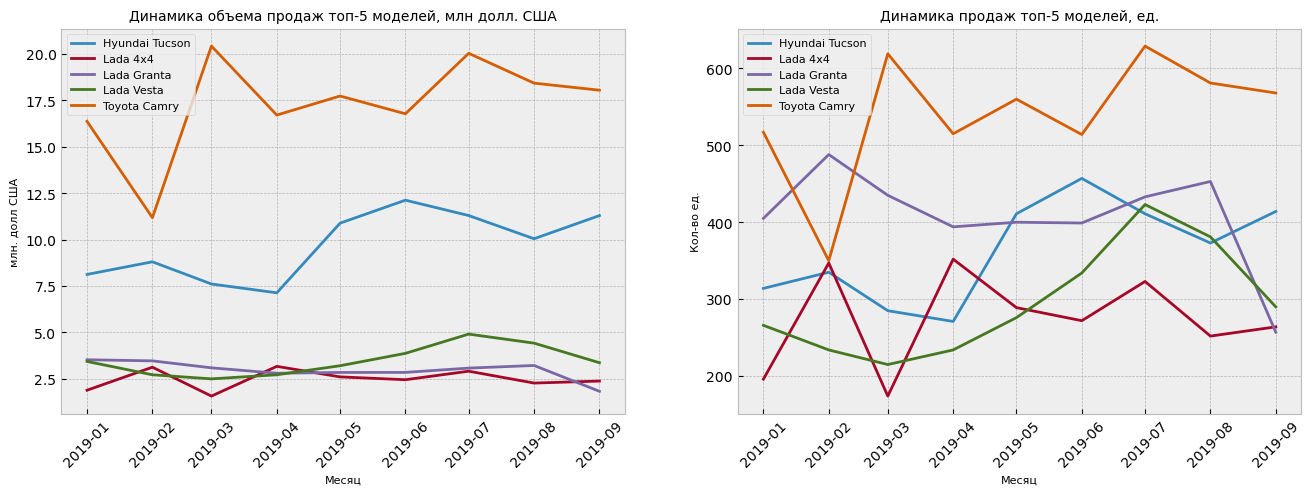

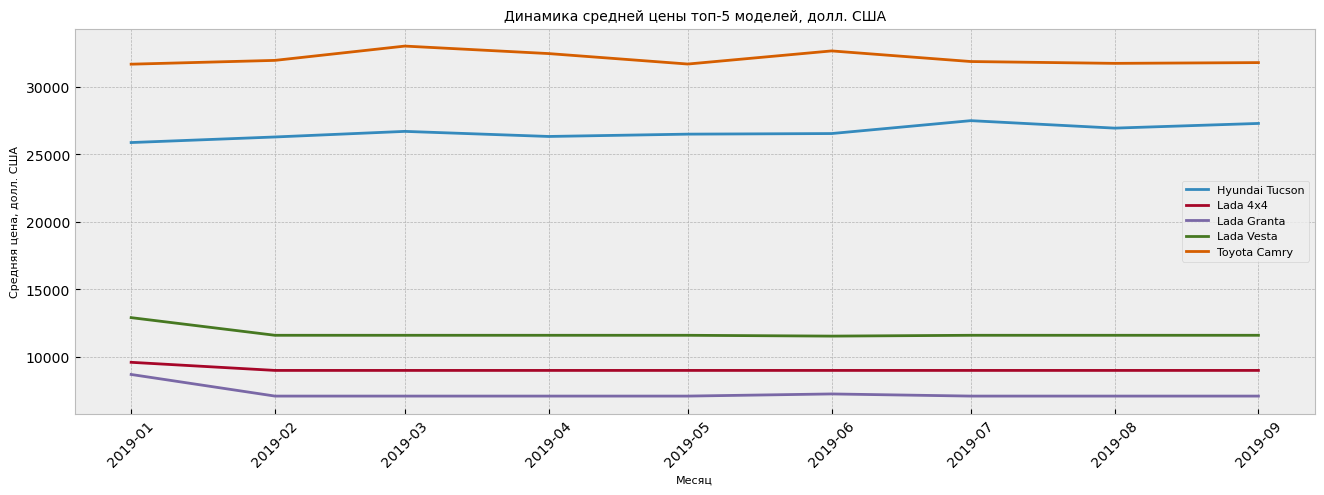

In [129]:
plt.figure(figsize=(16,5))

# объем продаж
ax1 = plt.subplot(1,2,1)
sns.lineplot(top_models_sell.query('brand_model in @top_models_list'), x = 'year_month', y='selling_price', hue='brand_model')
plt.title('Динамика объема продаж топ-5 моделей, млн долл. США', fontsize=10)
plt.xlabel('Месяц', fontsize=8)
plt.ylabel('млн. долл США', fontsize=8)
plt.xticks(rotation=45)
plt.legend(fontsize=8)

# кол-во продаж
ax1 = plt.subplot(1,2,2)
sns.lineplot(top_models_sell.query('brand_model in @top_models_list'), x = 'year_month', y='quant', hue='brand_model')
plt.title('Динамика продаж топ-5 моделей, ед.', fontsize=10)
plt.xlabel('Месяц', fontsize=8)
plt.ylabel('Кол-во ед.', fontsize=8)
plt.xticks(rotation=45)
plt.legend(fontsize=8)
plt.show()

# средняя цена
plt.figure(figsize=(16,5))
sns.lineplot(top_models_sell.query('brand_model in @top_models_list'), x = 'year_month', y='price', hue='brand_model')
plt.title('Динамика средней цены топ-5 моделей, долл. США', fontsize=10)
plt.xlabel('Месяц', fontsize=8)
plt.ylabel('Средняя цена, долл. США', fontsize=8)
plt.xticks(rotation=45)
plt.legend(fontsize=8)
plt.show()

Данная инамика в явном виде иллюстрирует, прямую зависимость объема продаж, количества продаж и средней цены. 

Наиболее продаваемыми автомобилями являются: Toyota Camry, Hyundai Tucson, Lada Vesta, Granta, 4x4. Динамика продаж для каждого автомобиля индивидуальна. Среднемесячные продажи автомобителей Lada примерно 2,5-3,5 млн долл США, что в 3 и 6 раз меньше среднемесячного объема продаж Hyundai Tucson и Toyota Camry соответственно.

Видно, что в топ-5 автомобилей входят авто из совершенно разных ценовых сегментовю 

По количеству проданных автомобилей каждый месяц явный лидер - Toyota Camry,  продажи Lada Granta примерно соответствуют продажам Hyundai в 3-м квартале 2019 года.

Колебание средних цен от месяца к месяцу незначительное. Это может означать то, что на данные модели существует постоянный спрос, соответсвующий предложению, на рынке нет дефицита данных моделей, поставщики-производители обеспечивают рынок необходимым объемом автомобилей. Резкие пики в количестве и объеме продаж могут объясняться тем, что поставка автомобилей осуществляется не штучно, а партиями, между которыми может пройти некоторое время, наприме месяц.

Также видно, что в к июлю продажи Lada Vesta достигли пика, и росли быстрее (темпы роста месяц к месяцу), чем других моделей Lada

In [130]:
top_models_sell.query('brand_model in @top_models_list').groupby('brand_model').agg({'selling_price':'mean', 'quant' :'mean', 'price' : 'mean'})

selling_price  quant    price
brand_model                                  
Hyundai Tucson           9.70 363.44 26653.37
Lada 4x4                 2.48 274.33  9066.67
Lada Granta              2.96 407.11  7295.38
Lada Vesta               3.46 294.78 11738.44
Toyota Camry            17.31 539.22 32086.37

Рассчистаем среднемесячные темпы роста объема продаж автомобилей (аналог CAGR). Окажется, что перечень моделей с высокими темпами роста не входт модели из Топ-5 продаваемых автомомбилей. Наибольший росто продаж у моделей Toyota Highlander и УАЗ 3962 - 56% и 35% соответственно. Всего у 10 моделей средмесячные темпы роста объема продаж выше 20%. *Т.е. продажи данных моделей растут от месяца к месяцу на 20%, или в следующем месяце было продано на 20% больше, чем в предыдущем*

In [131]:
cagr_df = df.query('report_month == "Январь" or report_month == "Сентябрь"').pivot_table(
                    index=['brand', 'model'],columns='report_month', 
                    values='selling_price', aggfunc='sum').reset_index()
cagr_df['cagr'] = 100 * ((cagr_df['Сентябрь'] / cagr_df['Январь']) ** (1/8) - 1)
cagr_df = cagr_df.sort_values(by='cagr', ascending=False)
cagr_df[['brand', 'model', 'cagr']].head(10)

report_month          brand        model  cagr
174                  Toyota   HIGHLANDER 56.31
184                     UAZ         3962 35.08
130           Mercedes-Benz    GLE-Class 28.50
71                    KAMAZ        43118 28.28
31                      GAZ         2752 28.11
76                    KAMAZ        45143 27.79
173                  Toyota      Corolla 26.30
162                 Shacman  SX3258DR384 25.50
121                   Mazda         CX-5 22.63
81                    KAMAZ        65115 20.07

### 3.4.4 Продажи в разрезе субъектов

Как было указано выше 50% всех продаж были совершены в 2-х регионах  - Алматы и Нур-Султан. Рассмотрим продажи автом в разрезе субъектов и сегментов

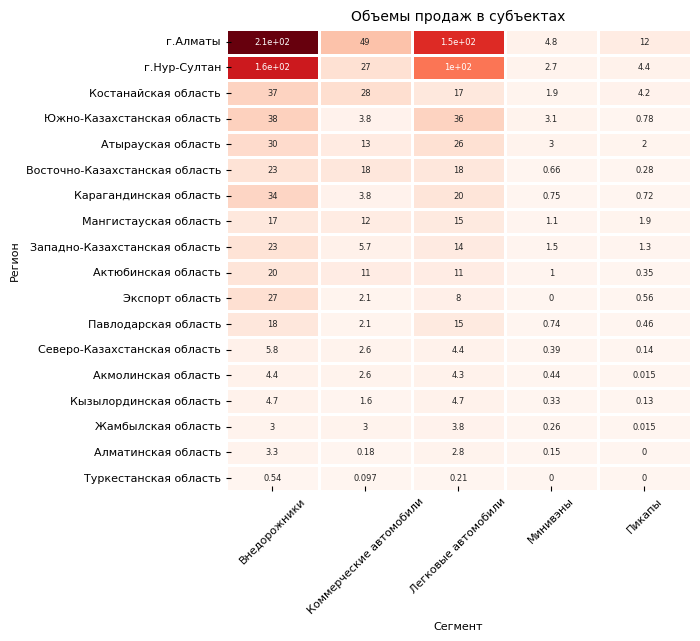

In [132]:
# сформируем сводную 
reg_segment = df.pivot_table(index='region', columns = 'segment_2013', values='selling_price', aggfunc='sum', fill_value=0)
# приведем числовые значения к млн
numeric = reg_segment.select_dtypes(include='number')  # Выбираем только числовые столбцы
reg_segment[numeric.columns] = numeric.divide(1000000)
reg_segment['sum'] = reg_segment.sum(axis=1)
reg_segment = reg_segment.sort_values(by='sum', ascending=False)
reg_segment.drop(['sum'], axis=1, inplace=True)

plt.figure(figsize=(6,6))
sns.heatmap(reg_segment, cmap='Reds',cbar=False, annot=True, linewidth=2, annot_kws={'size': 6})
plt.title('Объемы продаж в субъектах', fontsize=10)
plt.xlabel('Сегмент', fontsize=8)
plt.ylabel('Регион', fontsize=8)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.show()


Как уже отмечалось выше, основные продажи выявлены в 2-х субъектах  - Алматы и Нур-Султан.  В основном - внедорожники и легковые автомомбили. В остальных регионах объем продаж ниже в 3 и более раз. В отдельны субъектах, например, не продаются автомобили отдельных классов.

Так из расперделения ниже видно, что в "столицах" осуществляется около 50%-55% всех продаж внедорожников, легковых автомобилей и пикапов

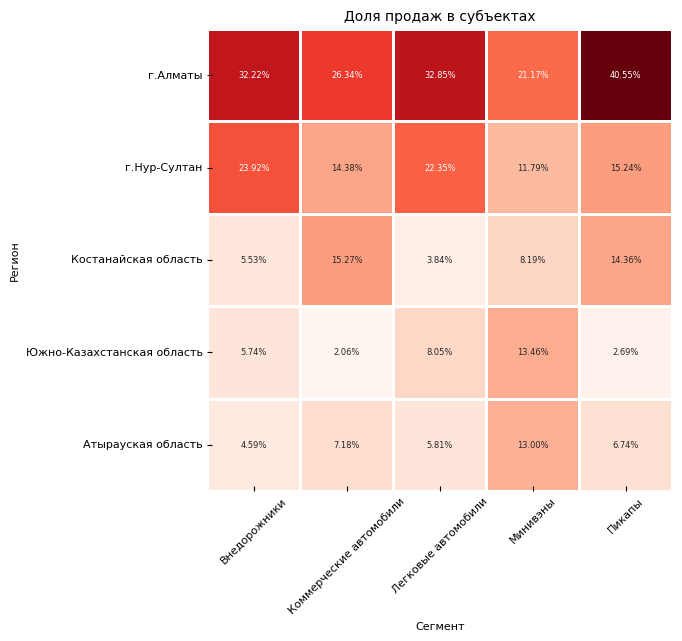

In [133]:
reg_segment_ratio = reg_segment.copy(deep=True)
for i in df['segment_2013'].unique():
    reg_segment_ratio[i] = reg_segment_ratio[i] / reg_segment_ratio[i].sum()

plt.figure(figsize=(6,6))
sns.heatmap(reg_segment_ratio.head(), cmap='Reds',cbar=False, annot=True, linewidth=2, annot_kws={'size': 6}, fmt='.2%')
plt.title('Доля продаж в субъектах', fontsize=10)
plt.xlabel('Сегмент', fontsize=8)
plt.ylabel('Регион', fontsize=8)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Рассмотрим динамику продаж авто в топ-5 субъектах по объему продаж

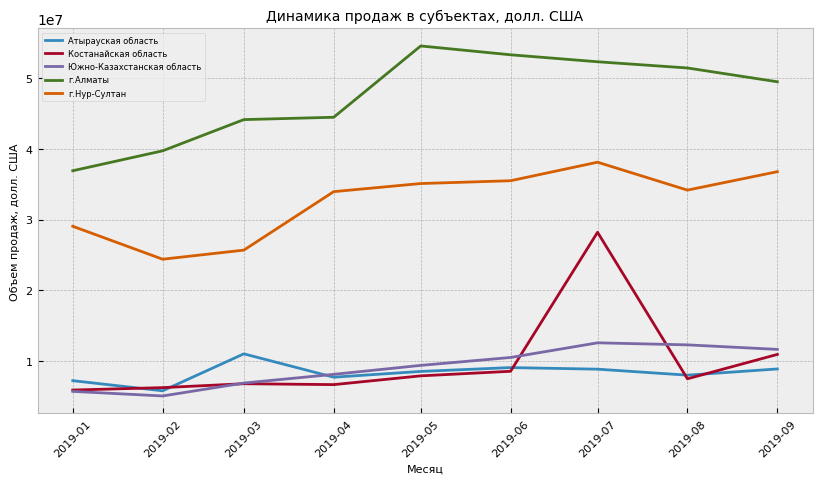

In [134]:
top_5_regs = reg_segment.reset_index()['region'].head().unique()
reg_dynamic = df.query('region in @top_5_regs').groupby(['region', 'year_month']).agg({'selling_price': 'sum'}).reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(reg_dynamic, x='year_month', y='selling_price', hue='region')
plt.title('Динамика продаж в субъектах, долл. США', fontsize=10)
plt.xlabel('Месяц', fontsize=8)
plt.ylabel('Объем продаж, долл. США', fontsize=8)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=6)
plt.show()

В целом динамика равномерна, кроме 1 случая в июле в Костанайской области. Как мы помним из аналиа выше,  резкий всплеск продаж был в основном вызван продажами коммерческого транспорта (автобусов) у диллера Allur Auto.  Проверим.   

In [135]:
df.query('dealer == "Allur Auto" and region == "Костанайская область"').groupby('year_month')['selling_price'].sum().reset_index()

year_month  selling_price
0  2019-01-01      123236.11
1  2019-02-01      151799.39
2  2019-03-01      277811.67
3  2019-04-01      297771.57
4  2019-05-01      291025.46
5  2019-06-01     1133683.03
6  2019-07-01    20358445.80
7  2019-08-01      702654.87
8  2019-09-01     4865422.00

Так и есть, июльский всплеск продаж в Костанайской области - это продажи Allur Auto большой партии автобусов

## 3.5 Емкость рынка

Как уже указывалось выше, за 9 месяцев 2019 года продано 53875 автомобилей на сумму 1,35 млрд долл. США

In [136]:
print('Общая сумма продаж за 9 месяцев 2019 года составляет: {:.2f} млн долл. США'.format(df.selling_price.sum()/1000000))

Общая сумма продаж за 9 месяцев 2019 года составляет: 1349.19 млн долл. США


In [137]:
print(f'Количество проданных автомобилей за 9 месяцев 2019 года: {int(df.quant.sum())} шт.')

Количество проданных автомобилей за 9 месяцев 2019 года: 53875 шт.


Попробуем оценить общие продажи за весь год (емкость рынка). По [данным](https://stat.gov.kz/ru/industries/business-statistics/stat-transport/spreadsheets/?year=2019&name=63479&period=&type=) государственной статистики РК:

- *По состоянию на 1 января 2020г. в Республике Казахстан количество зарегистрированных легковых автомобилей составило 3776,9 тыс. единиц. За январь-декабрь 2019г. было зарегистрировано 871,1 тыс. единиц легковых автомобилей, что больше на 12,3% к соответствующему периоду прошлого года.*

- *По состоянию на 1 октября 2019г. в Республике Казахстан количество зарегистрированных легковых автомобилей составило 3709,6 тыс. единиц. За январь-сентябрь 2019г. было зарегистрировано 646,7 тыс. единиц легковых автомобилей, что меньше на 7,2% к соответствующему периоду прошлого года.*

Регистрация и покупка это не одно и тоже, но предположим, что между кол-вом зарегистрированных авто в любой момент времени и кол-вом проданных авто существует очень сильная корреляция. Поэтому для расчета общего кол-ва проданных автомобилей в 2019 году воспользуемся свойством пропорции.

Расчет показывает, что прогнозное значение кол-ва проданных автомобилей за весь 2019 год составляет **72 569 ед.**, т.о. за 4 квартал 2019 года рынок мог вырасти на **34,7%** относительно сентября, общая доля продаж в 4-м квартале от вссех продаж в 2019 году моглас составить **25,8%**. Расчет значений представлен ниже.


**Справочно**: по данным той же статистики, общее кол-во автомобилей в РК за 2019 год уменьшилось с 3 847 981 до 3 776 893 ед.

In [138]:
jan_sep_quant = int(df.quant.sum())
jan_sep_off_quant = 646700
full_off_quant = 871100
jan_sep_sell = df.selling_price.sum()/1000000


full_quant = jan_sep_quant * full_off_quant / jan_sep_off_quant

print(f'Расчетное кол-во проданных автомобилей за 2019 год: {int(full_quant)} шт.')
print('Рост рынка: {:.2%}'.format((full_quant - jan_sep_quant) / jan_sep_quant))
print('Доля 4-го квартала относительно всего года: {:.2%}'.format((full_quant - jan_sep_quant) / full_quant))

Расчетное кол-во проданных автомобилей за 2019 год: 72569 шт.
Рост рынка: 34.70%
Доля 4-го квартала относительно всего года: 25.76%


Объем рынка можно рассчитать 2-мя способами:
- с помощью пропорции 
- с помощью средней цены 

Расчет показывает, что объем рынка в 2019 году составляет **1 817 млн долл. США** в соответствии с расчетом 1-м способом и **1 877 млн долл. США** в соответствии с расчетом вторым способом. Различие в оценке составляет **59.95 млн долл. США** или 3,3% от расчетного значения. На эту разницу можно купить примерно 2122 автомобиля.

In [139]:
jan_sep_sell = df.selling_price.sum()
jan_sep_mean_price = df.price.mean()

full_sell_1 = jan_sep_sell * full_quant / jan_sep_quant
full_sell_2 = jan_sep_sell + (full_quant - jan_sep_quant) * jan_sep_mean_price

print('Расчет с помощью пропорции:')
print('Расчетное значение объема продаж в 2019 году: {:.2f} млн долл. США'.format(full_sell_1/1000000))
print('='*20)
print('Расчет с помощью среднего:')
print('Расчетное значение объема продаж в 2019 году: {:.2f} млн долл. США'.format(full_sell_2/1000000))
print('='*20)
print('Разница в оценке: {:.2f} млн долл. США'.format((full_sell_2 - full_sell_1) / 1000000), \
      'или {:.2%}'.format((full_sell_2 - full_sell_1)/full_sell_1))
print('='*20)
print('На эту разницу можно купить {:.0f}  новых авто'.format(int((full_sell_2 - full_sell_1)/jan_sep_mean_price)))

Расчет с помощью пропорции:
Расчетное значение объема продаж в 2019 году: 1817.35 млн долл. США
Расчет с помощью среднего:
Расчетное значение объема продаж в 2019 году: 1877.31 млн долл. США
Разница в оценке: 59.95 млн долл. США или 3.30%
На эту разницу можно купить 2122  новых авто


In [140]:
k_sell = full_sell_2/jan_sep_sell
k_quant = full_quant / jan_sep_quant
print('Коэффициент для расчета объема рынка в долл. США за год : {:.3f}'.format(k_sell))
print('Коэффициент для расчета объема рынка в ед. за год : {:.3f}'.format(k_quant))

Коэффициент для расчета объема рынка в долл. США за год : 1.391
Коэффициент для расчета объема рынка в ед. за год : 1.347


## 3.6 Проверка гипотез

Проверим, как связаны между собой продажи по субъектам и средняя заработная плата. Для сравнения заказчиком предоставлены данные о средней зарплате в субъектах. Данные также размещены на официальных ресурсах [1](https://www.zakon.kz/finansy/4993404-srednemesyachnaya-zarabotnaya-plata-za.html), [2](https://taldau.stat.gov.kz/ru/NewIndex/GetIndex/19786379?keyword=), [3](https://stat.gov.kz/ru/industries/labor-and-income/stat-wags/publications/57024/)

Т.к. мы уже расчитали емкость рынка, то смело можем умножить значения общих продаж и кол-ва автомобилей на 1,39 и 1,34 соответственно.

Данные о зарплатах представлены в тенге, но для расчета индекса корреляции перевод в долл. США по курсу на 2019 год не требуется.

In [141]:
# средние зарплаты
salary_dict = {'г.Алматы': 224158, 
                'г.Нур-Султан': 226796, 
                'Восточно-Казахстанская область': 162182,
                'Западно-Казахстанская область': 183914, 
                'Костанайская область': 145890,
                'Павлодарская область': 160670, 
                'Южно-Казахстанская область': 110254,
                'Мангистауская область': 294099, 
                'Атырауская область': 351103,
                'Актюбинская область': 156595, 
                'Карагандинская область': 172239,
                'Северо-Казахстанская область': 130233, 
                'Акмолинская область': 140272,
                'Кызылординская область': 152085, 
                'Жамбылская область': 127043,
                'Туркестанская область': 123853, 
                'Алматинская область': 136212
}

# преобразуем в датафрейм
salary = pd.DataFrame(list(salary_dict.items()), columns=['region', 'salary'])
# сформируем датасет с количественными характеристиками 
df_salary = df.groupby('region').agg({'selling_price' : 'sum', 'quant' : 'sum', 'price':'mean'}).reset_index()
# удалим строку "экспорт"
df_salary = df_salary.drop(14)
# объединим датафреймы
df_salary = df_salary.merge(salary, on='region', how='left')
# дополнительные вычисления
df_salary['selling_price'] = (full_sell_2/jan_sep_sell) * df_salary['selling_price']
df_salary['quant'] = (full_quant/jan_sep_quant) * df_salary['quant']
# сформируем данные для тепловой карты
corr_df = df_salary.corr() #.drop(['selling_price', 'quant', 'price'], axis=1, inplace=True)
corr_df.drop(['selling_price', 'quant', 'price'], axis=1, inplace=True)

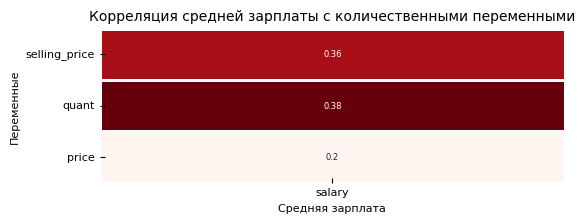

In [142]:
plt.figure(figsize=(6,2))
sns.heatmap(corr_df[0:3], cmap='Reds',cbar=False, annot=True, linewidth=2, annot_kws={'size': 6})
plt.title('Корреляция средней зарплаты с количественными переменными', fontsize=10)
plt.xlabel('Средняя зарплата', fontsize=8)
plt.ylabel('Переменные', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Т.о особой взаимосвязи между значениями общих продаж, кол-вом проданных авто, средней ценой практически нет, о чем свидетельствует низкий коэффициент корреляции.

Возможно, если рассмотреть корреляции с учетом населения, то картина изменится. Воспользуемся теми же источниками, для получения данных о населении в субъектах, составим словарь и проделаем аналогичную предыдущему расчету процедуру

In [143]:
population_dict = {'г.Алматы': 2222782, 
                'г.Нур-Султан': 1423726, 
                'Восточно-Казахстанская область': 727316,
                'Западно-Казахстанская область': 692919, 
                'Костанайская область': 830289,
                'Павлодарская область': 754369, 
                'Южно-Казахстанская область' : 2016000,
                'Мангистауская область': 785529, 
                'Атырауская область': 703180,
                'Актюбинская область': 156595, 
                'Карагандинская область': 1135523,
                'Северо-Казахстанская область': 530678, 
                'Акмолинская область': 788178,
                'Кызылординская область': 841396, 
                'Жамбылская область': 1222562,
                'Туркестанская область': 2140926, 
                'Алматинская область': 1529283}


# преобразуем в датафрейм
population = pd.DataFrame(list(population_dict.items()), columns=['region', 'population'])

df_salary = df_salary.merge(population, on='region', how='left')


Добавим столбец с расчетом общего дохода за год. Такми образом мы поймем, есть ли связь между общим объемом рынка в субъекте, кол-вом проданных авто, средней ценой и "общим кол-вом денег" у населения

In [144]:
df_salary['gross'] = df_salary['salary'] * df_salary['population'] *12

In [145]:
corr_df = df_salary.corr()
corr_df.drop(['selling_price', 'quant', 'price', 'salary', 'population'], axis=1, inplace=True)

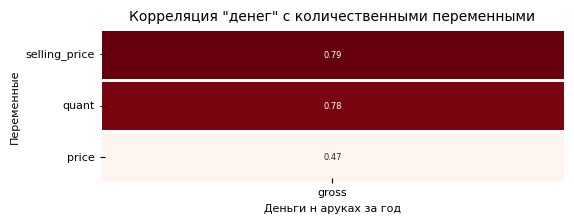

In [146]:
plt.figure(figsize=(6,2))
sns.heatmap(corr_df[0:3], cmap='Reds',cbar=False, annot=True, linewidth=2, annot_kws={'size': 6})
plt.title('Корреляция "денег" с количественными переменными', fontsize=10)
plt.xlabel('Деньги н аруках за год', fontsize=8)
plt.ylabel('Переменные', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Получили совершенно иную картину. Коэффициент корреляции межу общими продажами в субъекте и "объемом денег у населения" равен 0,79, что говорит о сильной корреляции. **Т.о. между продажами в субъекте и доходом населения есть некая прямая взаимосвязь** 

## 3.7 Вывод

coming soon

# 4 Анализ положения Меркур Авто

Рассмотрим отдельно положение на рынке компании Меркур Авто. Повторим некоторые подходы, примененные в п.3

In [147]:
# выделим отдельный датасет
mercur = df.query('dealer == "Mercur Auto"')

In [148]:
print('Общая сумма продаж за 9 месяцев 2019 года составляет: {:.2f} млн долл. США'.format(mercur.selling_price.sum()/1000000))

Общая сумма продаж за 9 месяцев 2019 года составляет: 19.36 млн долл. США


In [149]:
print(f'Количество проданных автомобилей за 9 месяцев 2019 года: {int(mercur.quant.sum())} шт.')

Количество проданных автомобилей за 9 месяцев 2019 года: 650 шт.


In [150]:
print('Доля рынка компании {:.2%}'.format(mercur.selling_price.sum()/df.selling_price.sum()))

Доля рынка компании 1.43%


## 4.1 Продажи в различных разрезах

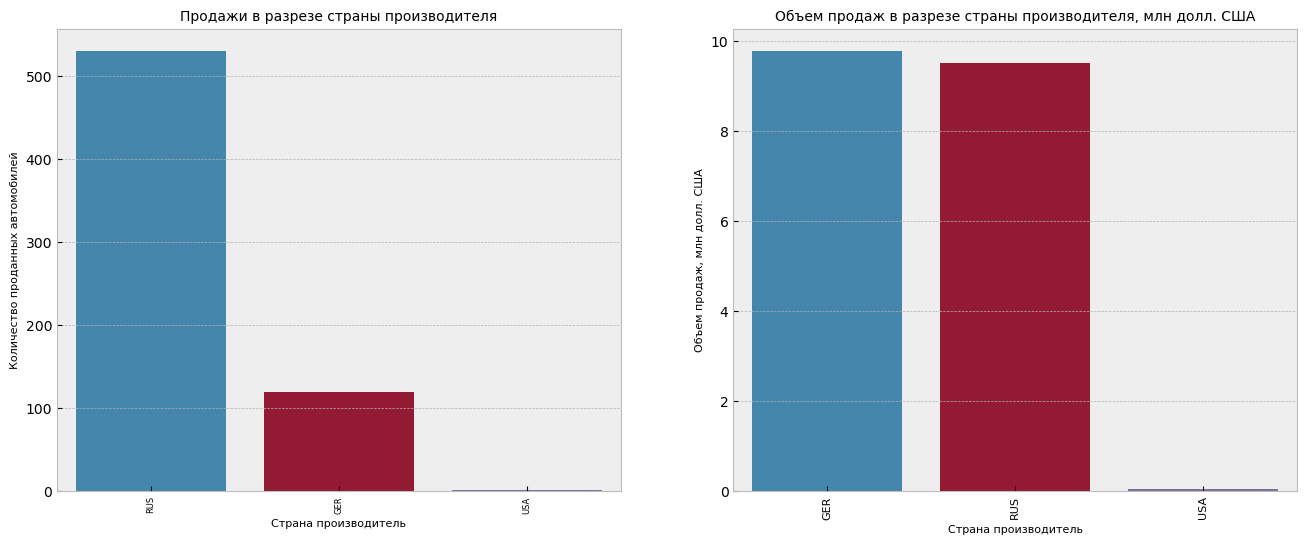

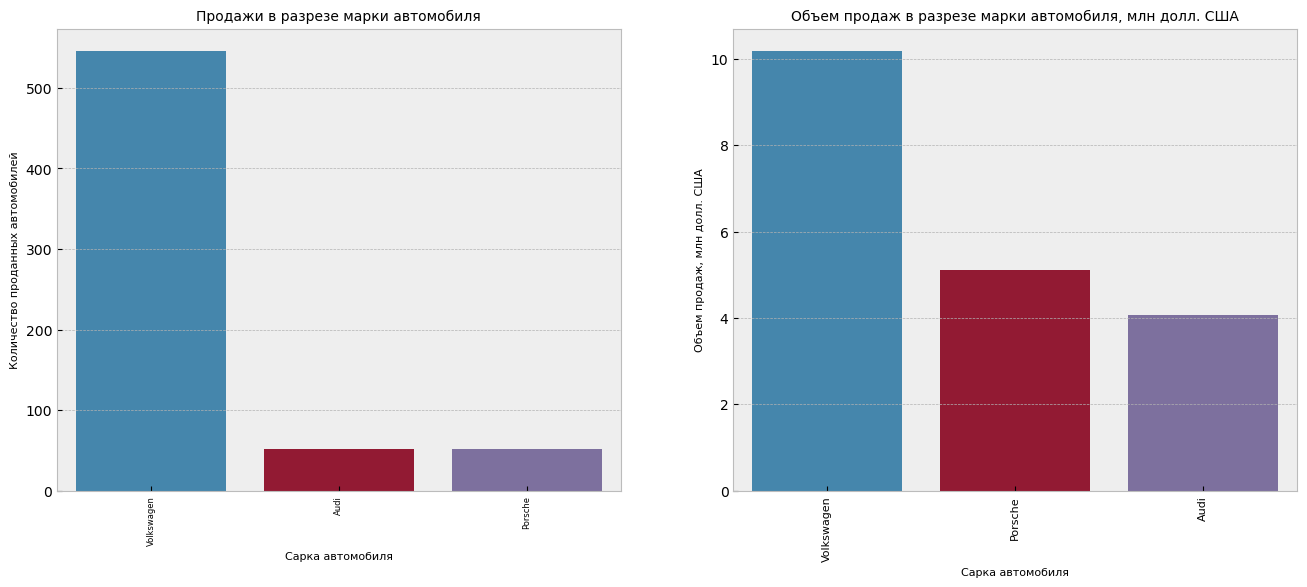

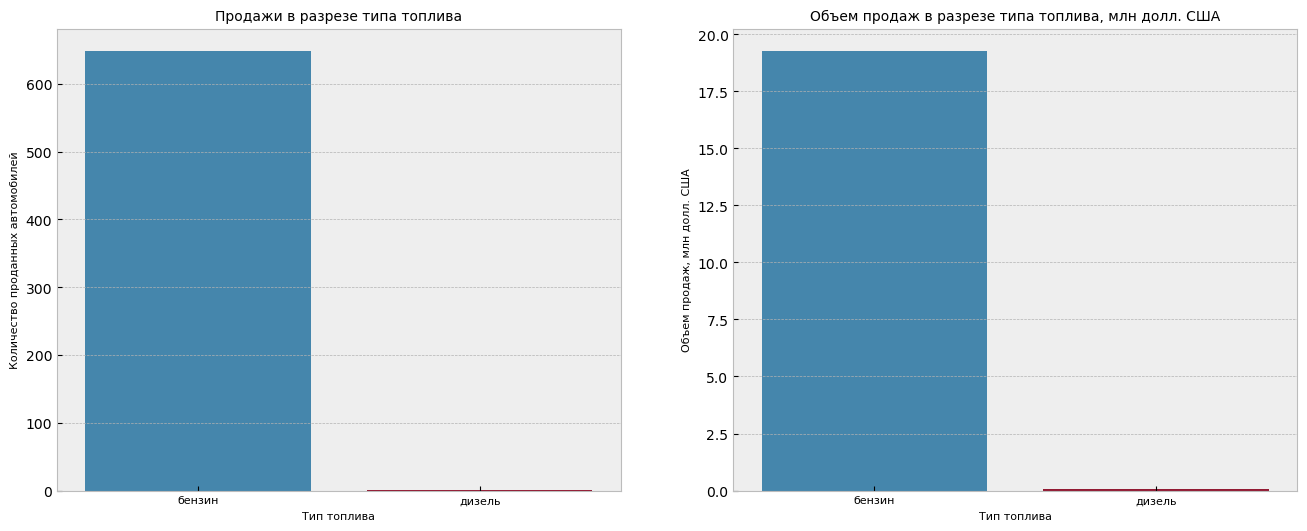

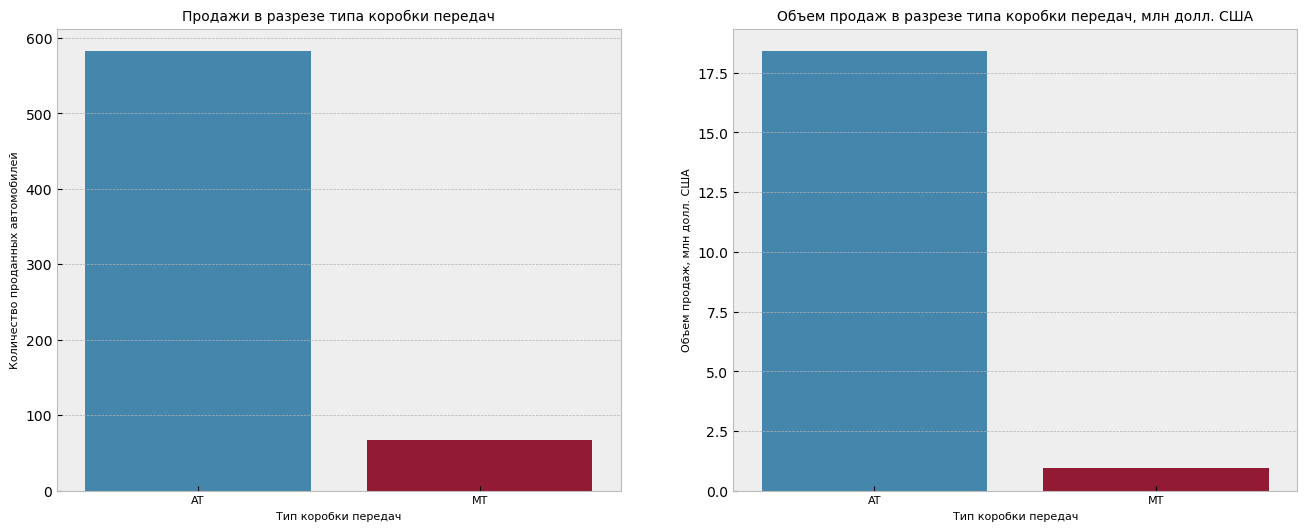

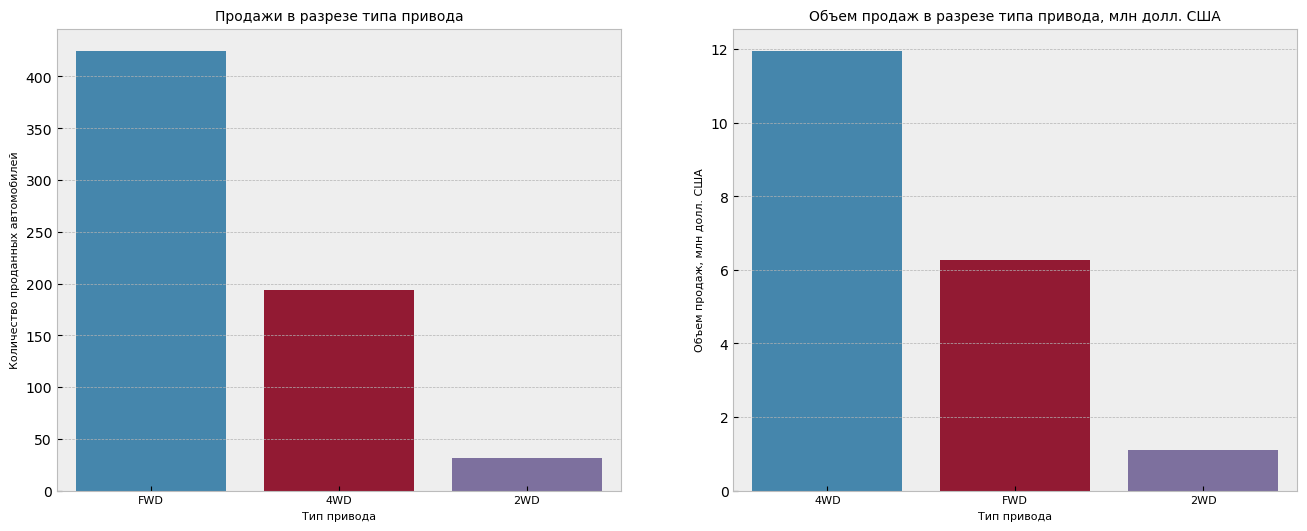

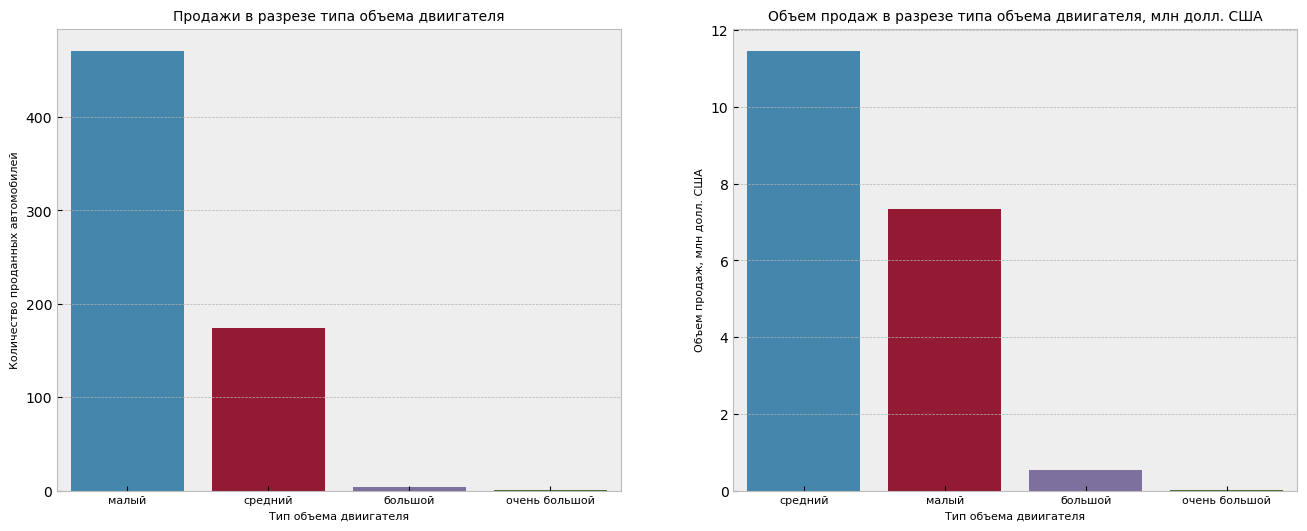

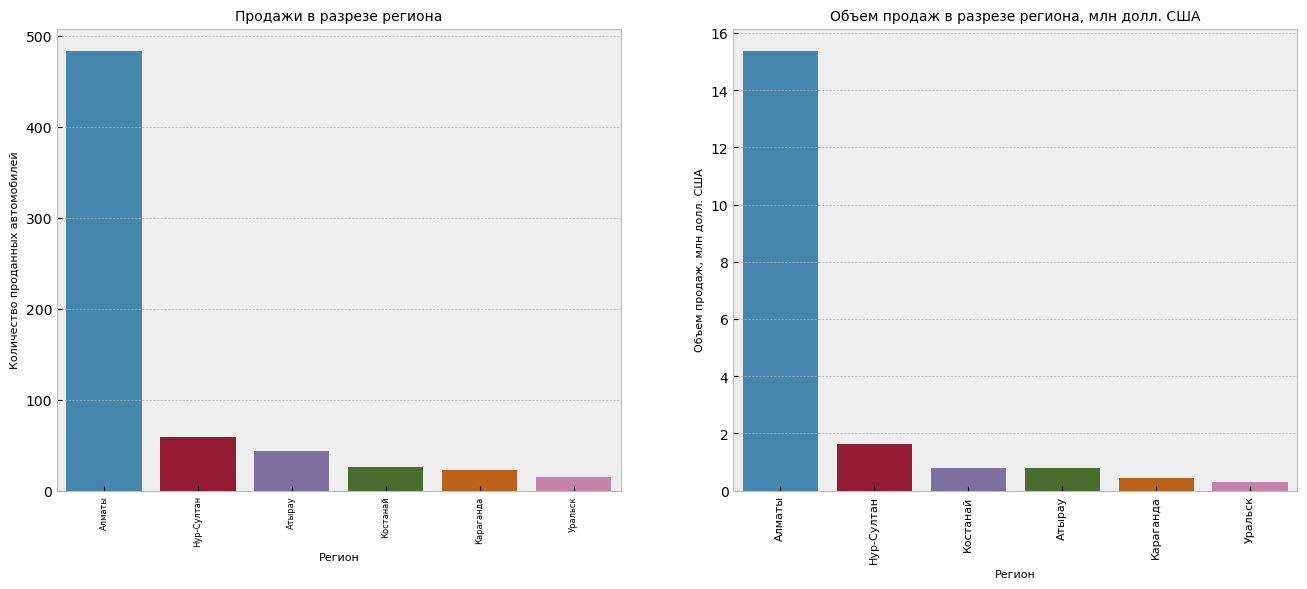

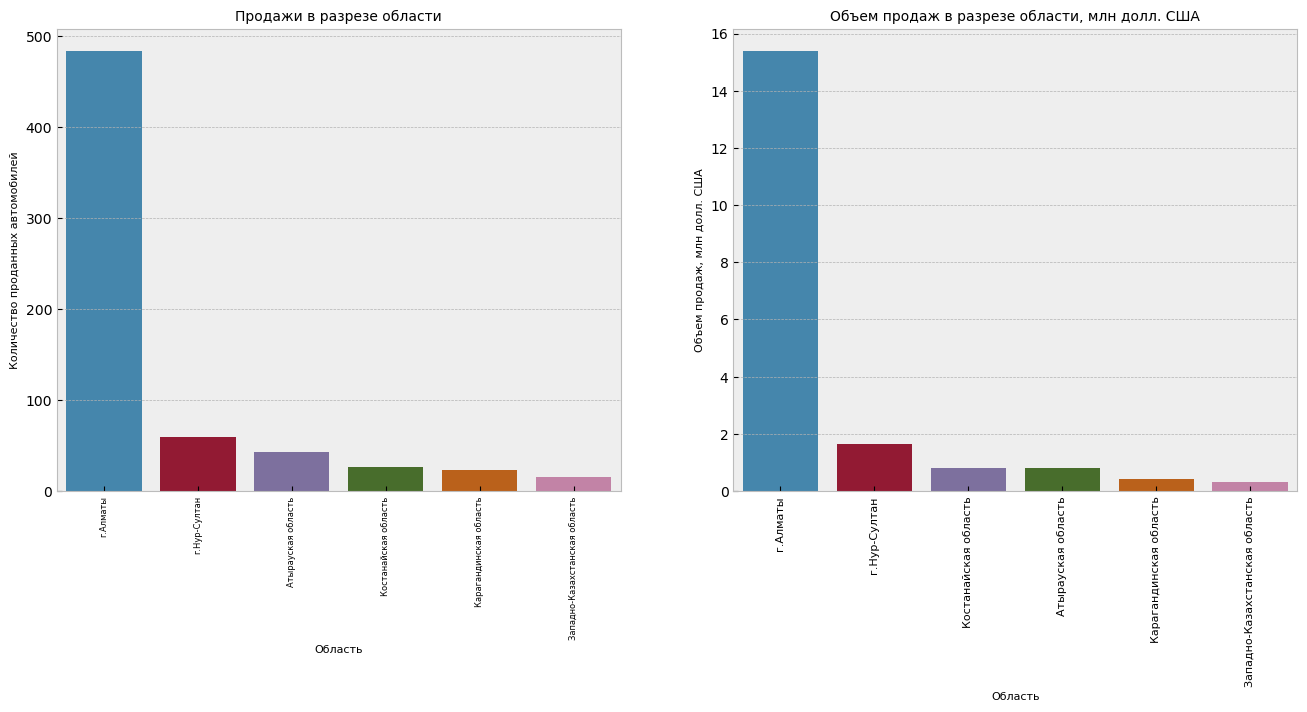

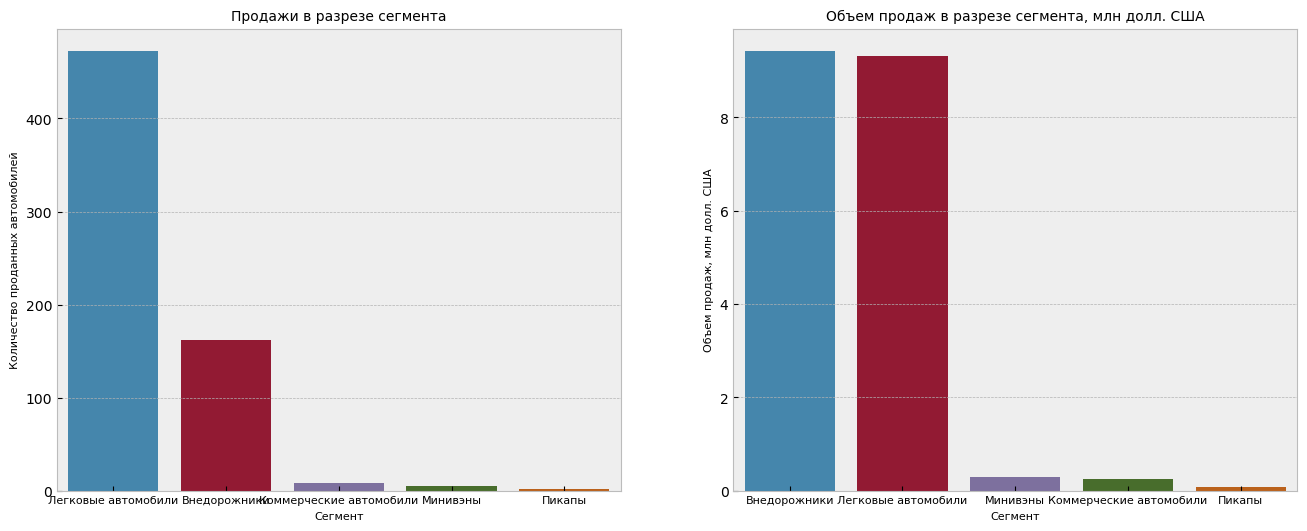

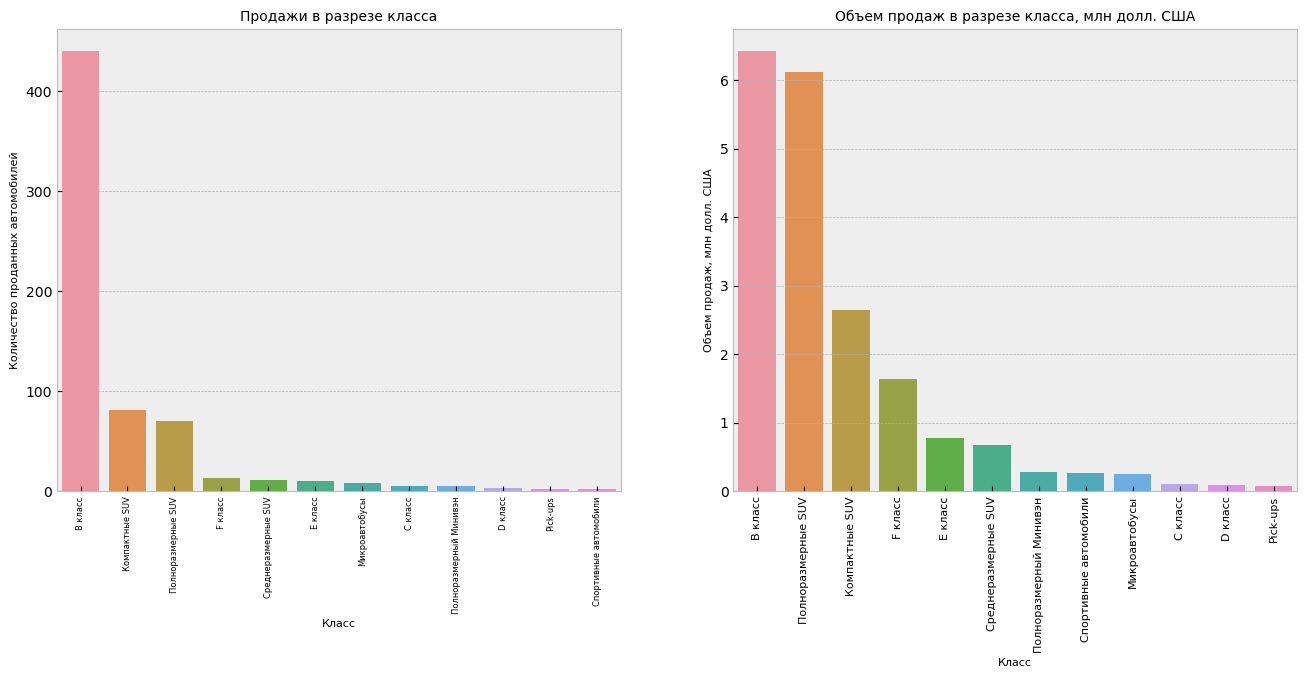

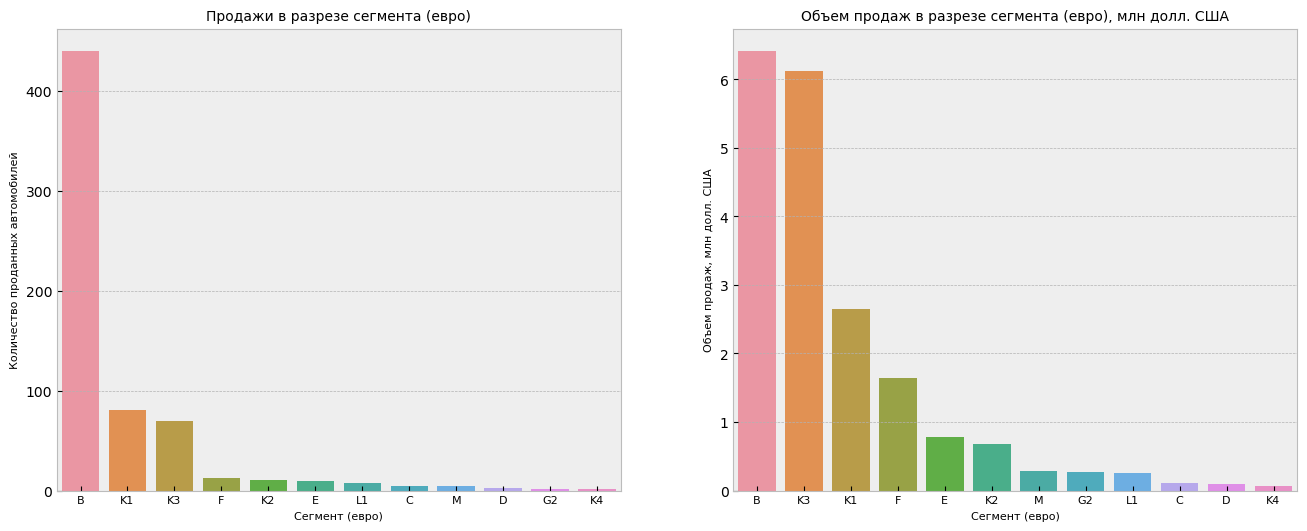

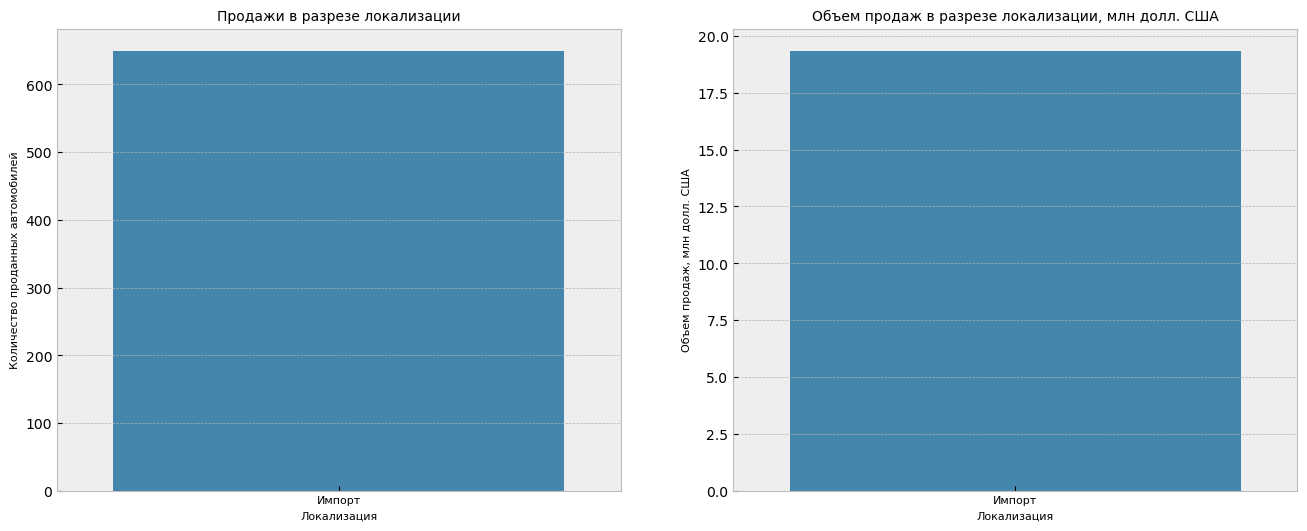

In [151]:
# циклом отобразим 13 диаграм
for i,j,k in zip(category[1:], category_names_1[1:], category_names_2[1:]): # проитерируем по 3-м спискам
    #сформируем сводные таблицы для каждого разреза
    data_cnt = mercur.groupby(i)['quant'].sum().reset_index().sort_values(by='quant', ascending=False) 
    data_price = mercur.groupby(i)['selling_price'].sum().reset_index().sort_values(by='selling_price', ascending=False)
    data_price['selling_price'] = data_price['selling_price']/1000000
    # отрисовка графиков
    
    plt.figure(figsize=(16,6))
    
    ax1 = plt.subplot(1, 2, 1)
    sns.barplot(data_cnt, x=i, y='quant')
    plt.title(f'Продажи в разрезе {k}', fontsize=10)
    plt.ylabel('Количество проданных автомобилей', fontsize=8)
    plt.xlabel(f'{j}', fontsize=8)
    if len(df[i].unique()) <= 6 or i=='segment_eng': # подбор ориентации подписей оси
        plt.xticks(fontsize=8)
    else:
        plt.xticks(rotation=90, fontsize=6)
        
        
    ax2 = plt.subplot(1, 2, 2)
    sns.barplot(data_price, x=i, y='selling_price')
    plt.title(f'Объем продаж в разрезе {k}, млн долл. США', fontsize=10)
    plt.ylabel('Объем продаж, млн долл. США', fontsize=8)
    plt.xlabel(f'{j}', fontsize=8)
    if len(df[i].unique()) <= 6 or i=='segment_eng':
        plt.xticks(fontsize=8)
    else:
        plt.xticks(rotation=90, fontsize=8)   
    
    plt.show()

1) В основном компания продает автомобили из российского и немецкого производста (100% импорт). Количество проданных автомобилей российского производства примерно в 5 раз больше, чем немецкого, при этом в денежном эквиваленте объем проданных авто из двух стран примерно одинаковый - примерно 9-10 млн. Однако, компания занимается продажами всего 3-х брендов - Фольксваген, Ауди и Порше, которые производит один концерн Volkswagen AG. Т.е. можно утверждать, что компания продает автомобили немецкого производства, произведенные на территории Германии и произведенные  на территории России с частичной локализацией.
2) В основном продажи компании строятся на полноприводных и перенеприводных бензиновых автомобилях с автоматической коробкой передач, имеющх малых или средний объем двигателя - автомобили класса В, универсалы и внедорожники
3) Основной канал продаж - диллерская сеть в г. Алматы


## 4.2 Динамика продаж

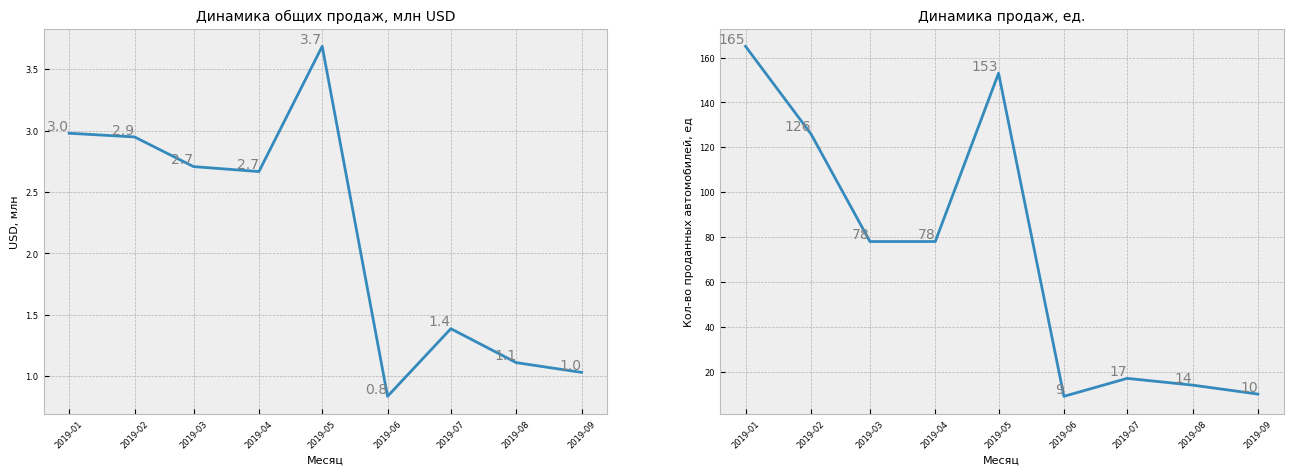

In [152]:
data_price = mercur.groupby('year_month')['selling_price'].sum().reset_index()
data_price['selling_price'] = data_price['selling_price'] / 1000000
data_cnt = mercur.groupby('year_month')['quant'].sum().reset_index()

plt.figure(figsize=(16,5))
ax1 = plt.subplot(1, 2, 1)
sns.lineplot(data_price, x='year_month', y='selling_price', markers=True)

for i, j in zip(data_price['year_month'], data_price['selling_price']):
    t = plt.text(i, j, round(j,1),
                 horizontalalignment='right',
                 rotation='horizontal',
                 verticalalignment='bottom',
                 fontdict={'color':'grey'})

plt.title('Динамика общих продаж, млн USD', fontsize=10)
plt.xlabel('Месяц', fontsize=8)
plt.ylabel('USD, млн', fontsize=8)
plt.xticks(rotation=45, fontsize=6)
plt.yticks(fontsize=6)

ax2 = plt.subplot(1, 2, 2)
sns.lineplot(data_cnt, x='year_month', y='quant', markers=True)

for i, j in zip(data_cnt['year_month'], data_cnt['quant']):
    t = plt.text(i, j, int(j),
                 horizontalalignment='right',
                 rotation='horizontal',
                 verticalalignment='bottom',
                 fontdict={'color':'grey'})

plt.title('Динамика продаж, ед.', fontsize=10)
plt.xlabel('Месяц', fontsize=8)
plt.ylabel('Кол-во проданных автомобилей, ед', fontsize=8)
plt.xticks(rotation=45, fontsize=6)
plt.yticks(fontsize=6)

plt.show()

Динамика продаж компании совершенно не соответсвует общей динамике рынка. Т.к. в марте и июне 2019 года наблюдаются резкий спад продаж, с выходом на плато в районе 10-20 проданных автомобилей в месяц (или 0,8-1,4 млн долл. США). Единственный "хороший месяц у компании - май 2019 г, кога было продано автомобиленй на сумму 3,7 млн долл. США. Второй по успешности месяц - январь - 165 автомобилей за 3 млн долл. США

### 4.1.3 Динамика продаж в разрезе тех. характеристик

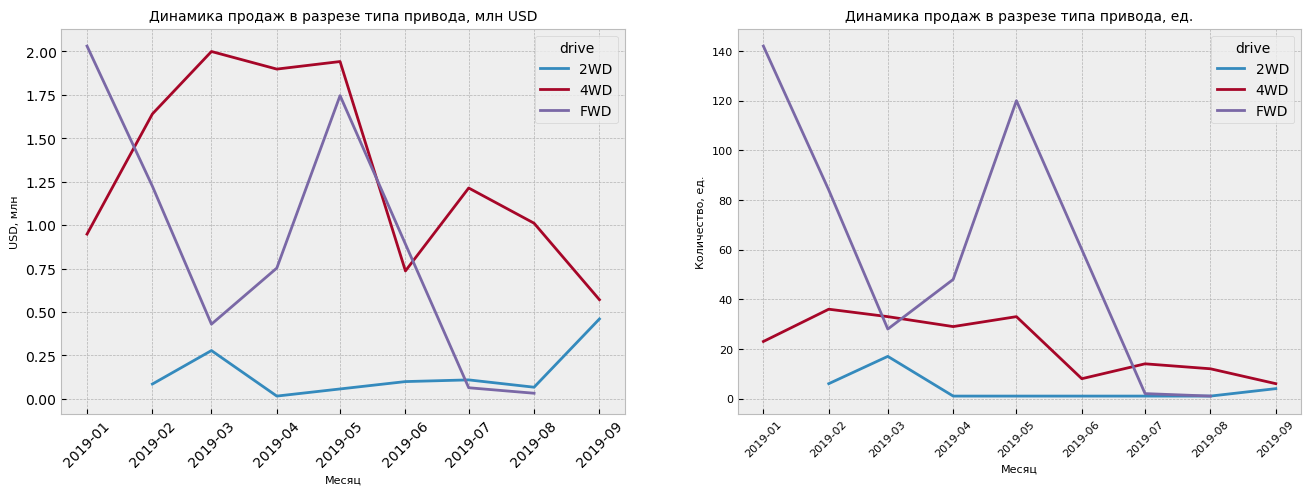

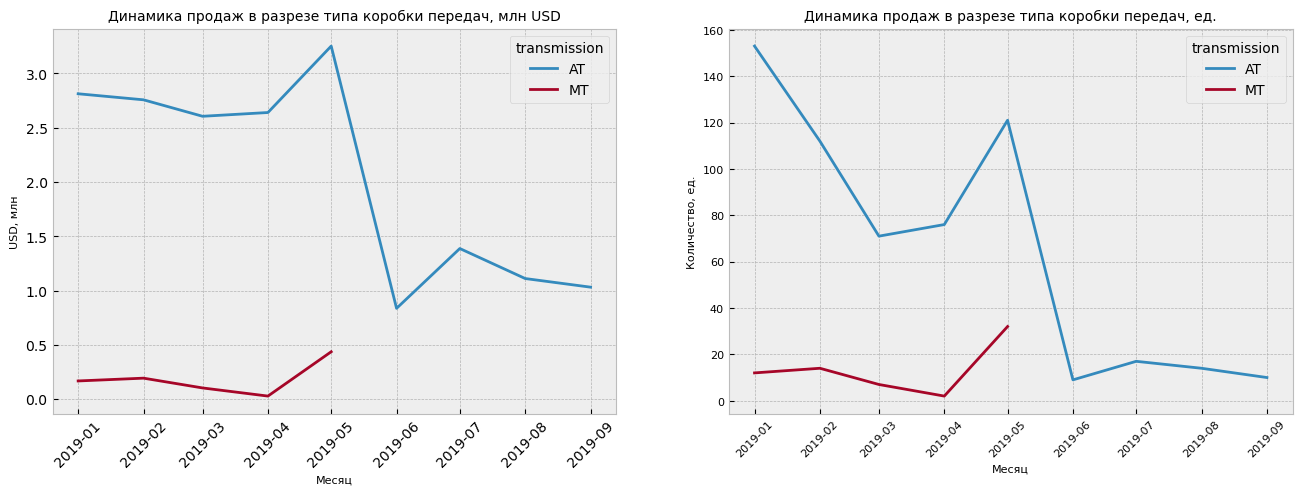

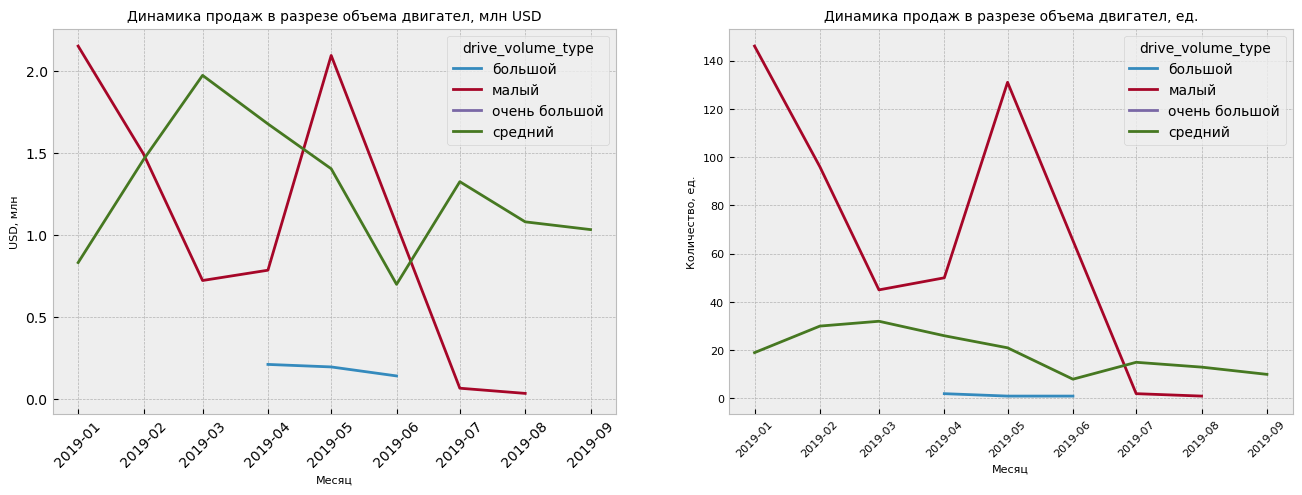

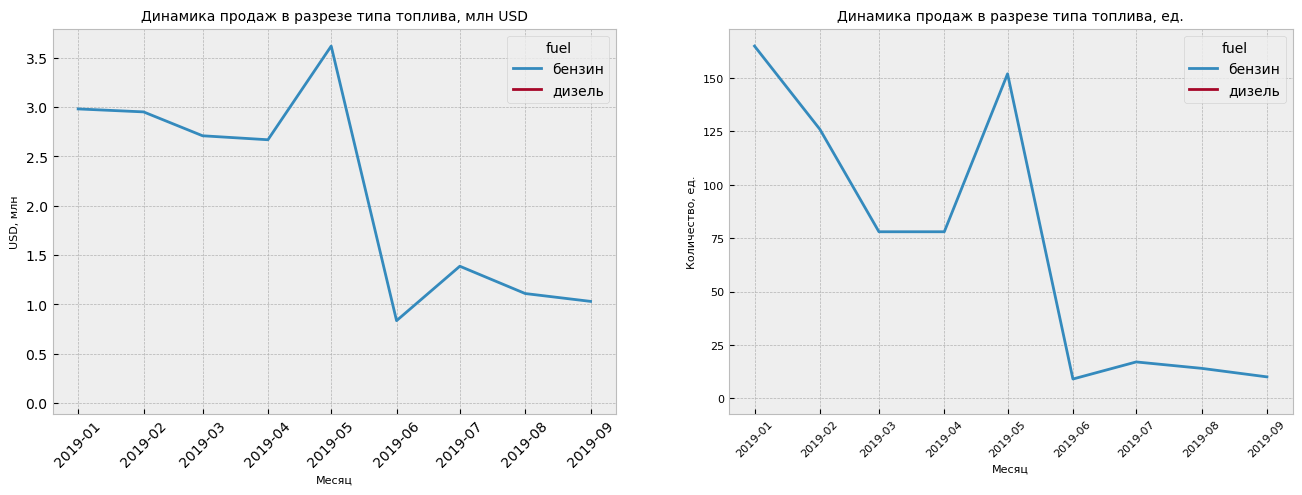

In [153]:
for i,j in zip(tech_category, tech_category_2):
    data_price = mercur.groupby([i,'year_month'])['selling_price'].sum().reset_index()
    data_price['selling_price'] = data_price['selling_price'] / 1000000
    data_cnt = mercur.groupby([i,'year_month'])['quant'].sum().reset_index()
    
    plt.figure(figsize=(16,5))
    ax1 = plt.subplot(1, 2, 1)
   
    sns.lineplot(data_price, x='year_month', y='selling_price', hue=i)
    plt.title(f'Динамика продаж в разрезе {j}, млн USD', fontsize=10)
    plt.xlabel('Месяц', fontsize=8)
    plt.ylabel('USD, млн', fontsize=8)
    plt.xticks(rotation=45)
    
    ax2 = plt.subplot(1, 2, 2)
    sns.lineplot(data_cnt, x='year_month', y='quant', hue=i)
    plt.title(f'Динамика продаж в разрезе {j}, ед.', fontsize=10)
    plt.xlabel('Месяц', fontsize=8 )
    plt.ylabel('Количество, ед.', fontsize=8)
    plt.xticks(fontsize=8, rotation=45)
    plt.yticks(fontsize=8)
    
    plt.show()

В целом динамика продаж компании в разрезе тех характеристик  соответсвует общей динамике. Пролемы в бизнесе после мая 2019 года. С чем это может быть связано? Рассмотрим динамику продаж в разрезе брендов.

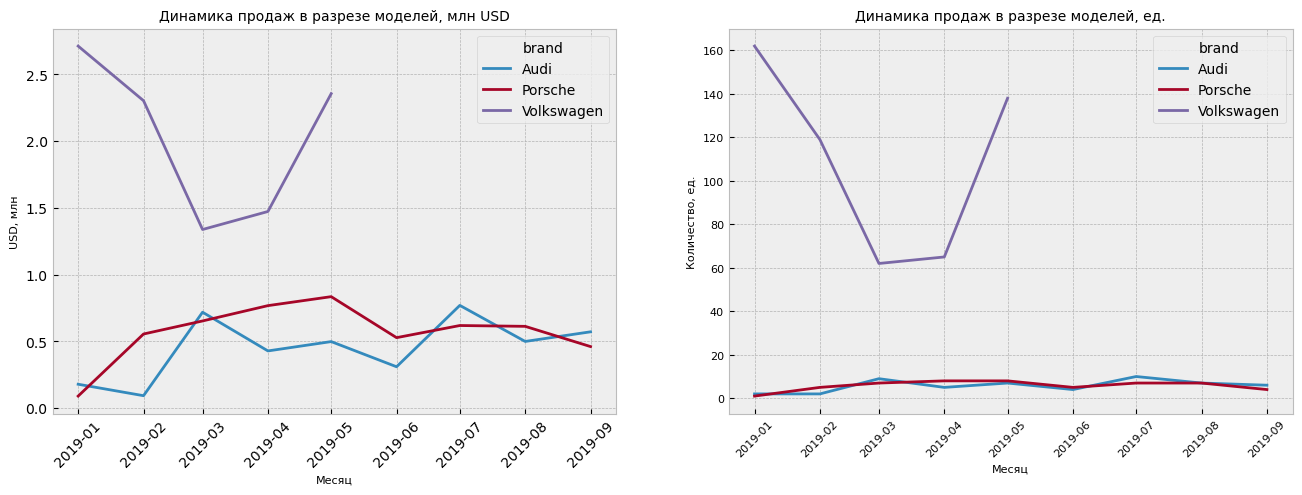

In [154]:
data_price = mercur.groupby(['brand','year_month'])['selling_price'].sum().reset_index()
data_price['selling_price'] = data_price['selling_price'] / 1000000
data_cnt = mercur.groupby(['brand','year_month'])['quant'].sum().reset_index()
    
plt.figure(figsize=(16,5))
ax1 = plt.subplot(1, 2, 1)
   
sns.lineplot(data_price, x='year_month', y='selling_price', hue='brand')
plt.title(f'Динамика продаж в разрезе моделей, млн USD', fontsize=10)
plt.xlabel('Месяц', fontsize=8)
plt.ylabel('USD, млн', fontsize=8)
plt.xticks(rotation=45)
    
ax2 = plt.subplot(1, 2, 2)
sns.lineplot(data_cnt, x='year_month', y='quant', hue='brand')
plt.title(f'Динамика продаж в разрезе моделей, ед.', fontsize=10)
plt.xlabel('Месяц', fontsize=8 )
plt.ylabel('Количество, ед.', fontsize=8)
plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=8)
plt.show()

В целом по графикам видно, что у компании исчезли из продажи автомобили марки Фольксваген в мае 2019 года (самый дешевый сегмент автомомибилей у диллера, см график ниже). Возможно компания перестала быть официальным диллером концерна VAG и распродавала остатки автомобилей. При этом особой динамики на повышение средней цены на автомобилей не наблюдается (нет боьшого дисконта или завышения цен для максимизации прибыли). Единственное, что в августе-сентябре произошел рост цен на автомобили Ауиди и Порше.

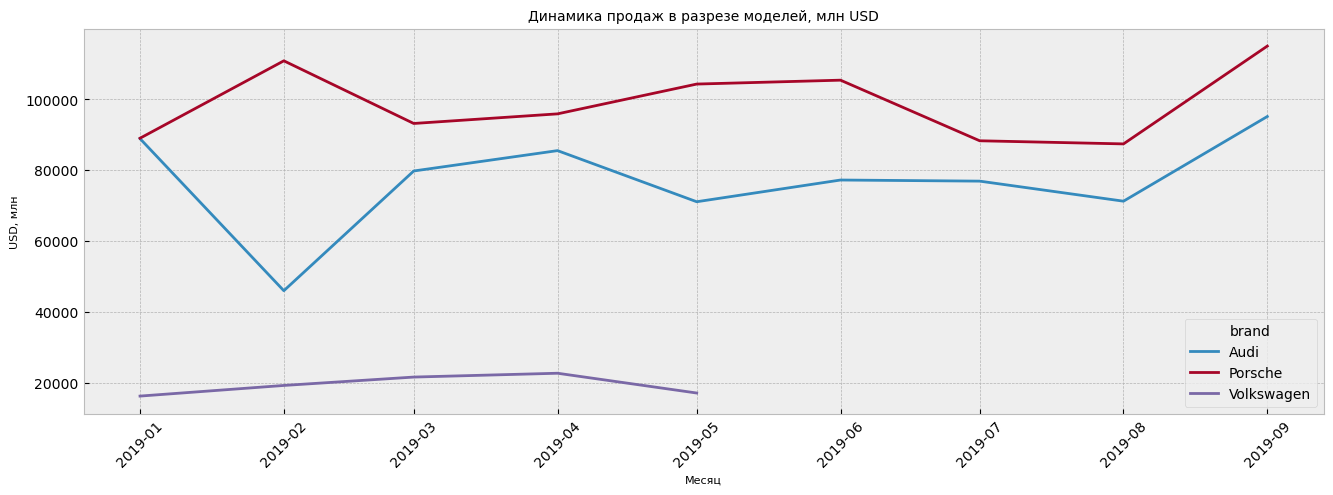

In [155]:
data_mean = mercur.groupby(['brand','year_month'])['price'].mean().reset_index()
plt.figure(figsize=(16,5))
sns.lineplot(data_mean, x='year_month', y='price', hue='brand')
plt.title(f'Динамика продаж в разрезе моделей, млн USD', fontsize=10)
plt.xlabel('Месяц', fontsize=8)
plt.ylabel('USD, млн', fontsize=8)
plt.xticks(rotation=45)
plt.show()

## 4.3 Конкуренты

Основным конкурентом Меркур Авто с точки зрения продажи аналогичных марок автомобилей можно назвать - Volkswagen Group Rus, который продал в 2019 году 664 ед. автомобилей Фольксваген, остальные 3 компании продали менее 53 ед. автомобилей данной марки (Eurasia Motor Zhaik, Автодом Motors KST, Автомир-Центр).

При этом на рынке Казахстана Меркур Авто в 2019 году имел "монополию" на продажи марок Ауди и Порше, т.к. ни один диллер больше не продавал такие автомобили.

In [156]:
brand_list = ['Volkswagen', 'Audi', 'Porsche']

df.query('brand in @brand_list').pivot_table(index='dealer', 
                                             columns='brand', 
                                             values=['selling_price','quant'],
                                             aggfunc={'selling_price' : 'sum', 'quant': 'sum'}).reset_index()

dealer quant                    selling_price             \
brand                        Audi Porsche Volkswagen          Audi    Porsche   
0       Eurasia Motor Zhaik   NaN     NaN      15.00           NaN        NaN   
1               Mercur Auto 52.00   52.00     546.00    4059490.43 5113512.70   
2      Volkswagen Group Rus   NaN     NaN     664.00           NaN        NaN   
3        Автодом Motors KST   NaN     NaN      53.00           NaN        NaN   
4             Автомир-Центр   NaN     NaN      34.00           NaN        NaN   

                   
brand  Volkswagen  
0       320037.58  
1     10182272.86  
2     13663264.42  
3      1064732.01  
4       660552.90

## 4.4 Вывод по п.4

coming soon

# 5 Коммерческий транспорт

Рассмотрим отдельные показатели ниши коммерческого транспорта. Всего продано 5246 ед. транспорта на сумму 185,8 млн долл. США, что составляет 13,7% рынка.

Если экстраполировать на весь год, то емкость рынка комм.транспорта - 258,5 млн долл. США и 7066 ед. автомомбилей

In [157]:
comm = df.query('segment_2013 == "Коммерческие автомобили"')
comm['selling_price'] = comm['selling_price'] / 1000000
print('Общая сумма продаж за 9 месяцев 2019 года составляет: {:.2f} млн долл. США'.format(comm.selling_price.sum()))
print(f'Количество проданных автомобилей за 9 месяцев 2019 года: {int(comm.quant.sum())} шт.')
print('Доля рынка комм.транспорта {:.2%}'.format(1000000 * comm.selling_price.sum()/df.selling_price.sum()))
print('='*20)
print('Предположительный объем рынка комм.транспорта в 2019 г. {:.2f} млн долл. США'.format(comm.selling_price.sum() * k_sell))
print(f'Предположительный объем рынка комм.транспорта в 2019 г. {int(comm.quant.sum() * k_quant)} ед')

Общая сумма продаж за 9 месяцев 2019 года составляет: 185.81 млн долл. США
Количество проданных автомобилей за 9 месяцев 2019 года: 5246 шт.
Доля рынка комм.транспорта 13.77%
Предположительный объем рынка комм.транспорта в 2019 г. 258.54 млн долл. США
Предположительный объем рынка комм.транспорта в 2019 г. 7066 ед


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39965 entries, 0 to 39965
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   report_year        39965 non-null  object 
 1   report_month       39965 non-null  object 
 2   dealer             39965 non-null  object 
 3   brand              39965 non-null  object 
 4   model              39965 non-null  object 
 5   year               39965 non-null  int32  
 6   country            39965 non-null  object 
 7   fuel               39965 non-null  object 
 8   drive_volume       39965 non-null  float64
 9   transmission       39965 non-null  object 
 10  drive              39965 non-null  object 
 11  sub_region         39965 non-null  object 
 12  dealer_centre      39965 non-null  object 
 13  client_type        39965 non-null  object 
 14  quant              39959 non-null  float64
 15  price              39965 non-null  float64
 16  selling_price      399

In [159]:
comm_list = ['brand', 'dealer', 'region', 'client_type', 'country_code', 'segment_eng']

In [160]:
for i in comm_list:
    data = comm.groupby(i).agg({'selling_price' : 'sum', 'quant' : 'sum'}).reset_index().sort_values(by='selling_price', ascending=False)
    data['sell_ratio'] = 100 * data['selling_price'] / data['selling_price'].sum()
    data['q_ratio'] = 100 * data['quant'] / data['quant'].sum()
    display(f'Продажи в разрезе {i}')
    display(data.head(10))

'Продажи в разрезе brand'

brand  selling_price   quant  sell_ratio  q_ratio
10          KAMAZ          46.09  892.00       24.81    17.00
4             GAZ          32.29 1821.00       17.38    34.71
0           ANKAI          28.91  300.00       15.56     5.72
1          Daewoo          12.16  146.00        6.55     2.78
16            UAZ          11.25  844.00        6.05    16.09
6         Hyundai           9.71  236.00        5.23     4.50
11            MAN           7.80   69.00        4.20     1.32
15        Shacman           5.47  101.00        2.94     1.93
2       Dong Feng           4.37  160.00        2.35     3.05
12  Mercedes-Benz           4.27   56.00        2.30     1.07

'Продажи в разрезе dealer'

dealer  selling_price   quant  sell_ratio  q_ratio
13                      ТК КАМАЗ          46.22  893.00       24.87    17.02
0                     Allur Auto          38.33  564.00       20.63    10.75
10                         Вираж          36.51 2134.00       19.65    40.68
12                         СемАЗ          14.61  389.00        7.86     7.42
2          Daewoo Bus Kazakhstan          12.16  146.00        6.55     2.78
4   Hyundai Com Trans Kazakhstan           9.71  236.00        5.23     4.50
11                     СВС-ТРАНС           8.26  167.00        4.45     3.18
9                     БИПЭК АВТО           7.03  531.00        3.78    10.12
1                    Autokapital           4.27   56.00        2.30     1.07
5     MAN Truck & Bus Kazakhstan           3.29   24.00        1.77     0.46

'Продажи в разрезе region'

region  selling_price   quant  sell_ratio  q_ratio
16                        г.Алматы          48.94 1210.00       26.34    23.07
8             Костанайская область          28.38  475.00       15.27     9.05
17                    г.Нур-Султан          26.72  725.00       14.38    13.82
4   Восточно-Казахстанская область          18.03  481.00        9.70     9.17
3               Атырауская область          13.35  348.00        7.18     6.63
10           Мангистауская область          11.73  338.00        6.31     6.44
1              Актюбинская область          11.09  325.00        5.97     6.20
6    Западно-Казахстанская область           5.69  236.00        3.06     4.50
15      Южно-Казахстанская область           3.84  164.00        2.06     3.13
7           Карагандинская область           3.76  224.00        2.02     4.27

'Продажи в разрезе client_type'

client_type  selling_price   quant  sell_ratio  q_ratio
1          ЮЛ         147.44 3608.00       79.35    68.78
0          ФЛ          38.37 1638.00       20.65    31.22

'Продажи в разрезе country_code'

country_code  selling_price   quant  sell_ratio  q_ratio
4           KAZ         115.33 2701.00       62.07    51.49
8           RUS          53.57 2315.00       28.83    44.13
2           GER           8.70   97.00        4.68     1.85
3           JPN           2.60   58.00        1.40     1.11
6           NLD           2.08   23.00        1.12     0.44
10          UZB           1.40   14.00        0.75     0.27
1           ESP           0.73   15.00        0.39     0.29
9           TUR           0.61    2.00        0.33     0.04
5           KOR           0.41    2.00        0.22     0.04
0           CHN           0.31   15.00        0.17     0.29

'Продажи в разрезе segment_eng'

segment_eng  selling_price   quant  sell_ratio  q_ratio
3           O         120.93 1940.00       65.08    36.98
2           N          43.16 2073.00       23.23    39.52
1          L2          12.45  745.00        6.70    14.20
0          L1           9.26  488.00        4.98     9.30

Т.о. основыне марки продаваемых коммерческих автомобилей - Камаз, Уаз, Газ, Анкай, Дэу, производства России и Казахстана у диллеров Вираж, Камаз и Аллюр Авто, проданные в основном юридическим лицам в Алматы, Нурсултане и Костанайской области. 

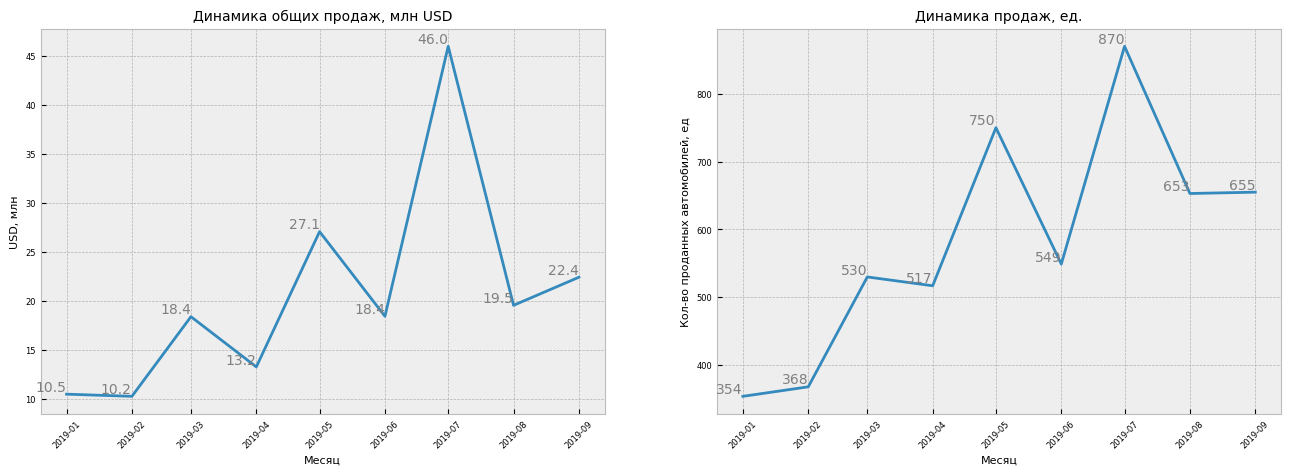

In [161]:
data_price = comm.groupby('year_month')['selling_price'].sum().reset_index()
data_price['selling_price'] = data_price['selling_price']
data_cnt = comm.groupby('year_month')['quant'].sum().reset_index()

plt.figure(figsize=(16,5))
ax1 = plt.subplot(1, 2, 1)
sns.lineplot(data_price, x='year_month', y='selling_price', markers=True)

for i, j in zip(data_price['year_month'], data_price['selling_price']):
    t = plt.text(i, j, round(j,1),
                 horizontalalignment='right',
                 rotation='horizontal',
                 verticalalignment='bottom',
                 fontdict={'color':'grey'})

plt.title('Динамика общих продаж, млн USD', fontsize=10)
plt.xlabel('Месяц', fontsize=8)
plt.ylabel('USD, млн', fontsize=8)
plt.xticks(rotation=45, fontsize=6)
plt.yticks(fontsize=6)

ax2 = plt.subplot(1, 2, 2)
sns.lineplot(data_cnt, x='year_month', y='quant', markers=True)

for i, j in zip(data_cnt['year_month'], data_cnt['quant']):
    t = plt.text(i, j, int(j),
                 horizontalalignment='right',
                 rotation='horizontal',
                 verticalalignment='bottom',
                 fontdict={'color':'grey'})

plt.title('Динамика продаж, ед.', fontsize=10)
plt.xlabel('Месяц', fontsize=8)
plt.ylabel('Кол-во проданных автомобилей, ед', fontsize=8)
plt.xticks(rotation=45, fontsize=6)
plt.yticks(fontsize=6)

plt.show()

Динамика продаж "пилообразная" с трендом к росту с пиком в июле 2019 года (месяц максимальных продаж в целом и комм. транспорта в частности). Наблюдается соответствие межу динамикой продаж в денежном и количественном выражении, что говорит о слабых изменениях в средних ценах коммерческих автомобилей в течении года.
Верятнее всего в марте, мае также наблюдаются локальные всплески продаж коммерческого транспорта у отдельных диллеров.

## 5.1 Вывод

coming soon

In [162]:
end_time = time.time()
print('Время выполнения {:.2f} c.'.format(end_time - start_time))

Время выполнения 73.58 c.


# 6 Кластеризация продаж (не оформлено и не доделано)

Можно кластеризировать продажи диллеров. Т.е. определить для каждой продажи какой-нибудь "сегмент" и рассмотреть какждого диллера с точки зрения характерных для него продаж

In [163]:
df_cl = df.copy(deep=True)

In [164]:
# только категориальные атрибуты
categorical_columns = ['brand', 'model', 'fuel', 'transmission', 'drive', 'region', 'segment_2013', 'class_2013',
                       'segment_eng', 'localisation', 'country_code', 'drive_volume_type']

# новый датафрейм с категориальными атрибутами
df_categorical = df_cl[categorical_columns]

In [165]:
# One-Hot Encoding
encoder = OneHotEncoder(sparse=False)
df_encoded = pd.DataFrame(encoder.fit_transform(df_categorical), columns=encoder.get_feature_names_out(df_categorical.columns))

In [166]:
# добавляем закодированные признаки к основному датафрейму
df_cl = pd.concat([df_cl, df_encoded], axis=1)

In [167]:
# Выбираем закодированные признаки
encoded_columns = df_encoded.columns

# Выбираем только колонки, относящиеся к кластеризации
clustering_data = df_cl[encoded_columns]

df_quant = df[['quant', 'selling_price', 'price']]

clustering_data = pd.concat([df_quant, clustering_data], axis=1)

clustering_data = clustering_data.fillna(0)

In [168]:
# расчет возможного числа кластеров

'''
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(clustering_data)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 10), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')
plt.show()
'''

"\ninertia = []\nfor k in range(1, 10):\n    kmeans = KMeans(n_clusters=k, random_state=1).fit(clustering_data)\n    inertia.append(np.sqrt(kmeans.inertia_))\n\nplt.plot(range(1, 10), inertia, marker='s');\nplt.xlabel('$k$')\nplt.ylabel('$J(C_k)$')\nplt.show()\n"

In [169]:
# обучаем KMeans
kmeans = KMeans(n_clusters=8, random_state=42)
df_cl['cluster'] = kmeans.fit_predict(clustering_data)


df_cl[['dealer', 'cluster']]

dealer  cluster
0      Mercur Auto        0
1      Mercur Auto        0
2      Mercur Auto        0
3      Mercur Auto        0
4      Mercur Auto        0
...            ...      ...
39962     ТК КАМАЗ        0
39963     ТК КАМАЗ        0
39964     ТК КАМАЗ        0
39965     ТК КАМАЗ        0
25728          NaN        4

[39966 rows x 2 columns]

In [170]:
print('Silhouette_score: {:.2f}'.format(silhouette_score(clustering_data, df_cl['cluster'])))

Silhouette_score: 0.54


Не супер, но и не плохо

Пример дальнейших действий. В таблице снизу для Allur Auto явно характерны продажи типа/класса "4", Астана Моторз - "4" и немного "0".

т.е. в целом из данной кластеризации можно выделить какие-то сегменты/ниши для каждого дилера, в которых он успешен и неуспешен

In [171]:
df_cl.pivot_table(index='dealer', columns='cluster', values='quant', aggfunc='sum')

cluster                            0      1       2     3       4       5  \
dealer                                                                      
Allur Auto                     43.00  70.00  338.00   NaN 2131.00   42.00   
Almaty Motors Premium          18.00    NaN   74.00   NaN     NaN    2.00   
Astana Motors                2614.00    NaN     NaN   NaN 7555.00     NaN   
Autokapital                    39.00  19.00   54.00   NaN     NaN   56.00   
Caspian Motors                  2.00    NaN     NaN   NaN    1.00     NaN   
Daewoo Bus Kazakhstan            NaN  26.00    3.00 80.00     NaN    5.00   
Eurasia Motor Premium          11.00    NaN   91.00   NaN     NaN     NaN   
Eurasia Motor Zhaik             6.00    NaN     NaN   NaN    9.00     NaN   
Hino Motors Kazakhstan         35.00    NaN    7.00   NaN     NaN    8.00   
Hyundai Com Trans Kazakhstan  109.00  19.00   12.00   NaN   29.00   49.00   
MAN Truck & Bus Kazakhstan       NaN    NaN    1.00   NaN     NaN   13.00   
MMC RUS                       397.00    NaN   18.00   NaN   24.00     NaN   
Mercur Auto                   102.00    NaN   97.00   NaN  444.00     NaN   
Nissan Manufacturing RUS      868.00    NaN   86.00   NaN  553.00   33.00   
Ravon Motors Kazakstan           NaN    NaN     NaN   NaN 1507.00     NaN   
Renault Россия                  9.00    NaN     NaN   NaN 1787.00     NaN   
Scandinavian Motors            11.00    NaN   30.00   NaN     NaN    4.00   
Scania Central Asia              NaN    NaN    8.00   NaN     NaN   13.00   
Subaru Kazakhstan             503.00    NaN     NaN   NaN     NaN     NaN   
TERRA MOTORS                   19.00    NaN   58.00   NaN     NaN     NaN   
Toyota Motor Kazakhstan      9469.00    NaN 1597.00   NaN  885.00     NaN   
Volkswagen Group Rus           54.00 203.00   28.00   NaN    7.00  146.00   
Автодом Motors KST             12.00    NaN    1.00   NaN   40.00     NaN   
Автомир ГК                    110.00    NaN   12.00   NaN   17.00    9.00   
Автомир-Центр                   6.00    NaN     NaN   NaN   28.00     NaN   
Автоцентр-Бавария              92.00  94.00   92.00   NaN    2.00   95.00   
БИПЭК АВТО                   3851.00 465.00   71.00   NaN 3202.00 1757.00   
Вираж                          17.00    NaN     NaN   NaN 2892.00     NaN   
Лифан Моторс Рус                 NaN    NaN     NaN   NaN  233.00     NaN   
СВС-ТРАНС                     198.00    NaN     NaN   NaN     NaN    8.00   
СемАЗ                          54.00 230.00   25.00   NaN   16.00   26.00   
ТК КАМАЗ                      720.00    NaN  173.00   NaN     NaN     NaN   
УзАвто-Казахстан                 NaN    NaN     NaN   NaN  152.00     NaN   

cluster                            6      7  
dealer                                       
Allur Auto                     12.00    NaN  
Almaty Motors Premium           5.00    NaN  
Astana Motors                    NaN    NaN  
Autokapital                    28.00    NaN  
Caspian Motors                   NaN    NaN  
Daewoo Bus Kazakhstan           2.00  30.00  
Eurasia Motor Premium            NaN    NaN  
Eurasia Motor Zhaik              NaN    NaN  
Hino Motors Kazakhstan          8.00    NaN  
Hyundai Com Trans Kazakhstan   18.00    NaN  
MAN Truck & Bus Kazakhstan       NaN  10.00  
MMC RUS                         8.00    NaN  
Mercur Auto                     7.00    NaN  
Nissan Manufacturing RUS      220.00    NaN  
Ravon Motors Kazakstan           NaN    NaN  
Renault Россия                   NaN    NaN  
Scandinavian Motors              NaN    NaN  
Scania Central Asia             2.00    NaN  
Subaru Kazakhstan                NaN    NaN  
TERRA MOTORS                     NaN    NaN  
Toyota Motor Kazakhstan          NaN    NaN  
Volkswagen Group Rus          226.00    NaN  
Автодом Motors KST               NaN    NaN  
Автомир ГК                    131.00    NaN  
Автомир-Центр                    NaN    NaN  
Автоцентр-Бавария              79.00    NaN  
БИПЭК АВТО      

# Общий вывод

coming soon